In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

    # Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/songs-spotify/dataset.csv


# Чтение df, проверка типов данных

In [7]:
data = pd.read_csv('/kaggle/input/songs-spotify/dataset.csv')

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  int64  
 1   artists           113999 non-null  int64  
 2   album_name        113999 non-null  int64  
 3   track_name        113999 non-null  int64  
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [8]:
data = data.drop(columns='Unnamed: 0')

Убрали сразу лишнюю колонку unnamed

# Описание колонок
1. track_id - id трека
1. artists - автор(ы) песни. если их несколько - разделитель ;
1. album_name - название альбома
1. track_name - название трека
1. popularity - популярность трека от 0 до 100
1. duration_ms - продолжительность в мс
1. explicit - наличие мата, жестокости и всего такого в песне
1. danceability - коэффициент танцевальности - от 0 до 1
1. energy - коэффициент энергичности - от 0 до 1
1. key - тональность. число от 0 до 11, обозначающий тональность песни. от до(0) до си (11)
1. loudness - средняя громкость в децибелах. где 0 - абсолютный максимум громкости в треке без искажений в записи. значения меньше нуля означают уменьшение громкости относительно максимума
1. mode - наклонение, мажорное или минорное. где 1 - мажор, 0 - минор
1. speechiness - насколько явно проговариваются слова, наличие речи в треке. например в рэпе будет явно этот параметр больше
1. acousticness - насколько трек является акустичным, чем больше значение, тем больше акустических инструментов и меньше электронных
1. instrumentalness - инструментальность трека, наличие или отсутствие вокала в нем. 1 = полностью инструментальный
1. liveness - был трек записан на живом выступлении или на студии. по сути наличие звуков от аудитории в треке
1. valence - валентность или эмоциональная окраска. треки ближе к 0 - грустные, ближе к 1 - веселые
1. tempo - темп трека в bpm
1. time_signature - музыкальный размер, в котором трек написан. в датасете используется только количество ударов в такт(верхнее число в музыкальном размере). значения: 0, 1, 3, 4, 5. Наверное 0 - нетипичные треки, там есть ambient, звуки шума, пылесоса, ну и треки, где сложно сказать размер, благо таких мало. 1 - простой ритм без четкой структуры, такое редко встретишь и в датасете таких тоже мало. 4 - самый распространенный, 3 и 5 тоже есть, это уже более адекватные значения
1. track_genre - жанр трека

## Пытался понять, за что отвечает каждая из колонок

In [5]:
data['time_signature'].value_counts()

time_signature
4    101843
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

In [5]:
data[data['time_signature'] == 0]

track_id  \
2926    0jdfbvSdaWvxfAlD20TtNc   
4131    59gg6zQhSKGVnkT3hWAY3l   
4379    4acmzQsAeMJa5sGFSog7fu   
4664    1Kb2DqjHRvOcT5xeWtz3t5   
26910   7HSc2wpHlXKIl8SCZK7zsP   
...                        ...   
101993  6H0kAiSAFB84jX7dgEDWd6   
112172  0jdfbvSdaWvxfAlD20TtNc   
113428  5EYzrykQ95uOmepteDi9KT   
113688  2EnZf7wbFv7ST4CJ3EvNzT   
113856  6XsYJ0dwT2hRzp0Qles78F   

                                                  artists  \
2926                                           Yaşlı Amca   
4131                                Max Richter;Lang Lang   
4379     Dario Marianelli;Jack Liebeck;Benjamin Wallfisch   
4664                                     Sylvain Chauveau   
26910                                        Benny Martin   
...                                                   ...   
101993                                        Rain Sounds   
112172                                         Yaşlı Amca   
113428  El Ruido Blanco;Soñoliento Juan;Mantra para Do...   
113688                                    El Ruido Blanco   
113856                                  Колыбельная-земля   

                                               album_name  \
2926                                            Akşamüstü   
4131                      Voyager - Essential Max Richter   
4379       Jane Eyre - Original Motion Picture Soundtrack   
4664                              Des Plumes Dans La Tête   
26910             Here Comes the Sun (Piano Instrumental)   
...                                                   ...   
101993                                               Rain   
112172                                          Akşamüstü   
113428                 Aire Acondicionado de Ruido Blanco   
113688  Ruido Blanco para el bebé: sonidos relajantes ...   
113856  Расслабляющие звуки - белый шум для вашего реб...   

                                       track_name  popularity  duration_ms  \
2926                              Sanki Yapamadım          44       213198   
4131                                The Departure          64       151506   
4379    The End of Childhood (feat. Jack Liebeck)          55        73266   
4664                               Ferme Les Yeux          53        68493   
26910     Here Comes the Sun (Piano Instrumental)          18       203705   
...                                           ...         ...          ...   
101993                    Rain: Natural Recording          32        84219   
112172                            Sanki Yapamadım          44       213198   
113428                             Aire de verano          27       128000   
113688         Ruido Rosa Puro - Una Hora Versión          24      3601693   
113856                        Пылесос (Белый шум)          22       302185   

        explicit  danceability   energy  key  loudness  mode  speechiness  \
2926       False         0.442  0.56700    8    -6.346     0       0.0516   
4131       False         0.000  0.03620    0   -22.519     0       0.0000   
4379       False         0.000  0.04450    0   -26.440     0       0.0000   
4664       False         0.000  0.03230    2   -23.636     0       0.0000   
26910      False         0.329  0.06070    9   -28.310     1       0.0507   
...          ...           ...      ...  ...       ...   ...          ...   
101993     False         0.000  0.02540    8   -19.925     1       0.0000   
112172     False         0.442  0.56700    8    -6.346     0       0.0516   
113428     False         0.000  0.18800    8   -25.837     0       0.0000   
113688     False         0.000  0.00002    1   -11.165     1       0.0000   
113856     False         0.000  0.22400    8   -10.224     1       0.0000   

        acousticness  instrumentalness  liveness  valence    tempo  \
2926        0.238000          0.000325    0.0852    0.639  138.616   
4131        0.994000          0.940000    0.0958    0.000    0.000   
4379        0.972000          0.972000    0.0873    0.000    0.000   
4664 

In [6]:
data['key'].value_counts()

key
7     13245
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64

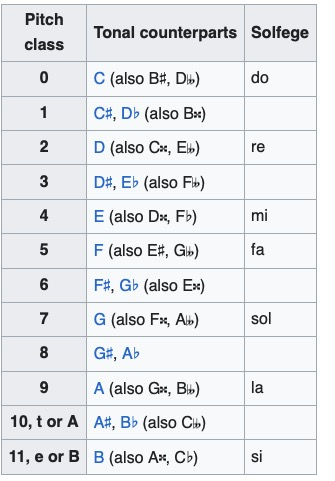

In [7]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

In [8]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

In [9]:
data[data['popularity'] > 97]

track_id                  artists  \
20001  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
20008  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
30003  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
51664  2tTmW7RDtMQtBk7m2rYeSw         Bizarrap;Quevedo   
67356  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
68303  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
81051  3nqQXoyQOWXiESFLlDF1hG     Sam Smith;Kim Petras   
81210  4uUG5RXrOk84mYEfFvj3cK  David Guetta;Bebe Rexha   
88410  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   
89411  5ww2BF9slyYgNOk37BlC4u            Manuel Turizo   

                                  album_name  \
20001              Unholy (feat. Kim Petras)   
20008                        I'm Good (Blue)   
30003                        I'm Good (Blue)   
51664  Quevedo: Bzrp Music Sessions, Vol. 52   
67356                             La Bachata   
68303                             La Bachata   
81051              Unholy (feat. Kim Petras)   
81210                        I'm Good (Blue)   
88410                             La Bachata   
89411                             La Bachata   

                                  track_name  popularity  duration_ms  \
20001              Unholy (feat. Kim Petras)         100       156943   
20008                        I'm Good (Blue)          98       175238   
30003                        I'm Good (Blue)          98       175238   
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99       198937   
67356                             La Bachata          98       162637   
68303                             La Bachata          98       162637   
81051              Unholy (feat. Kim Petras)         100       156943   
81210                        I'm Good (Blue)          98       175238   
88410                             La Bachata          98       162637   
89411                             La Bachata          98       162637   

       explicit  danceability  energy  key  loudness  mode  speechiness  \
20001     False         0.714   0.472    2    -7.375     1       0.0864   
20008      True         0.561   0.965    7    -3.673     0       0.0343   
30003      True         0.561   0.965    7    -3.673     0       0.0343   
51664     False         0.621   0.782    2    -5.548     1       0.0440   
67356     False         0.835   0.679    7    -5.329     0       0.0364   
68303     False         0.835   0.679    7    -5.329     0       0.0364   
81051     False         0.714   0.472    2    -7.375     1       0.0864   
81210      True         0.561   0.965    7    -3.673     0       0.0343   
88410     False         0.835   0.679    7    -5.329     0       0.0364   
89411     False         0.835   0.679    7    -5.329     0       0.0364   

       acousticness  instrumentalness  liveness  valence    tempo  \
20001       0.01300          0.000005     0.266    0.238  131.121   
20008       0.00383          0.000007     0.371    0.304  128.040   
30003       0.00383          0.000007     0.371    0.304  128.040   
51664       0.01250          0.033000     0.230    0.550  128.033   
67356       0.58300          0.000002     0.218    0.850  124.980   
68303       0.58300          0.000002     0.218    0.850  124.980   
81051       0.01300          0.000005     0.266    0.238  131.121   
81210       0.00383          0.000007     0.371    0.304  128.040   
88410       0.58300          0.000002     0.218    0.850  124.980   
89411       0.58300          0.000002     0.218    0.850  124.980   

       time_signature track_genre  
20001               4       dance  
20008               4       dance  
30003               4         edm  
51664               4     hip-hop  
67356               4       latin  
68303               4      latino  
81051               4         pop  
81210               4         pop  
88410               4      reggae  
89411               4   reggaeton

Смотрел на сильно популярные треки

# Убираем пропуски в данных, если они есть

In [10]:
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [11]:
data[data['track_name'].isna()]

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

Пропусков крайне мало, поэтому можно опустить 3 пропуска, это не повлияет на датасет. Тем более все пропуски это один и тот же довольно странный трек без исполнителей, альбома, названия, с продолжительностью 0 ms

In [9]:
data = data.dropna()

# Label Encoding

Разбили колонки на численные и категориальные

In [10]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [14]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [11]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [16]:
categorical_cols

Index(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [18]:
label_encoders

{'track_id': LabelEncoder(),
 'artists': LabelEncoder(),
 'album_name': LabelEncoder(),
 'track_name': LabelEncoder(),
 'track_genre': LabelEncoder()}

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  int64  
 1   artists           113999 non-null  int64  
 2   album_name        113999 non-null  int64  
 3   track_name        113999 non-null  int64  
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [12]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Все данные закодировали, пропусков нет

# Аналитика

In [12]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_palette("pastel")

**Гипотезы**

* Вероятно такие характеристики трека как:
    * тональность
    * музыкальный размер

не должны влиять на популярность определенной песни, это те характеристики, на которые обычный слушатель никогда не будет обращать внимания

## Тональности

<Axes: xlabel='key', ylabel='popularity'>

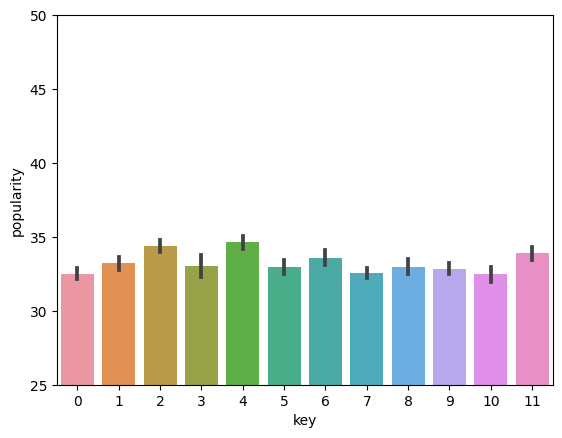

In [13]:
plt.ylim(25, 50)
sns.barplot(data, x='key', y='popularity')

Зависимость не заметна

Сопоставим цифры тональностям, сделал для себя и интереса

In [23]:
keys = data.groupby('key', as_index=False).agg({'popularity': 'mean'}).sort_values('popularity', ascending=False)

In [24]:
keys_dict = {
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
}
keys_df = pd.DataFrame(list(keys_dict.items()), columns=['key', 'key_letter'])
keys = keys.merge(keys_df, on='key', how='inner')

In [25]:
keys

key  popularity key_letter
0     4   34.643650          E
1     2   34.377619          D
2    11   33.887632          B
3     6   33.585532         F#
4     1   33.200241         C#
5     3   33.031653         D#
6     8   32.958696         G#
7     5   32.930935          F
8     9   32.823566          A
9     7   32.582075          G
10    0   32.519945          C
11   10   32.461373         A#

Действительно, было логично, что до тональности в песне всем дела нет, отличия совершенно незначительны между разными тональностями в песне

In [26]:
data[['popularity', 'key']].corr()

popularity       key
popularity    1.000000 -0.003847
key          -0.003847  1.000000

Можно будет опускать этот параметр при обучении модели, особого смысла он не имеет

## Музыкальный размер

В целом я думаю, что 4 будет более популярный, потому что в нем написано большинство песен

<Axes: xlabel='time_signature', ylabel='popularity'>

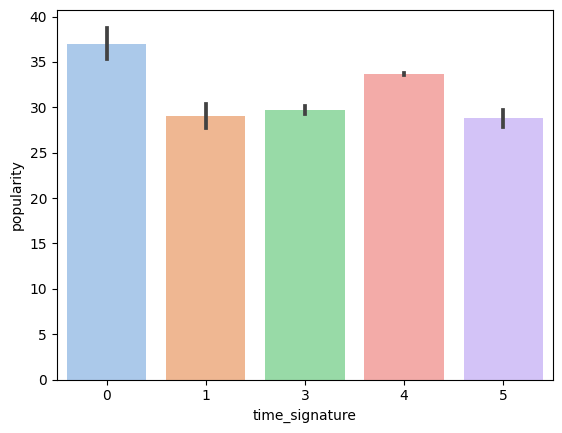

In [425]:
sns.barplot(data, x='time_signature', y='popularity')

In [28]:
data.groupby('time_signature', as_index=False).agg({'popularity': 'mean'}).sort_values('popularity', ascending=False)

time_signature  popularity
0               0   36.975460
3               4   33.672807
2               3   29.692442
1               1   29.073998
4               5   28.778204

Как уже помечалось выше довольно странный размер = 0. Но при этом, в среднем, такие треки выше по популярности, чем остальные. Может быть на это влияет малое количество таких треков? Проверим

In [29]:
data.time_signature.value_counts()

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

Действительно. Их крайне-крайне мало. 163 всего, поэтому график barplot может показывать себя не с лучшей стороны

<Axes: xlabel='time_signature', ylabel='popularity'>

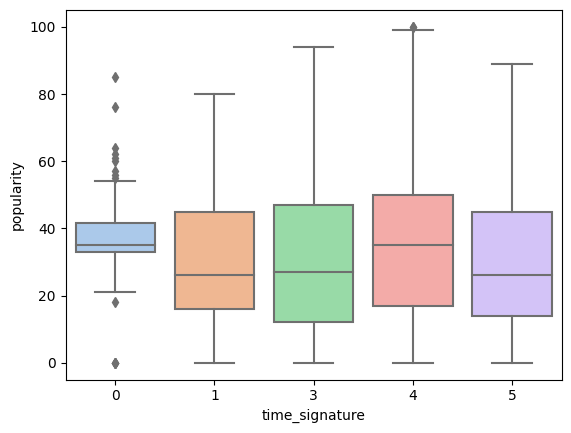

In [426]:
sns.boxplot(data, x='time_signature', y='popularity')

In [31]:
data[['time_signature', 'key', 'popularity']].corr()

time_signature       key  popularity
time_signature        1.000000  0.015064    0.031076
key                   0.015064  1.000000   -0.003847
popularity            0.031076 -0.003847    1.000000

В итоге небольшое преимущество у тактового размера 4, ведь в нем написано большинство известных песен. Возможно некоторые треки, написанные в 3 или 5 оказываются немного менее популярны из-за нетипичности тактового размера, однако влияние этого все равно совсем небольшое, можно будет от этой фичи отказаться

## Duration

Нужно посмотреть на длительность песен и выделить те, когда треки становятся более популярными. Вероятно очень длинные треки будут менее популярные, так же, как и слишком короткие записи

In [32]:
np.var(data['duration_ms'])

11512343014.208265

<Axes: xlabel='duration_ms', ylabel='popularity'>

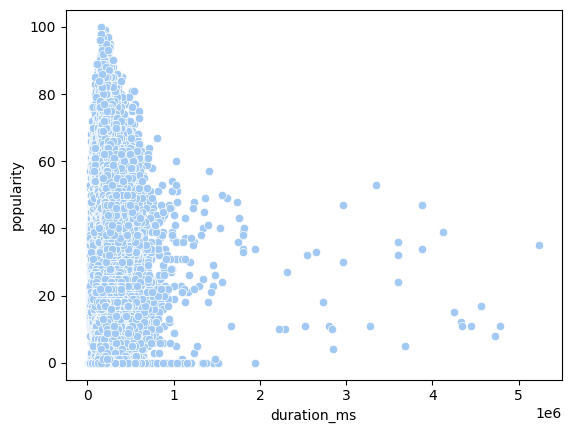

In [427]:
sns.scatterplot(data, x='duration_ms', y='popularity')

Так как данные представлены в мс, то для удобства анализа и восприятия переведем данные в минуты, используя новый df

In [14]:
duration_popularity = data[['duration_ms', 'popularity']].copy()

In [15]:
duration_popularity['duration_min'] = duration_popularity['duration_ms'] / 60000

In [36]:
duration_popularity['duration_min'].min()

0.1431

In [37]:
duration_popularity['duration_min'].max()

87.28825

87 минут трек..

<Axes: xlabel='duration_min', ylabel='popularity'>

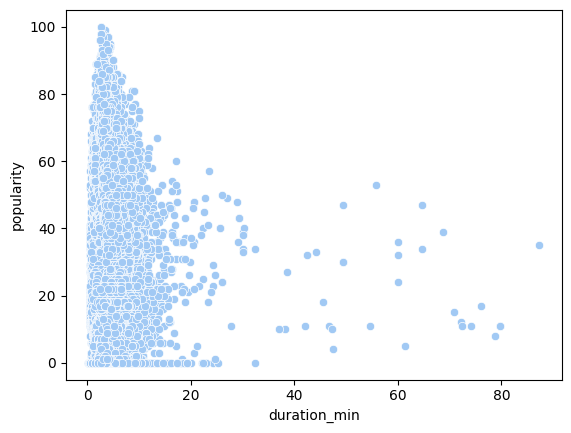

In [428]:
sns.scatterplot(duration_popularity, x='duration_min', y='popularity')

Конечно ясно, что большинство песен будут нормальной, привычной продолжительности, и данных там очень-очень много, точки плотно лежат друг на друге. Но вот выходя за рамки 20 минут наблюдения единичные только, и будут нас скорее путать, чем помогать делать выводы

/tmp/ipykernel_30/3234409849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_duration_min = duration_popularity.groupby(pd.cut(duration_popularity['duration_min'], bins=5))['popularity'].mean()


<Axes: xlabel='duration_min'>

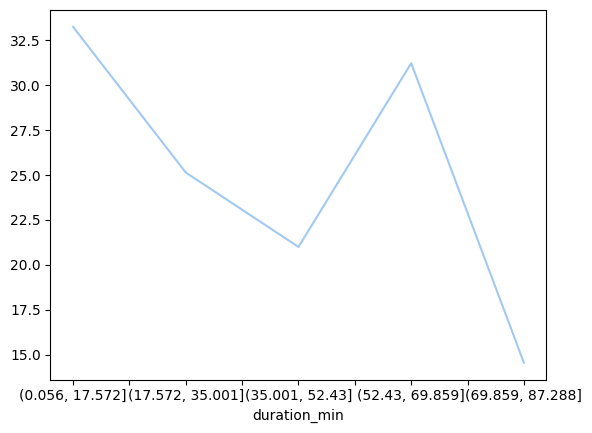

In [16]:
avg_popularity_by_duration_min = duration_popularity.groupby(pd.cut(duration_popularity['duration_min'], bins=5))['popularity'].mean()
avg_popularity_by_duration_min.plot()

Также построил график с разбивкой данных на группы, где берем среднюю популярность. Значения теперь, которые больше 35 минут ведут себя довольно странно. Популярность таких треков до значения 69 стремительно начинает расти, но это связано с небольшим числом данных тут, поэтому такой график супер много полезного в себе не несет

In [17]:
avg_popularity_by_duration_min

duration_min
(0.056, 17.572]     33.246907
(17.572, 35.001]    25.140845
(35.001, 52.43]     21.000000
(52.43, 69.859]     31.222222
(69.859, 87.288]    14.555556
Name: popularity, dtype: float64

Видно что средняя популярность по таким группам примерно похожая, с просадкой от 35 до 52. И песни, продолжительностью более 69 минут уже имеют очень низкую популярность

In [17]:
duration_popularity[(duration_popularity['duration_min'] > 69) & (duration_popularity['duration_min'] < 87)].shape

(8, 3)

Но этих данных очень мало

In [19]:
duration_popularity[(duration_popularity['duration_min'] > 52) & (duration_popularity['duration_min'] < 69)].shape

(9, 3)

Всего 9 значений из всех находятся в этом промежутке, что и дает сильные выбросы

Но давайте для приличия и более четкого анализа воспользуемся не обрезкой и подсчетом треков, продолжительность которых в минутах больше 20, а вычислим перцентили

In [18]:
percentile_95 = duration_popularity['duration_min'].quantile(0.95)

In [21]:
percentile_95 

6.4527866666666664

In [19]:
percentile_99 = duration_popularity['duration_min'].quantile(0.99)

In [23]:
percentile_99

8.848488666666677

Посмотрим на число треков, продолжительность которых превышает 95 и 99 перцентили, чтобы решить, какой порог все же использовать в дальнейшем для анализа

In [20]:
duration_popularity['is_over_threshold'] = duration_popularity['duration_min'] > percentile_95
duration_popularity['is_over_threshold'].value_counts()

is_over_threshold
False    108299
True       5700
Name: count, dtype: int64

In [21]:
(5700 / duration_popularity.shape[0]) * 100

5.00004386003386

перцентиль 95 обрезает 5% всех данных, которые больше него

In [23]:
duration_popularity['is_over_threshold'] = duration_popularity['duration_min'] > percentile_99
duration_popularity['is_over_threshold'].value_counts()

is_over_threshold
False    112859
True       1140
Name: count, dtype: int64

In [24]:
(1140 / duration_popularity.shape[0]) * 100

1.000008772006772

99 же обрезает только 1 процент данных

In [25]:
duration_popularity_filtered = duration_popularity[duration_popularity['is_over_threshold'] == False]

In [26]:
duration_popularity_filtered.shape

(112859, 4)

На основе полученных данных вновь сделаем графики

<Axes: xlabel='duration_min', ylabel='popularity'>

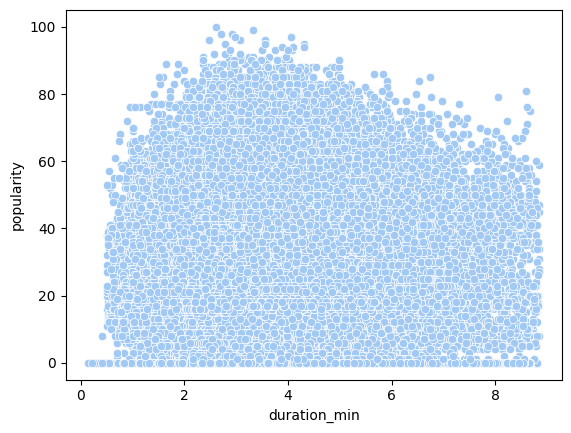

In [27]:
sns.scatterplot(duration_popularity_filtered, x='duration_min', y='popularity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


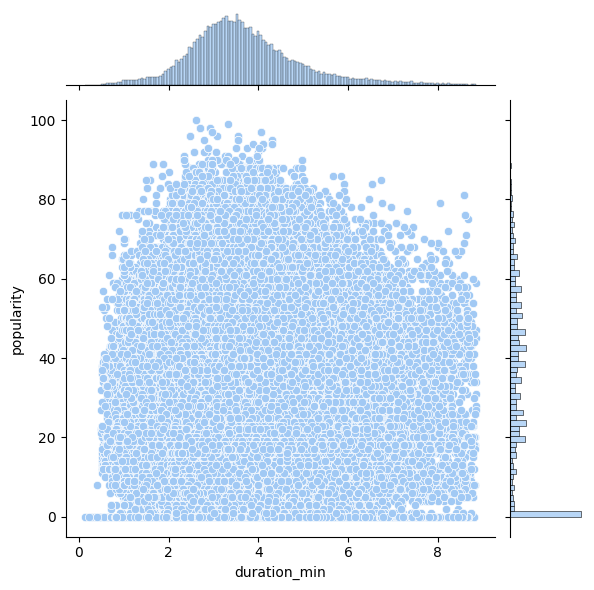

In [28]:
sns.jointplot(duration_popularity_filtered, x='duration_min', y='popularity')

На данном графике уже четче видно распределение продолжительности трека, количества песен в этой продолжительности и их популярности. Большинство песен находятся в рамках 2-4 минут, очевидно. А остальные значения распределены в принципе равномерно, четкой зависимости между продолжительностью нет

In [29]:
duration_popularity[['duration_min', 'popularity']].corr()

duration_min  popularity
duration_min      1.000000   -0.007129
popularity       -0.007129    1.000000

In [57]:
duration_popularity_filtered[['duration_min', 'popularity']].corr()

duration_min  popularity
duration_min      1.000000    0.013074
popularity        0.013074    1.000000

В начальных данных корреляция практически незаметна. Отфильтровав данные, которые больше 99 перцентиля, можно увидеть, что корреляция немного возрасла, теперь duration_min несет уже немного больше информации, но это все так же мало влияет на таргет

Последний штрих в продолжительностями(интересно поработать с ними) и уйдем дальше. Попробуем разбить еще данные на промежутки по 30 секунд и выявить зависимость уже так

Разбиение на промежутки по 30 секунд

In [30]:
duration_bins = np.arange(0, 8.5, 0.5).tolist()
duration_labels = [f"{round(duration, 1)}-{round(duration + 0.5, 1)}" for duration in duration_bins[:-1]]
duration_popularity_filtered['duration_category'] = pd.cut(duration_popularity_filtered['duration_min'], bins=duration_bins, labels=duration_labels)

/tmp/ipykernel_30/1095487895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_popularity_filtered['duration_category'] = pd.cut(duration_popularity_filtered['duration_min'], bins=duration_bins, labels=duration_labels)


Строим график с подписями по числу песен в данном промежутке продолжительности

/tmp/ipykernel_30/4023541334.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_popularity = duration_popularity_filtered.groupby('duration_category').agg(
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


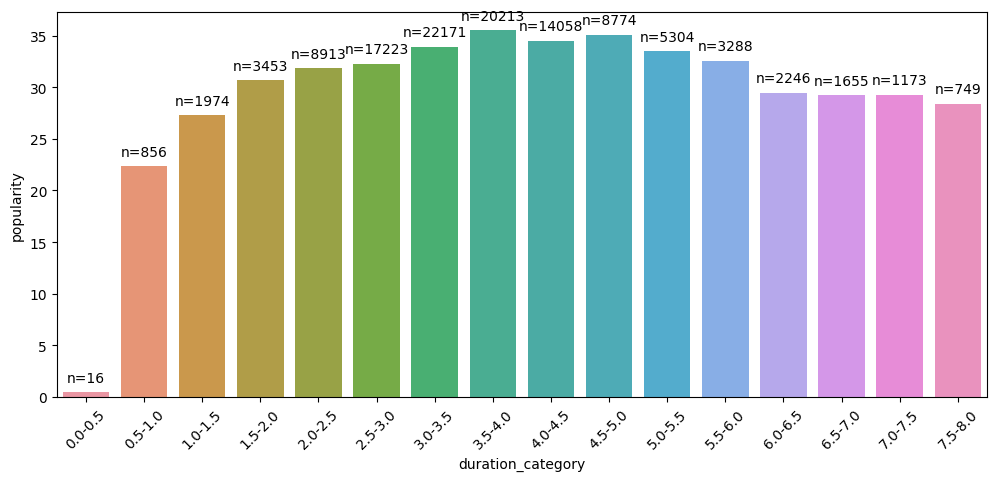

In [31]:
average_popularity = duration_popularity_filtered.groupby('duration_category').agg(
    popularity=('popularity', 'mean'),
    count=('popularity', 'size')
).reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=average_popularity, x='duration_category', y='popularity')

for i, row in average_popularity.iterrows():
    plt.text(i, row['popularity'] + 1, f'n={row["count"]}', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()

In [32]:
average_popularity.sort_values('count', ascending=False).head()

duration_category  popularity  count
6           3.0-3.5   33.934915  22171
7           3.5-4.0   35.490971  20213
5           2.5-3.0   32.259130  17223
8           4.0-4.5   34.511524  14058
4           2.0-2.5   31.833277   8913

In [38]:
average_popularity.sort_values('popularity', ascending=False)

duration_category  popularity  count
7            3.5-4.0   35.490971  20213
9            4.5-5.0   35.064737   8774
8            4.0-4.5   34.511524  14058
6            3.0-3.5   33.934915  22171
10           5.0-5.5   33.487557   5304
11           5.5-6.0   32.566606   3288
5            2.5-3.0   32.259130  17223
4            2.0-2.5   31.833277   8913
3            1.5-2.0   30.648711   3453
12           6.0-6.5   29.441674   2246
14           7.0-7.5   29.253197   1173
13           6.5-7.0   29.207251   1655
15           7.5-8.0   28.393858    749
2            1.0-1.5   27.290274   1974
1            0.5-1.0   22.369159    856
0            0.0-0.5    0.500000     16

Отсюда уже выводы:
1. Наивысшая популярность у песен длительностью 3.5 - 4 минуты, также в диапазоне 3 - 4 минуты находятся большинство песен
2. Короткие треки, меньше минуты, не пользуются большой популярностью
3. Постепенно популярность, начиная с 5.5 минут будет только снижаться

In [33]:
le = LabelEncoder()
duration_popularity_filtered['duration_category_encoded'] = le.fit_transform(duration_popularity_filtered['duration_category'])

/tmp/ipykernel_30/1896940003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_popularity_filtered['duration_category_encoded'] = le.fit_transform(duration_popularity_filtered['duration_category'])


In [34]:
duration_popularity_filtered[['duration_category_encoded', 'popularity']].corr()

duration_category_encoded  popularity
duration_category_encoded                    1.00000     0.01253
popularity                                   0.01253     1.00000

Надежд на рост значимости и так было мало, так и еще корреляция после разбиения на категории уменьшилась, а жаль

Ради интереса тут еще пробовал разные разбиения по времени, но безуспешно, корреляция еще ниже

In [35]:
duration_bins = np.arange(0, 8.5, 4).tolist()
duration_labels = [f"{round(duration, 1)}-{round(duration + 4, 1)}" for duration in duration_bins[:-1]]
duration_popularity_filtered['duration_category'] = pd.cut(duration_popularity_filtered['duration_min'], bins=duration_bins, labels=duration_labels)

/tmp/ipykernel_30/2292561509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_popularity_filtered['duration_category'] = pd.cut(duration_popularity_filtered['duration_min'], bins=duration_bins, labels=duration_labels)


In [36]:
le = LabelEncoder()
duration_popularity_filtered['duration_category_encoded'] = le.fit_transform(duration_popularity_filtered['duration_category'])

/tmp/ipykernel_30/1896940003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_popularity_filtered['duration_category_encoded'] = le.fit_transform(duration_popularity_filtered['duration_category'])


In [43]:
duration_popularity_filtered[['duration_category_encoded', 'popularity']].corr()

duration_category_encoded  popularity
duration_category_encoded                   1.000000    0.000276
popularity                                  0.000276    1.000000

Было интересно поработать с продолжительностью трека, много всего можно узнать, построить, но как результат - продолжительность не влияет на популярность песни.

В целом гипотеза о том, что короткие и очень длинные треки имеют популярность ниже, подтвердилась. Но такие результаты незначительны

Но в общем корреляция благодаря новой фиче отфильтрованных duration или разбиения duration по категориям стала выше.
Возможно при обучении модели записи с очень высокой продолжительностью трека будут удалены, если это поможет обучению модели. Либо также оставим просто разделение по категориям продолжительности(30 секунд), а очень большие данные(8 минут+) преобразуем в отдельное значение

In [37]:
duration_popularity_filtered

duration_ms  popularity  duration_min  is_over_threshold  \
0            230666          73      3.844433              False   
1            149610          55      2.493500              False   
2            210826          57      3.513767              False   
3            201933          71      3.365550              False   
4            198853          82      3.314217              False   
...             ...         ...           ...                ...   
113995       384999          21      6.416650              False   
113996       385000          22      6.416667              False   
113997       271466          22      4.524433              False   
113998       283893          41      4.731550              False   
113999       241826          22      4.030433              False   

       duration_category  duration_category_encoded  
0                0.0-4.0                          0  
1                0.0-4.0                          0  
2                0.0-4.0                          0  
3                0.0-4.0                          0  
4                0.0-4.0                          0  
...                  ...                        ...  
113995           4.0-8.0                          1  
113996           4.0-8.0                          1  
113997           4.0-8.0                          1  
113998           4.0-8.0                          1  
113999           4.0-8.0                          1  

[112859 rows x 6 columns]

После рассмотрения других фич, решил оставить все же даже выбросы по продолжительности трека, просто закодируем их отдельным значением. 8+ минут будем считать как одно значение

In [45]:
duration_popularity

duration_ms  popularity  duration_min  is_over_threshold
0            230666          73      3.844433              False
1            149610          55      2.493500              False
2            210826          57      3.513767              False
3            201933          71      3.365550              False
4            198853          82      3.314217              False
...             ...         ...           ...                ...
113995       384999          21      6.416650              False
113996       385000          22      6.416667              False
113997       271466          22      4.524433              False
113998       283893          41      4.731550              False
113999       241826          22      4.030433              False

[113999 rows x 4 columns]

In [38]:
duration_bins = np.arange(0, 8.5, 0.5).tolist() + [float('inf')]
duration_popularity['duration_category'] = pd.cut(duration_popularity['duration_min'], bins=duration_bins, labels=False)

In [39]:
duration_popularity.duration_category.value_counts()

duration_category
6     22171
7     20213
5     17223
8     14058
4      8913
9      8774
10     5304
3      3453
11     3288
12     2246
2      1974
16     1933
13     1655
14     1173
1       856
15      749
0        16
Name: count, dtype: int64

In [48]:
duration_popularity.corr()

duration_ms  popularity  duration_min  is_over_threshold  \
duration_ms           1.000000   -0.007129      1.000000           0.502055   
popularity           -0.007129    1.000000     -0.007129          -0.028495   
duration_min          1.000000   -0.007129      1.000000           0.502055   
is_over_threshold     0.502055   -0.028495      0.502055           1.000000   
duration_category     0.833960    0.002250      0.833960           0.333913   

                   duration_category  
duration_ms                 0.833960  
popularity                  0.002250  
duration_min                0.833960  
is_over_threshold           0.333913  
duration_category           1.000000

In [40]:
duration_bins = np.arange(0, 8, 1).tolist() + [float('inf')]
duration_popularity['duration_category'] = pd.cut(duration_popularity['duration_min'], bins=duration_bins, labels=False)

In [41]:
duration_popularity.corr()

duration_ms  popularity  duration_min  is_over_threshold  \
duration_ms           1.000000   -0.007129      1.000000           0.502055   
popularity           -0.007129    1.000000     -0.007129          -0.028495   
duration_min          1.000000   -0.007129      1.000000           0.502055   
is_over_threshold     0.502055   -0.028495      0.502055           1.000000   
duration_category     0.806133    0.003343      0.806133           0.283052   

                   duration_category  
duration_ms                 0.806133  
popularity                  0.003343  
duration_min                0.806133  
is_over_threshold           0.283052  
duration_category           1.000000

In [51]:
duration_popularity.duration_category.value_counts()

duration_category
3    42384
2    26136
4    22832
5     8592
1     5427
6     3901
7     3855
0      872
Name: count, dtype: int64

Все-таки в случае с разбиением на 30 секунд получается много категорий. Решил разделять все же по 1 минуте

Проверил, что очень длинные треки правда выделились в отдельную категорию

In [42]:
duration_popularity.query('duration_category == 7')

duration_ms  popularity  duration_min  is_over_threshold  \
253          447306          44      7.455100              False   
752          445533          52      7.425550              False   
851          578064          33      9.634400               True   
1071         426306          36      7.105100              False   
1092         527506           0      8.791767              False   
...             ...         ...           ...                ...   
113914       420386          46      7.006433              False   
113932       464398          47      7.739967              False   
113959       456981          50      7.616350              False   
113969       493293          47      8.221550              False   
113988       462397          38      7.706617              False   

        duration_category  
253                     7  
752                     7  
851                     7  
1071                    7  
1092                    7  
...                   ...  
113914                  7  
113932                  7  
113959                  7  
113969                  7  
113988                  7  

[3855 rows x 5 columns]

In [43]:
duration_popularity.shape

(113999, 5)

## Explicit

Гипотеза: треки explicit могут быть популярнее. Ведь во многих популярных жанрах присутствует данный элемент, что может повышать популярность трека

In [54]:
data.explicit.value_counts()

explicit
False    104252
True       9747
Name: count, dtype: int64

<Axes: xlabel='explicit', ylabel='popularity'>

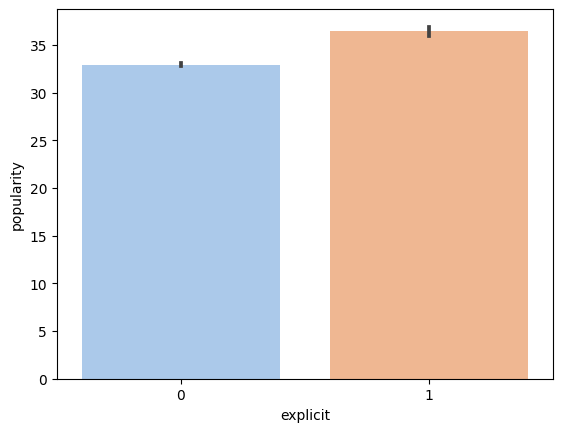

In [437]:
sns.barplot(data, x='explicit', y='popularity')

<Axes: xlabel='explicit', ylabel='popularity'>

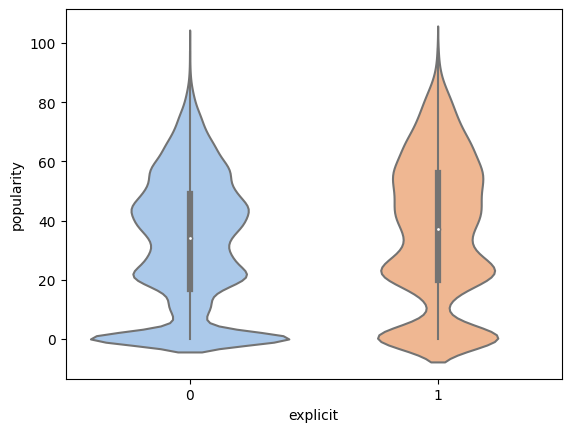

In [438]:
sns.violinplot(data, x='explicit', y='popularity')

Таким образом распределение довольно похожее, но треки explicit имеют незначительно, но более высокую популярность в среднем. Хотя важно учитывать, что среди общей массы таких треков мало(8%)

In [80]:
data[['popularity', 'explicit']].corr()

popularity  explicit
popularity    1.000000  0.044078
explicit      0.044078  1.000000

## Распределение треков по категориям оценки популярности

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='popularity_category', ylabel='count'>

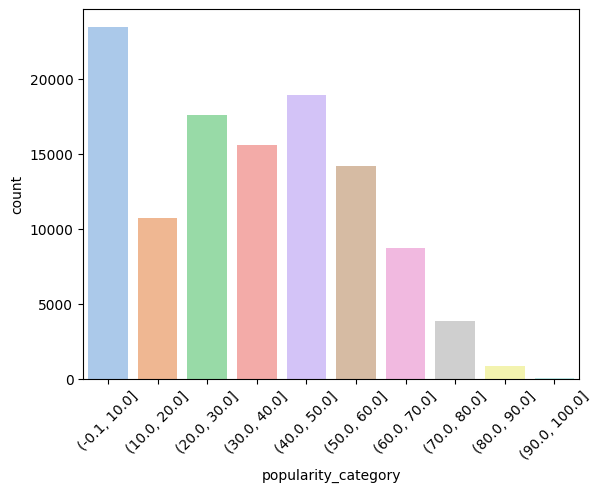

In [44]:
data['popularity_category'] = pd.cut(data['popularity'], bins=10)
category_counts = data['popularity_category'].value_counts().reset_index()
category_counts.columns = ['popularity_category', 'count']
plt.xticks(rotation=45)

sns.barplot(category_counts, x='popularity_category', y='count')

В среднем треки либо очень непопулярны(менее 10), либо находятся в пределах от 20 до 60. Что предсказуемо. И само распределение похоже на нормальное, кроме большого числа треков с популярностью около 0

## Danceability

Гипотеза: вероятно треки, под которые можно танцевать, будут популярнее в среднем. Люди любят танцевать, музыка многим нужна для заряда, для того, чтобы подвигаться. Тем более многие треки популярных жанров пригодны к тому, чтобы под них танцевать.

Надеюсь эта фича будет правда полезной

<Axes: xlabel='danceability', ylabel='popularity'>

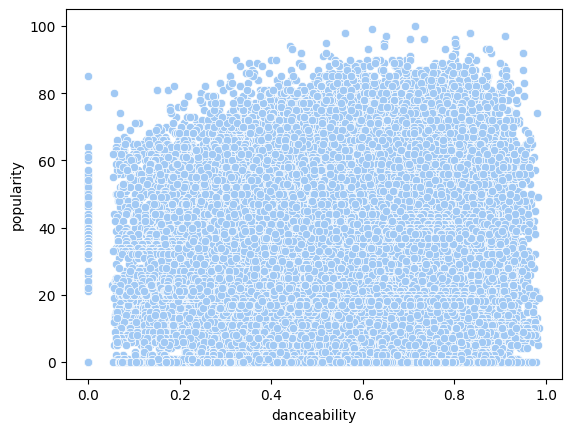

In [45]:
sns.scatterplot(data, x='danceability', y='popularity')

Так и напрашивается разбить данные на категории

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='danceability_bins', ylabel='popularity'>

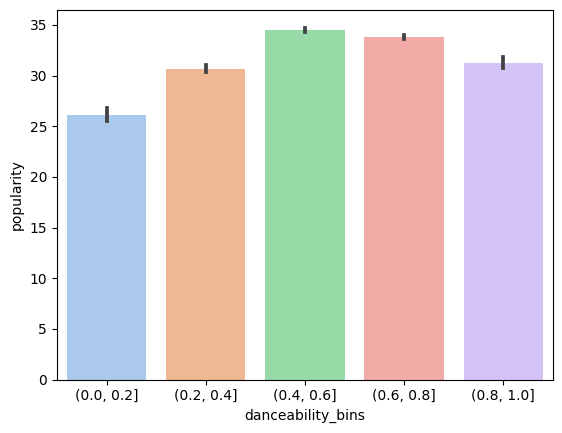

In [47]:
dance_pop = data['popularity'].to_frame().copy()
dance_pop['danceability_bins'] = pd.cut(data['danceability'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
sns.barplot(dance_pop, x='danceability_bins', y='popularity')

In [59]:
dance_pop['danceability_bins'].value_counts()

danceability_bins
(0.6, 0.8]    43066
(0.4, 0.6]    42719
(0.2, 0.4]    16061
(0.8, 1.0]     8768
(0.0, 0.2]     3228
Name: count, dtype: int64

Можно увидеть, что треки, имеющие танцевальность ниже 0.4 оказываются менее популярны среди слушателей. При этом в диапазоне 0.4-0.6 танцевальность высока, это оптимальный показатель для популярности песни. Также практические такое же значение имеет и следующая категория 0.6-0.8. Ну а 0.8-1 немного дает спад, однако и треков для такой категории значительно меньше, чем для двух предыдущих

<Axes: xlabel='danceability_bins', ylabel='popularity'>

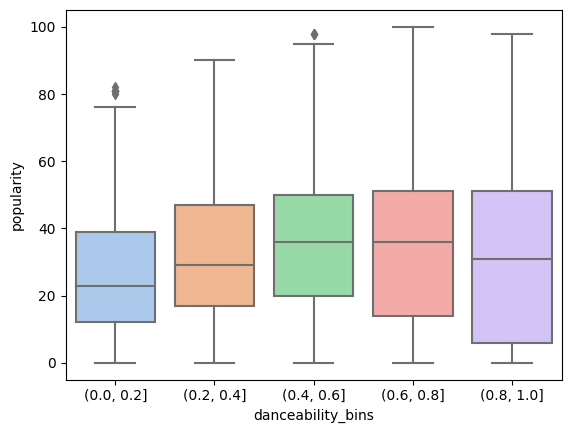

In [442]:
sns.boxplot(dance_pop, x='danceability_bins', y='popularity')

In [61]:
data[['danceability', 'popularity', 'duration_ms', 'explicit']].corr()

danceability  popularity  duration_ms  explicit
danceability      1.000000    0.035444    -0.073435  0.122506
popularity        0.035444    1.000000    -0.007129  0.044078
duration_ms      -0.073435   -0.007129     1.000000 -0.065270
explicit          0.122506    0.044078    -0.065270  1.000000

In [48]:
le = LabelEncoder()
dance_pop['danceability_category'] = le.fit_transform(dance_pop['danceability_bins'])

In [64]:
dance_pop[['danceability_category', 'popularity']].corr()

danceability_category  popularity
danceability_category               1.000000    0.033942
popularity                          0.033942    1.000000

Хоть и корреляция все же тут ну не очень, но все равно думаю, что такой признак будет довольно полезен, тем более в объединении с другими

## Energy

Распределим данные по категориям и посмотрим на популярность. Думаю более энергичные песни могут быть популярнее

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='energy_bins', ylabel='popularity'>

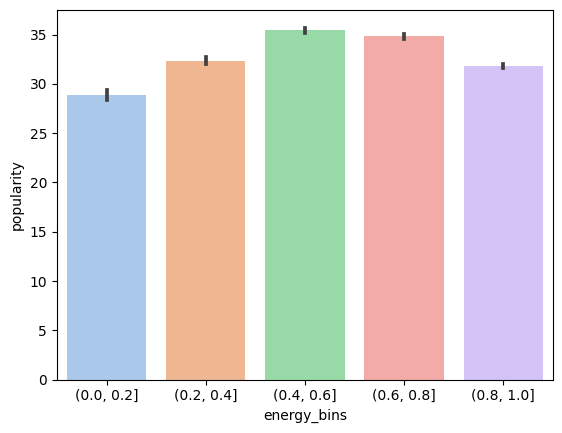

In [49]:
energy_popularity = data[['energy', 'popularity']].copy()
energy_popularity['energy_bins'] = pd.cut(data['energy'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
sns.barplot(energy_popularity, x='energy_bins', y='popularity')

<Axes: xlabel='energy_bins', ylabel='popularity'>

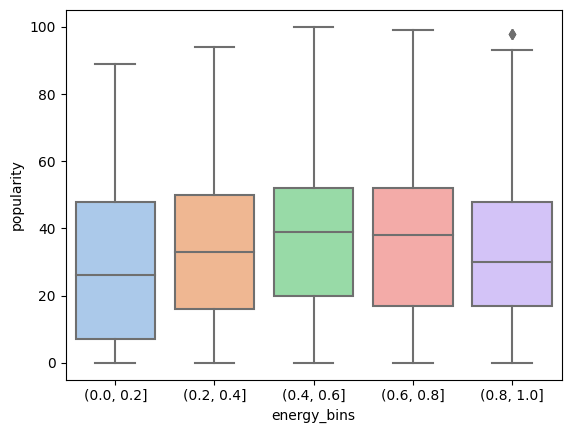

In [444]:
sns.boxplot(energy_popularity, x='energy_bins', y='popularity')

Графики в случае с energy крайне похожи на danceability, что было вероятно. И опять же, в среднем, если energy больше 0.4, то значения популярность будет более высокой

In [50]:
le = LabelEncoder()
energy_popularity['energy_category'] = le.fit_transform(energy_popularity['energy_bins'])

In [68]:
data[['energy', 'popularity']].corr()

energy  popularity
energy      1.000000    0.001053
popularity  0.001053    1.000000

In [51]:
energy_popularity[['energy_category', 'popularity']].corr()

energy_category  popularity
energy_category         1.000000    0.006303
popularity              0.006303    1.000000

Проверим так же на схожесть energy, danceability

In [71]:
data[['energy', 'danceability']].corr()

energy  danceability
energy        1.000000      0.134325
danceability  0.134325      1.000000

In [52]:
energy_danceability = pd.DataFrame({
    'danceability_category': dance_pop['danceability_category'],
    'energy_category': energy_popularity['energy_category']
})

In [73]:
energy_danceability.corr()

danceability_category  energy_category
danceability_category               1.000000         0.126576
energy_category                     0.126576         1.000000

Между собой есть пересечения у danceability и energy, но не такие значительные, как я думал

## Признак оптимальности танцевальности и энергетики

Как было видно ранее, танцевальность и энергетика примерно схожи по распределениям. И в среднем есть опеределенные значения, которые трек делают популярнее.

На графике столбики с danceability, energy, имеющие значения 0.4 - 0.8 были популярнее других

In [53]:
danceability_energy = pd.DataFrame({
    'is_optimal_danceability': data['danceability'].apply(lambda x: 1 if 0.4 <= x <= 0.8 else 0),
    'is_optimal_energy': data['energy'].apply(lambda x: 1 if 0.4 <= x <= 0.8 else 0),
    'popularity': data['popularity']
})

Новый df, где будет два столбца. Проверим, оптимальны ли danceability и energy, и посмотрим на результат популярности трека

In [54]:
grouped_data = danceability_energy.groupby(['is_optimal_danceability', 'is_optimal_energy'], as_index=False).popularity.mean()

In [76]:
grouped_data

is_optimal_danceability  is_optimal_energy  popularity
0                        0                  0   28.588674
1                        0                  1   32.877729
2                        1                  0   32.683026
3                        1                  1   35.657338

In [55]:
heatmap_data = danceability_energy.groupby(['is_optimal_danceability', 'is_optimal_energy']).popularity.mean().unstack()

<Axes: xlabel='is_optimal_energy', ylabel='is_optimal_danceability'>

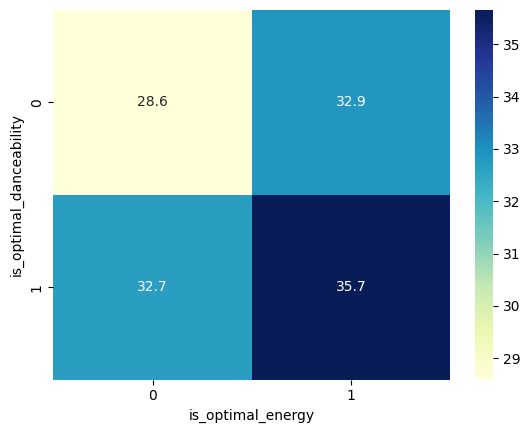

In [447]:
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")

В целом я результатом доволен. Оказалось неплохо. Если трек не оптимален по танцевальности и энергетике, то значение популярности будет 28

Если есть только одна оптимальная характеристика - тогда значение будет около 32

Если есть обе - то уже 35

На наших данных, где в среднем треки имеют популярность от 20 до 50-60, это хоть какой-то полезный(пусть и не большой до сих пор разброс)

In [56]:
danceability_energy['is_optimal_overall'] = danceability_energy['is_optimal_danceability'] + danceability_energy['is_optimal_energy'] 

In [80]:
danceability_energy

is_optimal_danceability  is_optimal_energy  popularity  \
0                             1                  1          73   
1                             1                  0          55   
2                             1                  0          57   
3                             0                  0          71   
4                             1                  1          82   
...                         ...                ...         ...   
113995                        0                  0          21   
113996                        0                  0          22   
113997                        1                  0          22   
113998                        1                  1          41   
113999                        1                  1          22   

        is_optimal_overall  
0                        2  
1                        1  
2                        1  
3                        0  
4                        2  
...                    ...  
113995                   0  
113996                   0  
113997                   1  
113998                   2  
113999                   2  

[113999 rows x 4 columns]

И сделал объединение в одну переменную

In [81]:
danceability_energy.corr()

is_optimal_danceability  is_optimal_energy  \
is_optimal_danceability                 1.000000           0.084544   
is_optimal_energy                       0.084544           1.000000   
popularity                              0.074373           0.079458   
is_optimal_overall                      0.688865           0.780534   

                         popularity  is_optimal_overall  
is_optimal_danceability    0.074373            0.688865  
is_optimal_energy          0.079458            0.780534  
popularity                 1.000000            0.104464  
is_optimal_overall         0.104464            1.000000

Ну уже удалось добиться большей связи между популярностью и оптимальностью danceability, energy, корреляция уже составляет 0.1

## Loudness

Гипотеза: Относительно громкие или тихие треки будут менее популярны, чем средние значения

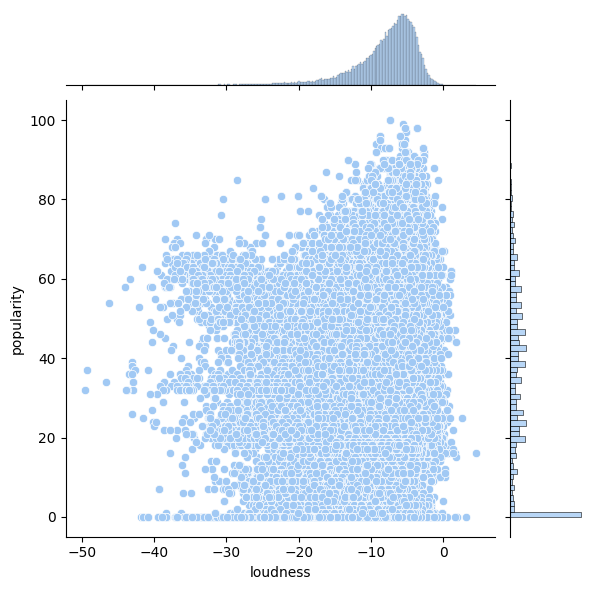

In [448]:
sns.jointplot(data, x='loudness', y='popularity')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loudness', ylabel='popularity'>

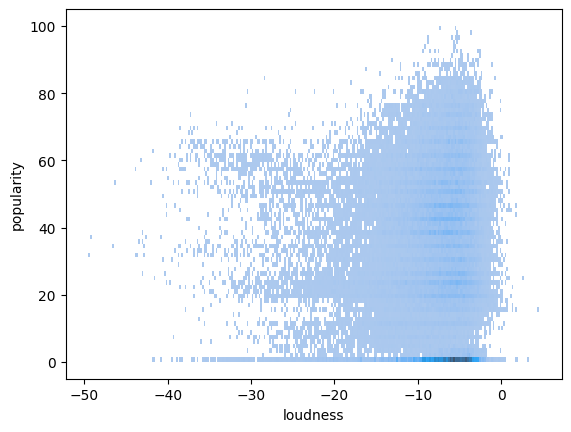

In [106]:
sns.histplot(data, x='loudness', y='popularity')

По графикам видно, что в пределах громкости от -15 до 0 находятся большинство треков, они же являются довольно популярными. Плотность популярных треков тут увеличивается, что видно по более синему цвету. А также популярность сама находится на графике значительно выше, чем значения менее этого порога

In [107]:
data.loudness.max()

4.532

<Axes: xlabel='loudness', ylabel='Count'>

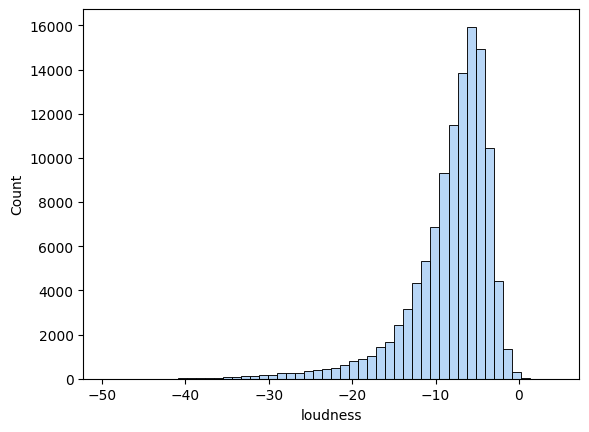

In [449]:
sns.histplot(data['loudness'], bins=50)

Еще график для четкого видения распределения треков по громкости

Сделаем разделение по категориям

In [57]:
loudness_popularity = data[['loudness', 'popularity']].copy()
bins = [-50, -20, -10, 5]
labels = ['Low', 'Medium', 'High']

loudness_popularity['loudness_category'] = pd.cut(loudness_popularity['loudness'], bins=bins, labels=labels)

In [58]:
loudness_popularity['loudness_category'].value_counts()

loudness_category
High      85387
Medium    24417
Low        4195
Name: count, dtype: int64

<Axes: xlabel='loudness_category', ylabel='popularity'>

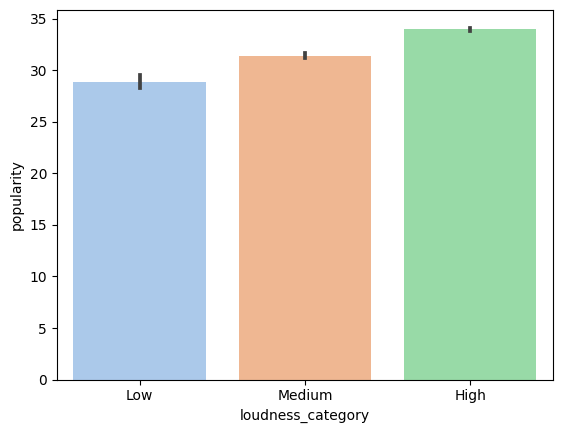

In [450]:
sns.barplot(loudness_popularity, x='loudness_category', y='popularity')

По графику можно понять, что громкие треки будут более предпочтительны для слушателей, а вот тихие - нет. Большинство треков будет в категории high

In [85]:
data[['popularity', 'loudness']].corr()

popularity  loudness
popularity     1.00000   0.05042
loudness       0.05042   1.00000

In [59]:
le = LabelEncoder()
loudness_popularity['loudness_category_encoded'] = le.fit_transform(loudness_popularity['loudness_category'])
loudness_popularity[['popularity', 'loudness_category_encoded']].corr()

popularity  loudness_category_encoded
popularity                   1.000000                  -0.051852
loudness_category_encoded   -0.051852                   1.000000

Как итог выделил громкость на уровни, все равно это нужно было бы сделать, анализировать конкретные значения смысла нет. При этом корреляция чуть-чуть повысилась по сравнению с оригинальным признаком. На самом деле оказалось, что громкость влияет сильнее, чем я думал, и по графикам также это видно

## Mode - наклонение

Ощущение, что признак будет не особо полезным, ведь никто сильно не задумывается, в миноре или мажоре написана песня. А для анализа настроения есть еще один признак. Возможно вместе с ним наклонение и сыграет какую-то роль

<Axes: xlabel='mode', ylabel='popularity'>

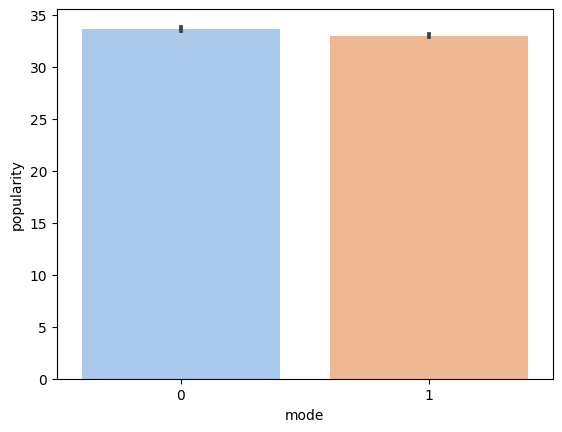

In [451]:
sns.barplot(data, x='mode', y='popularity')

Разницы практически нет

<Axes: xlabel='mode', ylabel='popularity'>

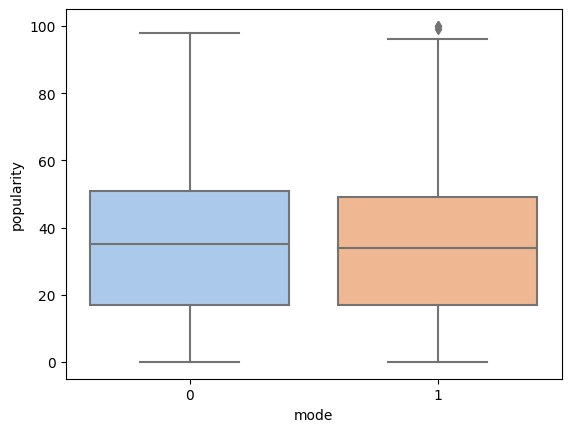

In [452]:
sns.boxplot(data, x='mode', y='popularity')

Распределения тоже очень-очень похожи между собой

In [89]:
data['mode'].value_counts()

mode
1    72681
0    41318
Name: count, dtype: int64

In [117]:
data[['mode', 'popularity']].corr()

mode  popularity
mode        1.000000   -0.013948
popularity -0.013948    1.000000

Ну и корреляция так же низкая

## Speechiness

Вот тут сложно сказать, чего можно от данных ожидать. Посмотрим на распределения

<Axes: xlabel='speechiness', ylabel='popularity'>

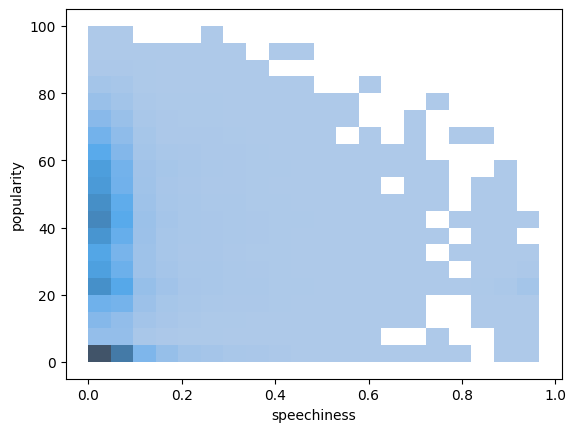

In [453]:
sns.histplot(data, x='speechiness', y='popularity', bins=20)

Большинство треков имеют низкий показатель. Что говорит о том, что людям в большинстве своем нравится музыкальная составляющая, а не речетатив. Идя ближе к 0.6 уже становится крайне мало треков

In [60]:
speech_popularity = data[['speechiness', 'popularity']].copy()

In [61]:
speech_popularity['speechiness_category'] = pd.cut(speech_popularity['speechiness'], bins=[-1, 0.3, 0.6, 1], labels=False)

In [62]:
speech_popularity['speechiness_category'].value_counts()

speechiness_category
0    109424
1      3650
2       925
Name: count, dtype: int64

In [63]:
speech_popularity.isna().sum()

speechiness             0
popularity              0
speechiness_category    0
dtype: int64

<Axes: xlabel='speechiness_category', ylabel='popularity'>

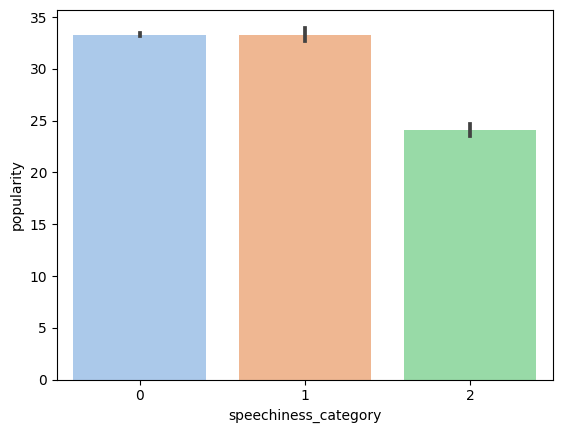

In [454]:
sns.barplot(speech_popularity, x='speechiness_category', y='popularity')

По графику видно, что все треки с параметром большим 0.6 уже значительно менее популярны, вероятно это не музыка вовсе даже. А вот чем ближе к нулю, тем популярность растет

In [124]:
speech_popularity.corr()

speechiness  popularity  speechiness_category
speechiness              1.000000   -0.044930              0.855679
popularity              -0.044930    1.000000             -0.026275
speechiness_category     0.855679   -0.026275              1.000000

Но как итог, не сильно полезный признак

## Acousticness

Есть предположение, что акустические треки многим нравятся

In [64]:
ac_popularity = data[['acousticness', 'popularity']].copy()

In [455]:
sns.histplot(ac_popularity, x='acousticness', y='popularity', bins=15)

<Axes: xlabel='acousticness', ylabel='popularity'>

Большинство треков имеет крайне низкий параметр

In [66]:
ac_popularity['acousticness_category'] = pd.cut(ac_popularity['acousticness'], bins=[-1, 0.3, 0.6, 1], labels=False)

In [128]:
ac_popularity.acousticness_category.value_counts()

acousticness_category
0    68020
2    28271
1    17708
Name: count, dtype: int64

In [456]:
sns.barplot(ac_popularity, x='acousticness_category', y='popularity')

<Axes: xlabel='acousticness_category', ylabel='popularity'>

In [130]:
ac_popularity.corr()

acousticness  popularity  acousticness_category
acousticness               1.000000   -0.025458               0.958726
popularity                -0.025458    1.000000              -0.019030
acousticness_category      0.958726   -0.019030               1.000000

В среднем менее акустичные треки и треки со средними показателями имеют большую популярность среди слушателей

## Instrumentalness

Думаю, что сильно инструментальные треки будут непопулярными среди слушателей

In [67]:
inst_pop = data[['instrumentalness', 'popularity']].copy()

<Axes: xlabel='instrumentalness', ylabel='popularity'>

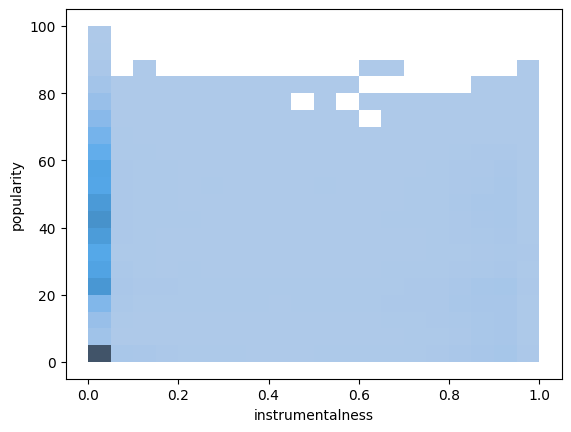

In [457]:
sns.histplot(inst_pop, x='instrumentalness', y='popularity', bins=20)

Распределение довольно похоже на акустичность

In [68]:
inst_pop['instrumentalness_category'] = pd.cut(inst_pop['instrumentalness'], bins=[-1, 0.3, 0.7, 1], labels=False)

<Axes: xlabel='instrumentalness_category', ylabel='popularity'>

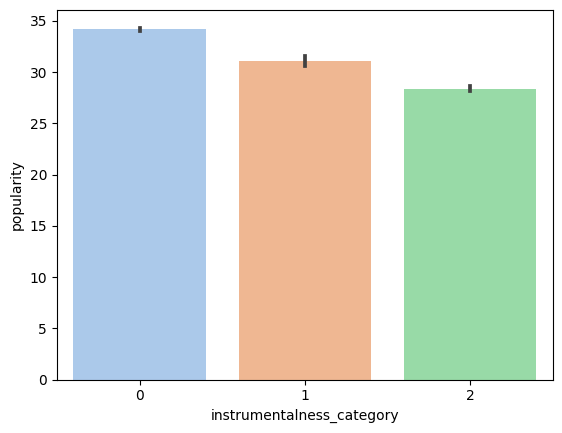

In [458]:
sns.barplot(inst_pop, x='instrumentalness_category', y='popularity')

Треки с большими значениями instrumentalness оказываются менее популярными

## Выделение общего признака по акустичности, инструментальности и speechiness

In [69]:
inst_ac = pd.DataFrame({
    'ac_category': ac_popularity['acousticness_category'],
    'inst_category': inst_pop['instrumentalness_category'],
    'sp_category': speech_popularity['speechiness_category'],
    'popularity': data['popularity']
})

In [99]:
inst_ac.corr()

ac_category  inst_category  sp_category  popularity
ac_category       1.000000       0.090042     0.077908   -0.019030
inst_category     0.090042       1.000000    -0.068123   -0.091815
sp_category       0.077908      -0.068123     1.000000   -0.026275
popularity       -0.019030      -0.091815    -0.026275    1.000000

In [70]:
data[['acousticness', 'instrumentalness', 'speechiness', 'popularity']].corr()

acousticness  instrumentalness  speechiness  popularity
acousticness          1.000000          0.104033    -0.002184   -0.025458
instrumentalness      0.104033          1.000000    -0.089617   -0.095147
speechiness          -0.002184         -0.089617     1.000000   -0.044930
popularity           -0.025458         -0.095147    -0.044930    1.000000

Сами по себе три признака не дают сильной корреляции с таргетом. Но в целом можно выделить общий признак баланса инструментальности трека и наличия речи в нем, создав еще одну фичу

In [71]:
data1 = data[['acousticness', 'instrumentalness', 'speechiness', 'popularity']].copy()

In [72]:
data1['coef'] = data1['acousticness'] + data1['instrumentalness'] - data1['speechiness']

In [459]:
sns.histplot(data1, x='coef', y='popularity', bins=20)

<Axes: xlabel='coef', ylabel='popularity'>

Распределим по категориям

In [73]:
data1['coef_category'] = pd.cut(
    data1['coef'],
    bins=[-1, 0, 0.5, 2],
    labels=False
)

In [106]:
data1['coef_category'].value_counts()

coef_category
1    41551
2    41103
0    31345
Name: count, dtype: int64

<Axes: xlabel='coef_category', ylabel='popularity'>

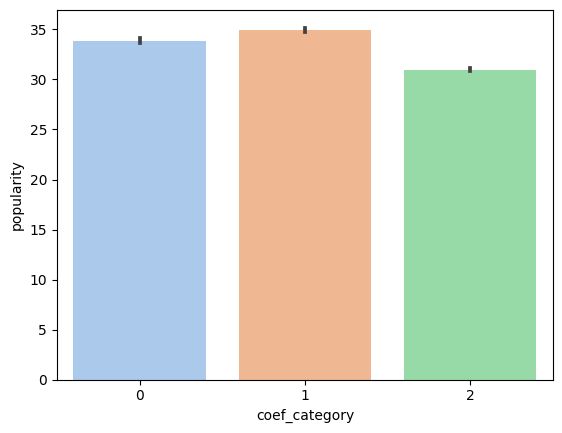

In [460]:
sns.barplot(data1, x='coef_category', y='popularity')

In [145]:
data1.corr()

acousticness  instrumentalness  speechiness  popularity  \
acousticness          1.000000          0.104033    -0.002184   -0.025458   
instrumentalness      0.104033          1.000000    -0.089617   -0.095147   
speechiness          -0.002184         -0.089617     1.000000   -0.044930   
popularity           -0.025458         -0.095147    -0.044930    1.000000   
coef                  0.737306          0.714411    -0.271119   -0.067008   
coef_category         0.667115          0.505647    -0.289692   -0.056058   

                      coef  coef_category  
acousticness      0.737306       0.667115  
instrumentalness  0.714411       0.505647  
speechiness      -0.271119      -0.289692  
popularity       -0.067008      -0.056058  
coef              1.000000       0.826257  
coef_category     0.826257       1.000000

Не особо помог новый признак общий в рамках корреляции. Она все также невысока

## Liveness

Треки, записанные в лайве могут быть менее популярны

In [74]:
live_pop = data[['liveness', 'popularity']].copy()

In [461]:
sns.histplot(live_pop, x='liveness', y='popularity')

<Axes: xlabel='liveness', ylabel='popularity'>

Среднее сосредоточение треков опять же близко к нулю, попробуем на этот раз разделить треки лишь на две категории

In [75]:
live_pop['liveness_category'] = pd.cut(live_pop['liveness'], bins=[-1, 0.15, 1], labels=False)

In [109]:
live_pop['liveness_category'].value_counts()

liveness_category
0    64257
1    49742
Name: count, dtype: int64

<Axes: xlabel='liveness_category', ylabel='popularity'>

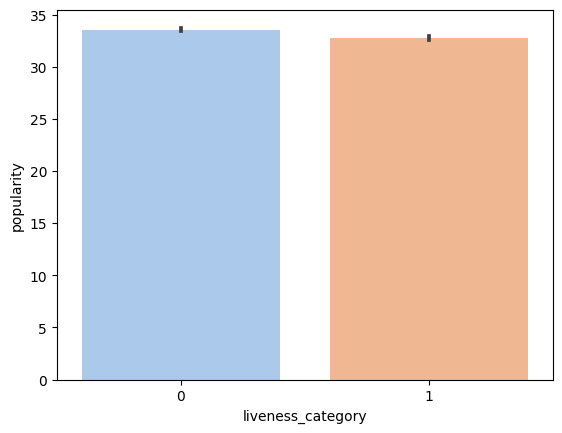

In [462]:
sns.barplot(live_pop, x='liveness_category', y='popularity')

In [151]:
live_pop.corr()

liveness  popularity  liveness_category
liveness           1.000000   -0.005397           0.682294
popularity        -0.005397    1.000000          -0.018180
liveness_category  0.682294   -0.018180           1.000000

В итоге удалось поднять немного корреляцию и сбалансировать данные по классам. В целом довольно мало треков с высоким показателем liveness, а популярность среди категорий вообще незаметна

## Валентность или по сути настроение

Признак интересный, гипотез не будет, ведь могут людям нравиться как грустные, так и более веселые треки

In [76]:
val_pop = data[['valence', 'popularity']].copy()

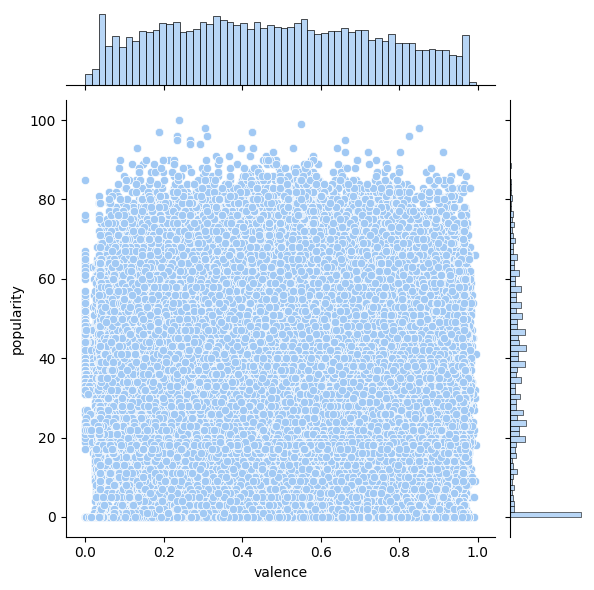

In [463]:
sns.jointplot(val_pop, x='valence', y='popularity')

Данные крайне различные, распределены довольно равномерно

In [77]:
val_pop['valence_category'] = pd.cut(val_pop['valence'], bins=3, labels=False)

<Axes: xlabel='valence_category', ylabel='popularity'>

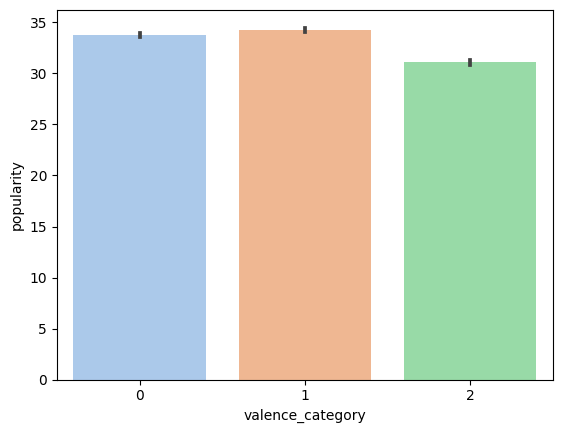

In [464]:
sns.barplot(val_pop, x='valence_category', y='popularity')

Все-таки треки с довольно высоким показателем будут менее популярны, но разница минимальна

In [157]:
val_pop.corr()

valence  popularity  valence_category
valence           1.000000   -0.040522          0.933383
popularity       -0.040522    1.000000         -0.043815
valence_category  0.933383   -0.043815          1.000000

Можно предположить, что valence и признаки связанные с настроением песни(danceability и energy) будут похожи между собой

In [158]:
data[['valence', 'danceability', 'energy']].corr()

valence  danceability    energy
valence       1.000000      0.477347  0.258937
danceability  0.477347      1.000000  0.134325
energy        0.258937      0.134325  1.000000

И правда довольно высокая корреляция

## Mood Score
Попробуем на основе этих трех признаков выделить еще один связанный с настроением 

In [78]:
val_impact = data[['valence', 'danceability', 'energy', 'popularity']].copy()

Будем считать что валентность лучше отражает настроение

In [79]:
val_impact['mood_score'] = (0.5 * val_impact['valence'] + 0.3 * val_impact['danceability'] + 0.2 * val_impact['energy'])

Проверим два способа: разобью с жестким отделением самостоятельно и равномерно по квантилям

<Axes: xlabel='mood_score', ylabel='popularity'>

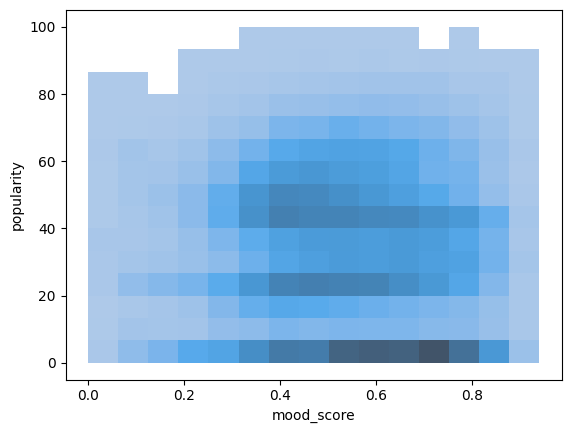

In [465]:
sns.histplot(val_impact, x='mood_score', y='popularity', bins=15)

In [80]:
val_impact['mood_category'] = pd.cut(val_impact['mood_score'], bins=[0, 0.2, 1], labels=False)

In [117]:
val_impact['mood_category'].value_counts()

mood_category
1.0    109694
0.0      4304
Name: count, dtype: int64

<Axes: xlabel='mood_category', ylabel='popularity'>

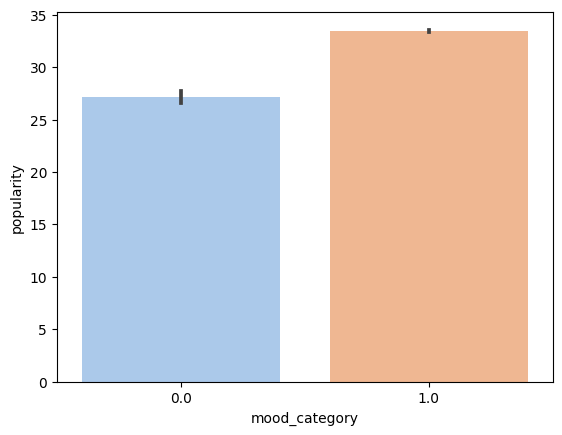

In [466]:
sns.barplot(val_impact, x='mood_category', y='popularity')

Довольно маленькую популярность имеют треки категории 0

In [165]:
val_impact.corr()

valence  danceability    energy  popularity  mood_score  \
valence        1.000000      0.477347  0.258937   -0.040522    0.928183   
danceability   0.477347      1.000000  0.134325    0.035444    0.668805   
energy         0.258937      0.134325  1.000000    0.001053    0.503495   
popularity    -0.040522      0.035444  0.001053    1.000000   -0.018588   
mood_score     0.928183      0.668805  0.503495   -0.018588    1.000000   
mood_category  0.307808      0.398598  0.383583    0.053958    0.443016   

               mood_category  
valence             0.307808  
danceability        0.398598  
energy              0.383583  
popularity          0.053958  
mood_score          0.443016  
mood_category       1.000000

Попробуем разделить еще на равные части

In [81]:
val_impact['mood_score_category'] = pd.qcut(val_impact['mood_score'], q=4, labels=False)

<Axes: xlabel='mood_score_category', ylabel='popularity'>

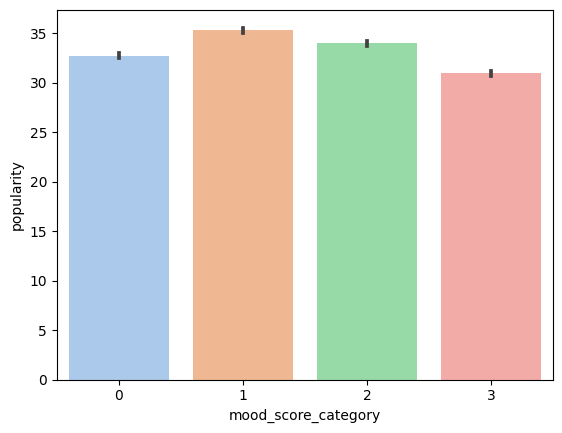

In [82]:
sns.barplot(val_impact, x='mood_score_category', y='popularity')

Примерно равные все категории

In [168]:
val_impact['mood_score_category'].value_counts()

mood_score_category
2    28527
0    28506
1    28495
3    28471
Name: count, dtype: int64

In [169]:
val_impact.corr()

valence  danceability    energy  popularity  mood_score  \
valence              1.000000      0.477347  0.258937   -0.040522    0.928183   
danceability         0.477347      1.000000  0.134325    0.035444    0.668805   
energy               0.258937      0.134325  1.000000    0.001053    0.503495   
popularity          -0.040522      0.035444  0.001053    1.000000   -0.018588   
mood_score           0.928183      0.668805  0.503495   -0.018588    1.000000   
mood_category        0.307808      0.398598  0.383583    0.053958    0.443016   
mood_score_category  0.906084      0.600105  0.426849   -0.033459    0.942943   

                     mood_category  mood_score_category  
valence                   0.307808             0.906084  
danceability              0.398598             0.600105  
energy                    0.383583             0.426849  
popularity                0.053958            -0.033459  
mood_score                0.443016             0.942943  
mood_category             1.000000             0.265743  
mood_score_category       0.265743             1.000000

В итоге большей корреляции с популярностью удалось добиться засчет жесткого разделения(mood_category) данных на очень грустные треки и на те, которые к ним не относятся. Но в целом данные не особо различаются между категориями, ведь да, настроение бывает разным, и под него хочется брать разные треки

## Темп

In [83]:
tempo_pop = data[['tempo', 'popularity']].copy()

<Axes: xlabel='tempo', ylabel='popularity'>

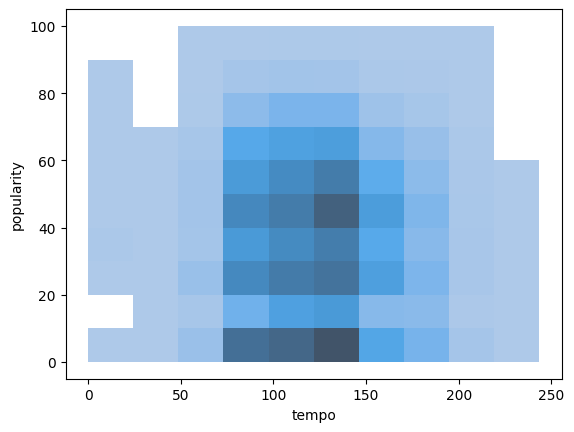

In [468]:
sns.histplot(tempo_pop, x='tempo', y='popularity', bins=10)

В основном где-то большее скопление песен с bpm от 80 до 150, что ожидаемо

In [173]:
tempo_pop.corr()

tempo  popularity
tempo       1.000000    0.013212
popularity  0.013212    1.000000

Разбиваем по категориям, чтобы посмотреть на популярность по ним

In [84]:
tempo_pop['tempo_category'] = pd.cut(tempo_pop['tempo'], bins=[-1, 100, 150, 170, 250], labels=False)

In [175]:
tempo_pop['tempo_category'].value_counts()

tempo_category
1    64208
0    29881
2    10439
3     9471
Name: count, dtype: int64

<Axes: xlabel='tempo_category', ylabel='popularity'>

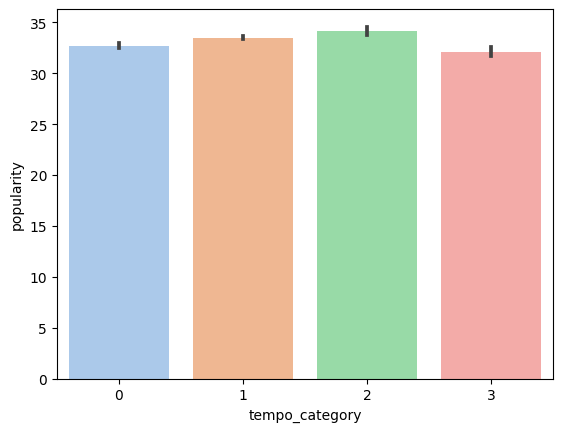

In [469]:
sns.barplot(tempo_pop, x='tempo_category', y='popularity')

Все примерно одинаковое, но треки с очень высоким темпом имеют ниже популярность

In [177]:
tempo_pop.corr()

tempo  popularity  tempo_category
tempo           1.000000    0.013212        0.907671
popularity      0.013212    1.000000        0.002280
tempo_category  0.907671    0.002280        1.000000

## Признак на основе темпа и энергии
Сам по себе темп не особо влияет как-то на таргет, но может влиять вместе с energy трека

In [85]:
tempo_pop['energy'] = data['energy'].copy()

In [86]:
tempo_pop['total_energy'] = (tempo_pop['tempo'] + tempo_pop['energy']) / 2

<Axes: xlabel='total_energy', ylabel='popularity'>

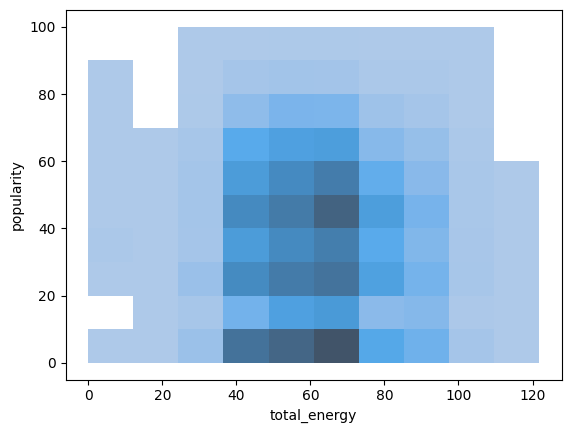

In [470]:
sns.histplot(tempo_pop, x='total_energy', y='popularity', bins=10)

In [87]:
tempo_pop['tempo_energy_category'] = pd.qcut(tempo_pop['total_energy'], q=4, labels=False)

In [182]:
tempo_pop.corr()

tempo  popularity  tempo_category    energy  \
tempo                  1.000000    0.013212        0.907671  0.247852   
popularity             0.013212    1.000000        0.002280  0.001053   
tempo_category         0.907671    0.002280        1.000000  0.213256   
energy                 0.247852    0.001053        0.213256  1.000000   
total_energy           0.999967    0.013193        0.907543  0.255702   
tempo_energy_category  0.930094    0.016099        0.829005  0.237968   

                       total_energy  tempo_energy_category  
tempo                      0.999967               0.930094  
popularity                 0.013193               0.016099  
tempo_category             0.907543               0.829005  
energy                     0.255702               0.237968  
total_energy               1.000000               0.930125  
tempo_energy_category      0.930125               1.000000

In [88]:
tempo_pop['tempo_energy_category'] = pd.cut(tempo_pop['total_energy'], bins=[-1, 40, 70, 125], labels=False)

<Axes: xlabel='tempo_energy_category', ylabel='popularity'>

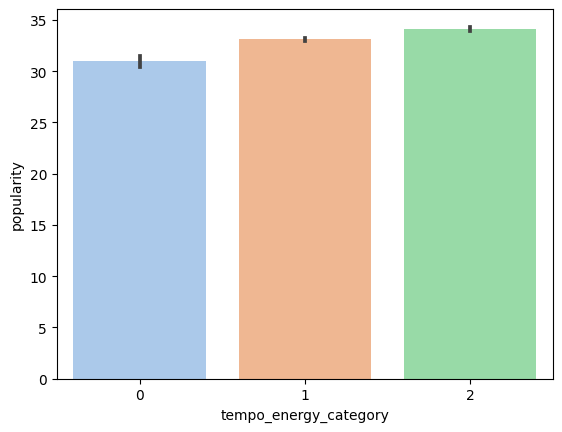

In [471]:
sns.barplot(tempo_pop, x='tempo_energy_category', y='popularity')

Тут уже больше видна разница между категориями. Чем выше значение признака, тем больше популярность

In [185]:
tempo_pop.corr()

tempo  popularity  tempo_category    energy  \
tempo                  1.000000    0.013212        0.907671  0.247852   
popularity             0.013212    1.000000        0.002280  0.001053   
tempo_category         0.907671    0.002280        1.000000  0.213256   
energy                 0.247852    0.001053        0.213256  1.000000   
total_energy           0.999967    0.013193        0.907543  0.255702   
tempo_energy_category  0.839346    0.031801        0.721462  0.235007   

                       total_energy  tempo_energy_category  
tempo                      0.999967               0.839346  
popularity                 0.013193               0.031801  
tempo_category             0.907543               0.721462  
energy                     0.255702               0.235007  
total_energy               1.000000               0.839544  
tempo_energy_category      0.839544               1.000000

Получилось чуть улучшить влияние темпа и энергии песни на таргет. Причем ручное разделение по трем категориям дало больше информации, чем равномерное

## Жанр

Все-таки ведь явно есть жанры, которые нравятся многим людям. Именно поиском таких сейчас и займемся

Возьмем начальный датасет, чтобы узнать названия самих жанров, без LE

In [89]:
genre_pop = pd.read_csv('/kaggle/input/songs-spotify/dataset.csv')

In [90]:
genre_pop = genre_pop[['track_genre', 'popularity']]

In [130]:
genre_pop.track_genre.nunique()

114

Сгруппируем по средней популярности

In [91]:
genre_pop.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

track_genre
pop-film          59.283
k-pop             56.896
chill             53.651
sad               52.379
grunge            49.594
                   ...  
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210
Name: popularity, Length: 114, dtype: float64

Определим медианное значение, выше которого будем считать трек популярным

In [92]:
popularity_threshold = genre_pop.popularity.median()

In [156]:
popularity_threshold

35.0

Считаем число треков, которые будут популярны в определенном жанре

In [93]:
popular_tracks_by_genre = genre_pop[genre_pop['popularity'] > popularity_threshold].groupby('track_genre').size()

In [158]:
popular_tracks_by_genre.sort_values(ascending=False)

track_genre
forro             1000
sertanejo          999
gospel             993
turkish            974
pagode             965
                  ... 
chicago-house       50
kids                48
detroit-techno      40
grindcore           15
tango                8
Length: 112, dtype: int64

А теперь проверяем общее количество

In [94]:
total_tracks_by_genre = genre_pop.groupby('track_genre').size()

In [160]:
total_tracks_by_genre.unique() # оказывается для каждого жанра по 1000 треков

array([1000])

Смотрим на долю треков, которые будут популярны среди общего числа треков в жанре

In [95]:
genre_popularity_rate = (popular_tracks_by_genre / 1000).sort_values(ascending=False)

In [96]:
genre_popularity_rate = genre_popularity_rate.reset_index(name='rate')

Там где не было популярных треков оказался Nan

In [97]:
genre_popularity_rate = genre_popularity_rate.fillna(0)

In [164]:
genre_popularity_rate.isna().sum()

track_genre    0
rate           0
dtype: int64

<Axes: xlabel='track_genre', ylabel='rate'>

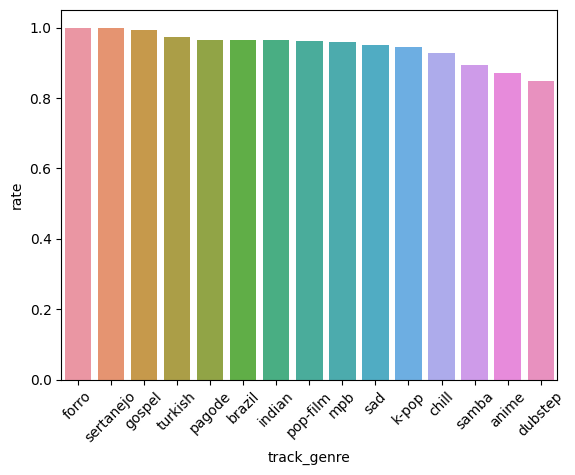

In [472]:
plt.xticks(rotation=45)
sns.barplot(genre_popularity_rate.nlargest(15, 'rate'), x='track_genre', y='rate')

<Axes: xlabel='track_genre', ylabel='rate'>

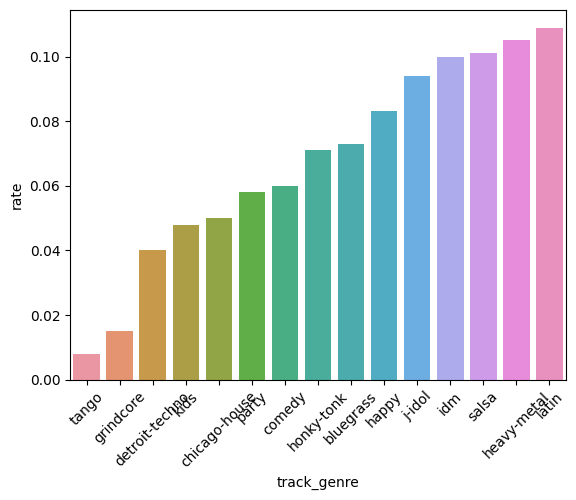

In [201]:
plt.xticks(rotation=45)
sns.barplot(genre_popularity_rate.nsmallest(15, 'rate'), x='track_genre', y='rate')

Графики по самым популярным и непопулярным жанрам

In [202]:
genre_popularity_rate

track_genre   rate
0             forro  1.000
1         sertanejo  0.999
2            gospel  0.993
3           turkish  0.974
4            pagode  0.965
..              ...    ...
107   chicago-house  0.050
108            kids  0.048
109  detroit-techno  0.040
110       grindcore  0.015
111           tango  0.008

[112 rows x 2 columns]

Разделяем данные по категориям и возвращаем номер категории

In [98]:
def genre_category(probability):
    if probability > 0.6:
        return 2 
    elif probability > 0.4:
        return 1
    else:
        return 0

genre_popularity_rate['category'] = genre_popularity_rate['rate'].apply(genre_category)

In [166]:
genre_popularity_rate.isna().sum()

track_genre    0
rate           0
category       0
dtype: int64

In [99]:
genre_pop = genre_pop.merge(genre_popularity_rate[['track_genre', 'category']], on='track_genre', how='left')

In [168]:
genre_pop.isna().sum()

track_genre       0
popularity        0
category       2000
dtype: int64

In [169]:
genre_pop.category.value_counts()

category
2.0    45000
0.0    45000
1.0    22000
Name: count, dtype: int64

In [100]:
genre_pop = genre_pop.fillna(0)

In [171]:
genre_pop.isna().sum()

track_genre    0
popularity     0
category       0
dtype: int64

In [101]:
genre_pop = genre_pop.merge(genre_popularity_rate[['track_genre', 'rate']], on='track_genre', how='left')

In [173]:
genre_pop

track_genre  popularity  category   rate
0          acoustic          73       2.0  0.651
1          acoustic          55       2.0  0.651
2          acoustic          57       2.0  0.651
3          acoustic          71       2.0  0.651
4          acoustic          82       2.0  0.651
...             ...         ...       ...    ...
113995  world-music          21       2.0  0.780
113996  world-music          22       2.0  0.780
113997  world-music          22       2.0  0.780
113998  world-music          41       2.0  0.780
113999  world-music          22       2.0  0.780

[114000 rows x 4 columns]

In [102]:
genre_pop = genre_pop.fillna(0)

In [103]:
genre_pop.drop(columns='track_genre').corr()

popularity  category      rate
popularity    1.000000  0.418317  0.447202
category      0.418317  1.000000  0.923109
rate          0.447202  0.923109  1.000000

In [104]:
data[['track_genre', 'popularity']].corr()

track_genre  popularity
track_genre     1.000000    0.032696
popularity      0.032696    1.000000

In [215]:
genre_pop

track_genre  popularity  category   rate
0          acoustic          73       2.0  0.651
1          acoustic          55       2.0  0.651
2          acoustic          57       2.0  0.651
3          acoustic          71       2.0  0.651
4          acoustic          82       2.0  0.651
...             ...         ...       ...    ...
113995  world-music          21       2.0  0.780
113996  world-music          22       2.0  0.780
113997  world-music          22       2.0  0.780
113998  world-music          41       2.0  0.780
113999  world-music          22       2.0  0.780

[114000 rows x 4 columns]

In [177]:
genre_pop.isna().sum()

track_genre    0
popularity     0
category       0
rate           0
dtype: int64

Изначально мы удаляли из датасета один трек с Nan во многих колонках, по индексу 65900. Удалим его и из этих датасетов, ведь считывали данные снова из файла, и он тут остался

In [178]:
genre_pop.loc[65900]

track_genre    k-pop
popularity         0
category         2.0
rate           0.944
Name: 65900, dtype: object

In [105]:
genre_pop = genre_pop.drop(65900)

In [180]:
genre_pop.shape

(113999, 4)

В итоге после объединения жанров по вероятности их треков стать популярными, получили корреляцию значительно превышающую изначальное значение в 0.03. Признак будет полезным

## Фича популярности артиста

Объединим данные по конкретным артистам, на основе этого создадим признак, является ли артист популярным. Посмотрим на долю треков, которые у артиста больше порогового значения. Если доля превышает значение в среднем по трекам артиста, то он популярный. Это будет бинарная переменная

In [106]:
artists = pd.read_csv('/kaggle/input/songs-spotify/dataset.csv')

In [107]:
artists = artists[['popularity', 'artists', 'track_id']]

In [183]:
artists

popularity                 artists                track_id
0               73             Gen Hoshino  5SuOikwiRyPMVoIQDJUgSV
1               55            Ben Woodward  4qPNDBW1i3p13qLCt0Ki3A
2               57  Ingrid Michaelson;ZAYN  1iJBSr7s7jYXzM8EGcbK5b
3               71            Kina Grannis  6lfxq3CG4xtTiEg7opyCyx
4               82        Chord Overstreet  5vjLSffimiIP26QG5WcN2K
...            ...                     ...                     ...
113995          21           Rainy Lullaby  2C3TZjDRiAzdyViavDJ217
113996          22           Rainy Lullaby  1hIz5L4IB9hN3WRYPOCGPw
113997          22           Cesária Evora  6x8ZfSoqDjuNa5SVP5QjvX
113998          41        Michael W. Smith  2e6sXL2bYv4bSz6VTdnfLs
113999          22           Cesária Evora  2hETkH7cOfqmz3LqZDHZf5

[114000 rows x 3 columns]

In [108]:
artists['is_popular'] = artists['popularity'] > 35

In [109]:
artist_popularity = artists.groupby('artists').agg(
    avg_popularity=('popularity', 'mean'),
    track_count=('track_id', 'count'),
    popular_tracks_ratio=('is_popular', 'mean')
).reset_index()

In [110]:
artist_popularity.sort_values('popular_tracks_ratio', ascending=False)

artists  avg_popularity  \
24104  Sam C.S.;Anirudh Ravichander;Shakthisree Gopalan       67.000000   
11078                                      Grupo aXtral       37.000000   
11064                        Grupo Presença;Mc Don Juan       41.000000   
11066                                   Grupo Revelação       43.791667   
11067                   Grupo Revelação;Benito Di Paula       50.000000   
...                                                 ...             ...   
22129                              Pulse Mandala;Suseti       27.000000   
22130                     Pulsedriver;Tiscore;Anna Grey        0.000000   
10650                             Gimmik;Charles Angels       11.000000   
22132                                    Punch Brothers       22.142857   
31436                                           龍藏Ryuzo       21.500000   

       track_count  popular_tracks_ratio  
24104            1                   1.0  
11078            1                   1.0  
11064            1                   1.0  
11066           24                   1.0  
11067            1                   1.0  
...            ...                   ...  
22129            1                   0.0  
22130            2                   0.0  
10650            1                   0.0  
22132           14                   0.0  
31436            2                   0.0  

[31437 rows x 4 columns]

Но проблема в том, что у многих артистов крайне мало треков, из-за чего ratio становится высоким

Добавим тогда еще и количество треков, чтобы оно так же учитывалось. Можно умножить ratio посчитанное на число треков артиста

In [111]:
artist_popularity['weighted_popular_tracks_ratio'] = artist_popularity['popular_tracks_ratio'] * artist_popularity['track_count']

In [112]:
artist_popularity.sort_values('weighted_popular_tracks_ratio', ascending=False).head(20)

artists  avg_popularity  track_count  \
26983            The Beatles       61.007168          279   
16049            Linkin Park       56.071429          224   
21810          Prateek Kuhad       46.331797          217   
2783                     BTS       68.596026          151   
8647           Elvis Presley       55.071006          169   
5016       Charlie Brown Jr.       42.224852          169   
2095          Arctic Monkeys       55.664474          152   
5583               CoComelon       49.368852          122   
1987              Anupam Roy       42.553719          121   
10764              Glee Cast       38.841727          139   
8245              Eason Chan       46.613861          101   
17378                 Maneva       45.925532           94   
13036               Jay Chou       52.215054           93   
22531              Rammstein       64.010989           91   
22762  Red Hot Chili Peppers       41.132075          159   
15474            Lamb of God       49.914894           94   
21545             Pink Floyd       55.775281           89   
20555            OneRepublic       30.861878          181   
20020                Nirvana       65.247059           85   
30139                 Yiruma       44.408602           93   

       popular_tracks_ratio  weighted_popular_tracks_ratio  
26983              1.000000                          279.0  
16049              0.946429                          212.0  
21810              0.824885                          179.0  
2783               1.000000                          151.0  
8647               0.893491                          151.0  
5016               0.840237                          142.0  
2095               0.875000                          133.0  
5583               0.991803                          121.0  
1987               0.884298                          107.0  
10764              0.705036                           98.0  
8245               0.950495                           96.0  
17378              1.000000                           94.0  
13036              1.000000                           93.0  
22531              1.000000                           91.0  
22762              0.572327                           91.0  
15474              0.957447                           90.0  
21545              1.000000                           89.0  
20555              0.491713                           89.0  
20020              1.000000                           85.0  
30139              0.892473                           83.0

Ну вот, теперь уже гораздо более правдоподобные данные

Осталось понять, какой взять порог, чтобы считать артиста популярным

In [113]:
global_avg_popular_ratio = artist_popularity.weighted_popular_tracks_ratio.mean()

In [190]:
global_avg_popular_ratio

1.7669943060724624

Казалось бы это очень низкий порог для того, чтобы считать артиста популярным. Но для баланса классов оставим это так

In [191]:
artist_popularity

artists  avg_popularity  \
0                                                 !nvite       23.000000   
1                                  "Puppy Dog Pals" Cast       57.500000   
2                                    "Weird Al" Yankovic       26.333333   
3      #Kids;Nursery Rhymes;Nursery Rhymes and Kids S...       34.000000   
4                                                 $affie       39.000000   
...                                                  ...             ...   
31432                                                黃仲崑       24.333333   
31433                                                 黃妃       24.000000   
31434                                                黃小琥       56.000000   
31435                                                黃敏華       20.000000   
31436                                            龍藏Ryuzo       21.500000   

       track_count  popular_tracks_ratio  weighted_popular_tracks_ratio  
0                2              0.500000                            1.0  
1                2              1.000000                            2.0  
2               15              0.066667                            1.0  
3                1              0.000000                            0.0  
4                1              1.000000                            1.0  
...            ...                   ...                            ...  
31432            3              0.000000                            0.0  
31433            2              0.000000                            0.0  
31434            1              1.000000                            1.0  
31435            1              0.000000                            0.0  
31436            2              0.000000                            0.0  

[31437 rows x 5 columns]

In [114]:
artist_popularity['is_popular_artist'] = (
    artist_popularity['weighted_popular_tracks_ratio'] > global_avg_popular_ratio
).astype(int)

In [193]:
artist_popularity.is_popular_artist.value_counts()

is_popular_artist
0    22802
1     8635
Name: count, dtype: int64

In [115]:
artists = artists.merge(artist_popularity[['artists', 'is_popular_artist']], on='artists', how='left')

In [116]:
artists = artists.merge(artist_popularity[['artists', 'weighted_popular_tracks_ratio']], on='artists', how='left')

In [196]:
artists.sort_values('weighted_popular_tracks_ratio', ascending=False)

popularity                          artists                track_id  \
11059          74                      The Beatles  5jgFfDIR6FR0gvlA56Nakr   
84282          62                      The Beatles  0u2WxM0Jw062o0XyNv1RDT   
84298          65                      The Beatles  68BTFws92cRztMS1oQ7Ewj   
11543          56                      The Beatles  1sjmKmR4u9xDeJHjDCn2bZ   
84291          66                      The Beatles  4MLBqAEzNN89o2M9h92Z26   
...           ...                              ...                     ...   
66939          30                   Kids Rock Kidz  3UFGGYxrSVNKJxAoj1nw1V   
66942           8  That Girl Lay Lay;Tha Slay Gang  1DREAEN2tHaaZIUDPDDMCe   
66943           9                   Mark D. Pencil  06yBbXZZ1Tl3phgAXslpQR   
70394          27                    Daniel Lo;林淑容  0YKJCMDtdfZs6MTtUSnBk9   
65900           0                              NaN  1kR4gIb7nGxHPI3D2ifs59   

       is_popular  is_popular_artist  weighted_popular_tracks_ratio  
11059        True                1.0                          279.0  
84282        True                1.0                          279.0  
84298        True                1.0                          279.0  
11543        True                1.0                          279.0  
84291        True                1.0                          279.0  
...           ...                ...                            ...  
66939       False                0.0                            0.0  
66942       False                0.0                            0.0  
66943       False                0.0                            0.0  
70394       False                0.0                            0.0  
65900       False                NaN                            NaN  

[114000 rows x 6 columns]

In [117]:
artists.drop(columns=['track_id', 'artists', 'is_popular']).corr()

popularity  is_popular_artist  \
popularity                       1.000000           0.377495   
is_popular_artist                0.377495           1.000000   
weighted_popular_tracks_ratio    0.238256           0.339719   

                               weighted_popular_tracks_ratio  
popularity                                          0.238256  
is_popular_artist                                   0.339719  
weighted_popular_tracks_ratio                       1.000000

Корреляция неплохая получилась. Ниже так же надо дропнуть строку с NaN

In [118]:
artists = artists.drop(65900)

In [119]:
artists.shape

(113999, 6)

Как итог, тут удалось выделить популярен артист или нет, чтобы из данных об артисте модель сразу представляла, популярные ли треки у этого артиста в среднем

## Фича взаимосвязи explicit и speechiness

In [120]:
data[['explicit', 'speechiness']].corr()

explicit  speechiness
explicit     1.000000     0.307951
speechiness  0.307951     1.000000

Эти две фичи коррелируют друг с другом, оно и логично, там, где больше речи, вероятнее и будут встречаться какие-то агрессивные слова, мат и так далее, что и позволяет оценить трек этой меткой

In [121]:
speech_exp = data[['explicit', 'speechiness', 'popularity']].copy()

In [122]:
speech_exp['high_speechiness'] = (speech_exp['speechiness'] > 0.15).astype(int)

In [242]:
speech_exp.high_speechiness.value_counts()

high_speechiness
0    100033
1     13966
Name: count, dtype: int64

In [123]:
speech_exp['speech_explicit_interaction'] = speech_exp['high_speechiness'] * speech_exp['explicit']

In [244]:
speech_exp.corr()

explicit  speechiness  popularity  \
explicit                     1.000000     0.307951    0.044078   
speechiness                  0.307951     1.000000   -0.044930   
popularity                   0.044078    -0.044930    1.000000   
high_speechiness             0.257557     0.760324   -0.024478   
speech_explicit_interaction  0.614382     0.502346    0.015800   

                             high_speechiness  speech_explicit_interaction  
explicit                             0.257557                     0.614382  
speechiness                          0.760324                     0.502346  
popularity                          -0.024478                     0.015800  
high_speechiness                     1.000000                     0.502768  
speech_explicit_interaction          0.502768                     1.000000

Оказалось не особо полезно. Включать в итоговую модель не буду

# Общие выводы о проделанной аналитике и построенных фичах

## Выводы по каждой изначальной фиче

1. Я разобрал каждую фичу, посмотрел на распределения данных, графики. Там, где можно - разделил данные по категориям(как оказалось совсем зря) вместо обычных числовых значений. Придумал те фичи, которые пришли в голову
2. В тональностях посмотрел на конкретные средние значения по каждой тональности, больше тут особо ничего и не придумаешь. Влияние на популярность, ожидаемо, мало значимо
3. Музыкальный размер. Тут посмотрел на распределения. Ожидаемо, что 4 будет самым распространенным как с точки зрения количества написанных в нем песен, так и по популярности. Тут будет дисбаланс классов, но признак не самый бесполезный, ведь помогает сделать предсказание в сторону большей популярности трека, если размер будет 4.
4. В продолжительности трека много экспериментировал, пытался посмотреть на распределение. Есть данные, которые выбиваются из всех и очень-очень длинные треки(87 минут). Тут посмотрел на перцентили данных, чтобы определить порог, после которого уже довольно малое число треков(1%) будет превышать этот самый порог. 99% треков будут короче 8 минут, поэтому взял такой порог. В итоге решил остановиться на том, чтобы разбить данные на категориям по продолжительности 1 минута, а треки 8+ минут в отдельную категорию добавить
5. Explicit. Я думал, что гораздо больше треков имеют эту отметку, но нет. Тут значительный дисбаланс по классам, но сама фича не бесполезная и показывает высокую корреляцию с таргетом. И она бинарная сама по себе, что тоже плюс
6. Danceability. Тут так же разделил на категории данных с шагом в 0.2. Посмотрел на распределения, графики. Оказалось, что показатель в 0.4-0.8 имеет более высокую популярность, особенно 0.4-0.6. Удалось добиться неплохой корреляции тут
7. Energy. Здесь все примерно так же, как и с предыдущим признаком. Тоже разбил на те же категории. Но этот показатель уже меньше влияет на таргет, чем Danceability.
8. Loudness. Разделил на отдельные уровни по громкости. В среднем оказалось, что более громкие треки имеют более высокую популярность. Корреляция не высока, но не самый бесполезный параметр
9. Mode. Наклонение трека, тут особо ничего нового не сделал, бинарная переменная. Разницы по популярности относительно этого показателя почти никакой
10. Speechiness. Большинство популярных треков имеют низкий данный показатель. Разбил тут так же на категории. Треки с показателями > 0.6 крайне не популярны, четко видно по графикам. Но в большинстве своем таких треков мало. Показатель не самый полезный, но в сочетании с другими может и помочь
11. Acousticness. Разбил на три категории по данным. Так, чтобы хоть какой-то адекватный баланс классов был. Оказалось, что треки с невысокой и средней акустичностью более популярны.
12. Instrumentalness. Тут выделил те же три категории, и показатели довольно похожи на acousticness по распределению. Менее инструментальные треки более популярны, это видно. Из последних трех фич эта оказалось наиболее влияющей на популярность.
13. Liveness. Тут разделял так, подбирая границу, чтобы оказалось две категории, live запись или нет.
14. Valence. Тут распределение довольно равномерное оказалось. Разбил на три категории. Грустные треки более популярны, нежели чем веселые. В последней категории наблюдается снижение показателя популярности
15. Tempo. Разделил на несколько категорий темпа, величина довольно сильно разбросана все-таки. Ну и общей зависимости чисто по темпу песни не удалось увидеть. Только лишь очень быстрые треки не особо популярны.
16. Genre. По самому жанру мало что можно сказать, еще и довольно много жанров представлено в датасете. Поэтому тут выделял новую фичу, о ней ниже 

## Новые фичи

1. Были несложные новые фичи, когда я просто распределял данные по категориям, чтобы вычленить более общую закономерность, чтобы помочь модели с оценкой, на них подробно не буду останавливаться. Для всех данных, представленных дробным числом от 0 до 1 я сделал такое, буд их использовать при обучении
2. Была замечена корреляция танцевальности и энергетики. Поэтому я задумался над новым параметром тут. Эти фичи похожи распределением. И я решил выделить оптимальный показатель, который будет отражать, более или менее популярный трек должен получиться за счет того, оптимальные ли были показатели danceability и energy. Из анализа удалось узнать, что показатели 0.4 - 0.8 являются оптимальными. Поэтому их и брал. Тут создал бинарные переменные is_optimal для energy и danceability. Построил по ним heatmap. Оказалось, что, если оба параметра 0, то популярность ниже, если один из них, то выше, если оба равны 1,то еще выше. На основании этого создал итоговую фичу is_optimal_overall. Сумма отдельных параметров is_optimal
3. После изучения признаков speechiness, acousticness, instrumentalness, стало ясно, что по отдельности они не дают полезной информации, но чисто по информативной нагрузке могут дать более общие и полезные данные. Тут создал признак баланса инструментальности трека. Это сумма acousticness и instrumentalness за вычетом speechiness. Тогда, чем больше показатель, тем больше инструментов в песне, чем ниже - тем меньше инструментов и больше проявляется речь. Разделил итоговый коэффициент на категории. Но итоговый результат не очень оказался полезен, хоть и полезнее, чем три фичи по отдельности
4. При изучении валентности(показателя настроения в песне) захотелось проверить корреляцию между этим признаком и energy, danceability. Ведь наверное под более высокие треки хочется танцевать. Корреляция подтвердилась. Составил общий признак mood_score, учитывая то, что valence лучше отражает настроение песни. И danceability тоже имела больший вес в целом, поэтому коэффициент при этой переменной тоже выше. Итого mood_score - 0.5 * valence + 0.3 * danceability + 0.2 * energy. Тут разбивал на категории так же, разбивал сам, на две категории и пробовал через те же перцентили на равные классы. Корреляция получилась лучше в первом именно случае
5. Добавил связь темпа и энергии, ведь эти данные тоже влияют друг на друга. Сложно представить энергичный трек с низким темпом. Тут объединил фичи, получил более высокую корреляцию с таргетом
6. Жанр для многих важен, поэтому я не мог пропустить этот признак. Решил выделить общий коэффициент того, популярен ли жанр трека или же нет. Если в общем треки этого жанра выделялись популярностью выше среднего, то коэффициент рос, если нет - то падал. Как итог получили жанры, в которых песни в основном более популярны. И разбил это все тоже на категории по коэффициенту. Получилось вычленить полезные данные о жанре, увеличив корреляцию тут
7. Подумал, что из данных об артистах тоже можно выделить важную информацию. А именно, в среднем, треки этого артиста популярны или нет? Объединил данные по артистам и посмотрел, какая доля треков артиста выше порогового значения по популярности. И, чтобы мы не считали популярными артистами тех, у кого 2-3 трека, а они оказались неплохими, то умножим все еще на количество треков артиста. И после уже сравним средние показатели по этому коэффициенту. Если у артиста этот показатель выше порога, то будем относить его к популярным, иначе - нет
8. Хотелось как-то применить еще фичу explicit, подумал, что соединить с speechiness будет неплохой идеей. Но корреляция итоговая не порадовала, вряд ли это будет полезным признаком

# Разделение данных

In [245]:
data.shape

(113999, 21)

In [246]:
data

track_id  artists  album_name  track_name  popularity  duration_ms  \
0          62845    10357        8100       11741          73       230666   
1          55667     3287       14796       22528          55       149610   
2          19766    12397       39162       60774          57       210826   
3          77941    14839        8580        9580          71       201933   
4          68241     5255       16899       25689          82       198853   
...          ...      ...         ...         ...         ...          ...   
113995     25198    22486          66       53329          21       384999   
113996     19583    22486          66       65090          22       385000   
113997     80126     4952        5028       38207          22       271466   
113998     30455    18534        7238       21507          41       283893   
113999     31077     4952       24357        5999          22       241826   

        explicit  danceability  energy  key  ...  mode  speechiness  \
0          False         0.676  0.4610    1  ...     0       0.1430   
1          False         0.420  0.1660    1  ...     1       0.0763   
2          False         0.438  0.3590    0  ...     1       0.0557   
3          False         0.266  0.0596    0  ...     1       0.0363   
4          False         0.618  0.4430    2  ...     1       0.0526   
...          ...           ...     ...  ...  ...   ...          ...   
113995     False         0.172  0.2350    5  ...     1       0.0422   
113996     False         0.174  0.1170    0  ...     0       0.0401   
113997     False         0.629  0.3290    0  ...     0       0.0420   
113998     False         0.587  0.5060    7  ...     1       0.0297   
113999     False         0.526  0.4870    1  ...     0       0.0725   

        acousticness  instrumentalness  liveness  valence    tempo  \
0             0.0322          0.000001    0.3580   0.7150   87.917   
1             0.9240          0.000006    0.1010   0.2670   77.489   
2             0.2100          0.000000    0.1170   0.1200   76.332   
3             0.9050          0.000071    0.1320   0.1430  181.740   
4             0.4690          0.000000    0.0829   0.1670  119.949   
...              ...               ...       ...      ...      ...   
113995        0.6400          0.928000    0.0863   0.0339  125.995   
113996        0.9940          0.976000    0.1050   0.0350   85.239   
113997        0.8670          0.000000    0.0839   0.7430  132.378   
113998        0.3810          0.000000    0.2700   0.4130  135.960   
113999        0.6810          0.000000    0.0893   0.7080   79.198   

        time_signature  track_genre  popularity_category  
0                    4            0         (70.0, 80.0]  
1                    4            0         (50.0, 60.0]  
2                    4            0         (50.0, 60.0]  
3                    3            0         (70.0, 80.0]  
4                    4            0         (80.0, 90.0]  
...                ...          ...                  ...  
113995               5          113         (20.0, 30.0]  
113996               4          113         (20.0, 30.0]  
113997               4          113         (20.0, 30.0]  
113998               4          113         (40.0, 50.0]  
113999               4          113         (20.0, 30.0]  

[113999 rows x 21 columns]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
data = data.drop(columns=['popularity_category'])

In [126]:
data.explicit = data.explicit.astype(int)

In [127]:
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Начальная модель без выводов из аналитики

In [187]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [207]:
X

track_id  artists  album_name  track_name  duration_ms  explicit  \
0          62845    10357        8100       11741       230666         0   
1          55667     3287       14796       22528       149610         0   
2          19766    12397       39162       60774       210826         0   
3          77941    14839        8580        9580       201933         0   
4          68241     5255       16899       25689       198853         0   
...          ...      ...         ...         ...          ...       ...   
113995     25198    22486          66       53329       384999         0   
113996     19583    22486          66       65090       385000         0   
113997     80126     4952        5028       38207       271466         0   
113998     30455    18534        7238       21507       283893         0   
113999     31077     4952       24357        5999       241826         0   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
113995          113  
113996          113  
113997          113  
113998          113  
113999          113  

[113999 rows x 19 columns]

In [134]:
def test_neural_network(X, y, epochs=15):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Build the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    history = model.fit(
        X_train, y_train, 
        epochs=epochs,
        batch_size=32, 
        validation_split=0.2, 
        verbose=0
    )
    
    # Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')
    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Вычисление метрик ошибок. Стремимся ошибку снизить
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

    # keras.backend.set_epsilon(1e-3)
    # mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2 Score: {r2:.2f}')
    # print(f'MAPE: {mape:.2f}')
    
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 620.7317 - val_loss: 478.2450
Epoch 2/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 473.5514 - val_loss: 468.2822
Epoch 3/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 457.6941 - val_loss: 459.9270
Epoch 4/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 446.2596 - val_loss: 450.8292
Epoch 5/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 441.1440 - val_loss: 445.4138
Epoch 6/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 438.1709 - val_loss: 441.8288
Epoch 7/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 433.0178 - val_loss: 437.8049
Epoch 8/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 425.9044 - val_loss: 433.3289
Epoch 9/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 419.9614 - val_loss: 432.1625
Epoch 10/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 417.7133 - val_loss: 426.4529
Epoch 11/15
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 414.6593 - val_loss: 426.77

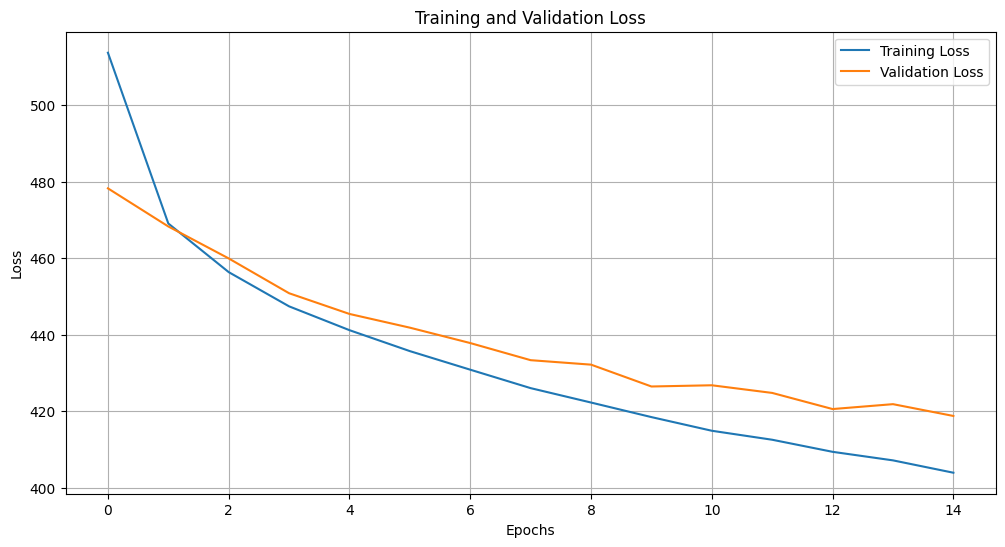

In [209]:
test_neural_network(X, y, 15)

## Метрики начальной модели


* MAE: 16.33
* RMSE: 20.27
* R2 Score: 0.17


# Permutation_importance

In [130]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 632.7106 - val_loss: 477.2280
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 467.7759 - val_loss: 464.9116
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 457.6541 - val_loss: 458.8972
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 451.0669 - val_loss: 454.2145
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 443.3577 - val_loss: 457.3842
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 441.3258 - val_loss: 453.4306
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 439.2213 - val_loss: 449.3193
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 436.0084 - val_loss: 443.6293
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 431.0844 - val_loss: 442.3293
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 425.7090 - val_loss: 442.1307
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/

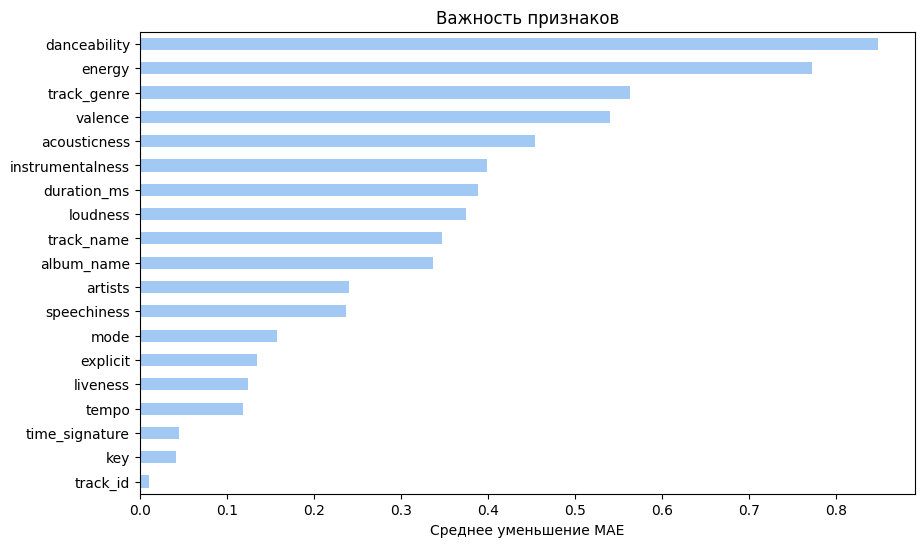

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

По permutation_importance общая картина похожая, много где выводы совпадают

# Добавление новых признаков, удаление ненужных

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  int64  
 1   artists           113999 non-null  int64  
 2   album_name        113999 non-null  int64  
 3   track_name        113999 non-null  int64  
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

## Добавляю новые

In [131]:
df = data.copy()

In [132]:
df['duration_category'] = duration_popularity['duration_category']
df['danceability_category'] = dance_pop['danceability_category']
df['energy_category'] = energy_popularity['energy_category']
df['energy_category'] = energy_popularity['energy_category']
df['is_optimal_danceability_energy'] = danceability_energy['is_optimal_overall']
df['speechiness_category'] = speech_popularity['speechiness_category']
df['acousticness_category'] = ac_popularity['acousticness_category']
df['instrumentalness_category'] = inst_pop['instrumentalness_category']
df['instrumental_balance_ratio'] = data1['coef']
df['instrumental_balance_ratio_category'] = data1['coef_category']
df['liveness_category'] = live_pop['liveness_category']
df['valence_category'] = val_pop['valence_category']
df['mood_score'] = val_impact['mood_score']
df['mood_score_category'] = val_impact['mood_score_category']
df['tempo_category'] = tempo_pop['tempo_category']
df['tempo_energy'] = tempo_pop['total_energy']
df['tempo_energy_category'] = tempo_pop['tempo_energy_category']
df['genre_rate'] = genre_pop['rate']
df['genre_rate_category'] = genre_pop['category']
df['is_popular_artist'] = artists['is_popular_artist']
df['artist_popular_tracks_ratio'] = artists['weighted_popular_tracks_ratio']
df['speech_explicit_interaction'] = speech_exp['speech_explicit_interaction']

Для начала удалю все колонки, на замену которым я преразовал данные в категории
Также оставил в изначальном df несколько фич,которые я создавал на основе одних и тех же данных. Где-то это число, а где-то это категория была. В df1 оставил только категории
Избавился от track_id, artists, album_name, track_name, key. Они не несут смысловой нагрузки, а на основе артистов создана новая фича
Key не показал хоть какой-то полезности как по моему анализу, так и по permutation_importance

In [498]:
df1 = df.copy()
X1 = df1.drop(columns=['popularity', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'key', 'danceability', 'mode', 'loudness', 'speechiness', 'energy' , 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre', 'instrumental_balance_ratio', 'mood_score', 'tempo_energy', 'genre_rate', 'artist_popular_tracks_ratio'])

In [499]:
X1.dtypes

explicit                                 int64
time_signature                           int64
duration_category                        int64
danceability_category                    int64
energy_category                          int64
is_optimal_danceability_energy           int64
speechiness_category                     int64
acousticness_category                    int64
instrumentalness_category                int64
instrumental_balance_ratio_category      int64
liveness_category                        int64
valence_category                         int64
mood_score_category                      int64
tempo_category                           int64
tempo_energy_category                    int64
genre_rate_category                    float64
is_popular_artist                      float64
speech_explicit_interaction              int64
dance_energy_optimality_score          float64
dance_energy_valence_score             float64
instrumental_balance                   float64
intensity    

In [500]:
X1.isna().sum()

explicit                               0
time_signature                         0
duration_category                      0
danceability_category                  0
energy_category                        0
is_optimal_danceability_energy         0
speechiness_category                   0
acousticness_category                  0
instrumentalness_category              0
instrumental_balance_ratio_category    0
liveness_category                      0
valence_category                       0
mood_score_category                    0
tempo_category                         0
tempo_energy_category                  0
genre_rate_category                    0
is_popular_artist                      0
speech_explicit_interaction            0
dance_energy_optimality_score          0
dance_energy_valence_score             0
instrumental_balance                   0
intensity                              0
harmony_score                          0
dance_energy_product                   0
dance_loudness_p

In [502]:
y1 = df1['popularity']

# Тест новой тестовой(без улучшений) модели на предобработанных данных

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 350.8050
Test Loss: 347.7957763671875
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 14.22
RMSE: 18.65
R2 Score: 0.30


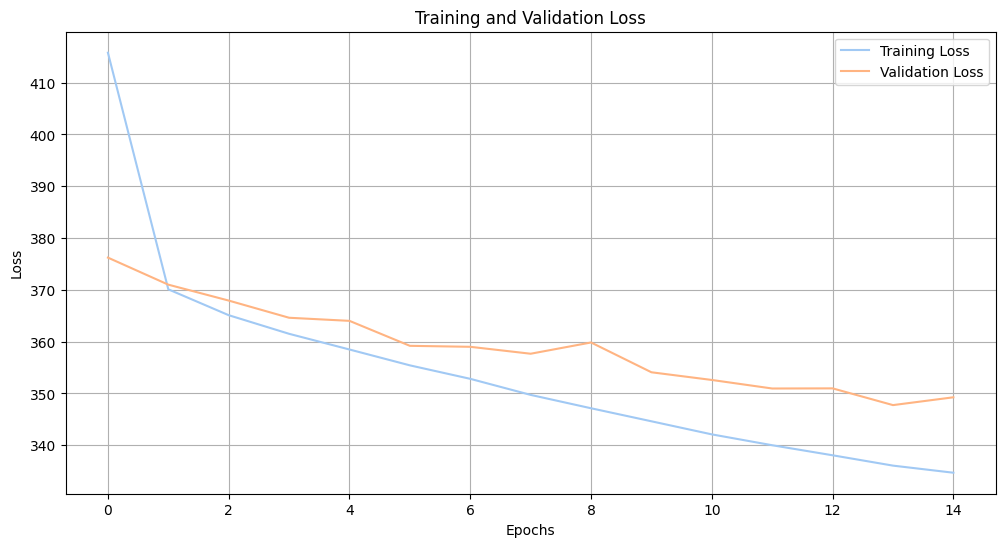

In [503]:
test_neural_network(X1, y1)

Важный момент про permutation importance. Изначально запускал для каждого нового набора параметров, но в один момент kaggle решил убрать все мои выводы :)

В том числе из-за этого где-то будут цифры немного отличаться в выводах по промежуточным тестам. Все переписать заново - огромная работа

Поэтому я модели заново обучу, но perm importance выводить не буду для всех-всех моделей. Они там были, просто выполняются крайне долго. На их основе делал выводы, что лучше убрать из фич. Также не удалось никак скрыть логи для permutation importance, как бы ни пытался

Плачевно :( не думал, что настолько плохо будут работать категории, а они даже ухудшают модель. Но вероятно эти данные могут помочь линейным моделям и деревьям лучше решить задачу

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X1.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

In [133]:
def perm_importance(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Build the model
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
    importances = pd.Series(result.importances_mean, index=X.columns)
    importances.sort_values().plot(kind='barh', figsize=(10,6))
    plt.title('Важность признаков')
    plt.xlabel('Среднее уменьшение MAE')
    plt.show()
    print(importances.sort_values(ascending=False))

Тут наоборот избавлюсь от категорий, оставив числовые признаки

In [504]:
X2 = df.copy()
X2 = X2.drop(columns=['popularity', 'track_id', 'artists', 'album_name', 'track_name', 'duration_ms', 'danceability_category', 'key', 'mode', 'loudness', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category'])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 332.2902
Test Loss: 329.6860656738281
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
MAE: 13.58
RMSE: 18.16
R2 Score: 0.34


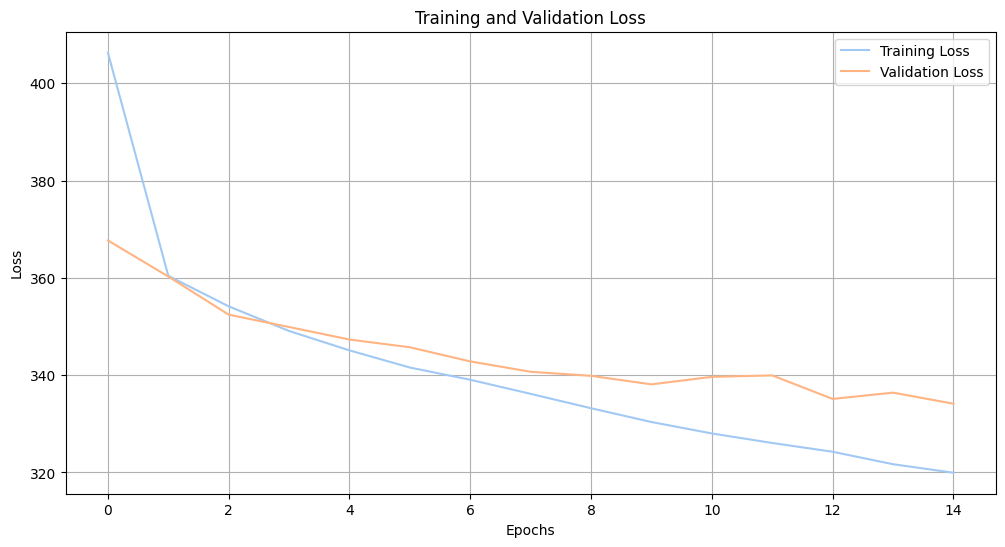

In [505]:
test_neural_network(X2, y)

Уже модель дает метрики чуть лучше, чем изначальная и первая самая с категориями, но результаты все равно не радуют

In [ ]:
perm_importance(X2, y)

1. Созданные фичи по жанрам, артистам показывают себя отлично
2. Можно убрать artist_popular_tracks_ratio и оставить только бинарную переменную is_popular_artist
3. is_optimal_danceability_energy казалось бы была хорошей, но на деле не очень. Можно еще поиграться с объединением этих признаков, и выделить что-то еще на основе danceability, energy
4. От time_signature можно отказаться

Тут уберу признаки, которые не показали себя с хорошей стороны

In [506]:
X3 = df.copy()
X3 = X3.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score'])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 338.0804
Test Loss: 332.93560791015625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step
MAE: 13.68
RMSE: 18.25
R2 Score: 0.33


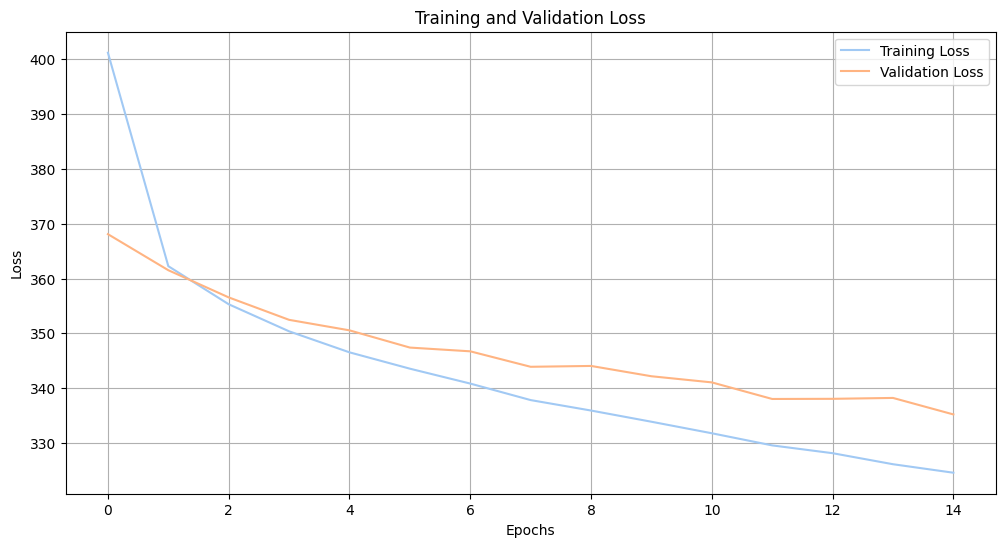

In [507]:
test_neural_network(X3, y)

Незначительные улучшения на сотые доли

In [ ]:
perm_importance(X3, y)

## Доработка признаков

Признак бинарный оптимальности танцевальности и энергии для слушателя не оправдал ожидания, поэтому добавляю новый и экспериментирую с ним. Тут стремимся приблизиться к целевому показателю в 0.6

In [135]:
df['dance_energy_optimality_score'] = (
    (df['danceability'] - 0.6) ** 2 +
    (df['energy'] - 0.6) ** 2
)

Замена признаку mood_score, но с измененными весами

In [136]:
df['dance_energy_valence_score'] = (
    0.3 * df['danceability'] +
    0.2 * df['energy'] +
    0.5 * df['valence']
)

Меняю instrumental balance ratio. Теперь и этот признак будет учитывать веса, так как acousticness больше всего влияет на popularity

In [137]:
df['instrumental_balance_ratio'] = df['acousticness'] * 0.5 + df['instrumentalness'] * 0.3 - df['speechiness'] * 0.2

Оставим и признак без веса

In [138]:
df['instrumental_balance'] = (
    df['instrumentalness'] * (1 - df['speechiness']) * df['acousticness']
)

Интенсивность трека. Объединим танцевальность, энергетику и темп в один признак

In [139]:
df['intensity'] = 0.3 * data['energy'] + 0.5 * data['danceability'] + 0.2 * data['tempo']

Если трек акустичен и у него высокая валентность(показатель настроения), то трек может быть более гармоничным

In [140]:
df['harmony_score'] = df['valence'] * df['acousticness']

Объединенные признаки с танцевальностью. Отдельный признак с энергетикой и громкостью(громкость особо нигде не использовалась)

In [141]:
df['dance_energy_product'] = df['danceability'] * df['energy']

In [142]:
df['dance_loudness_product'] = df['danceability'] * df['loudness']

In [221]:
X4 = df.copy()
X4 = X4.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score', 'duration_ms', 'track_name', 'liveness'])

In [222]:
X4.dtypes

album_name                          int64
explicit                            int64
danceability                      float64
energy                            float64
loudness                          float64
speechiness                       float64
acousticness                      float64
instrumentalness                  float64
valence                           float64
tempo                             float64
duration_category                   int64
is_optimal_danceability_energy      int64
instrumental_balance_ratio        float64
genre_rate                        float64
is_popular_artist                 float64
dance_energy_optimality_score     float64
dance_energy_valence_score        float64
instrumental_balance              float64
intensity                         float64
harmony_score                     float64
dance_energy_product              float64
dance_loudness_product            float64
dtype: object

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 347.3232
Test Loss: 341.984619140625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step
MAE: 13.85
RMSE: 18.49
R2 Score: 0.31


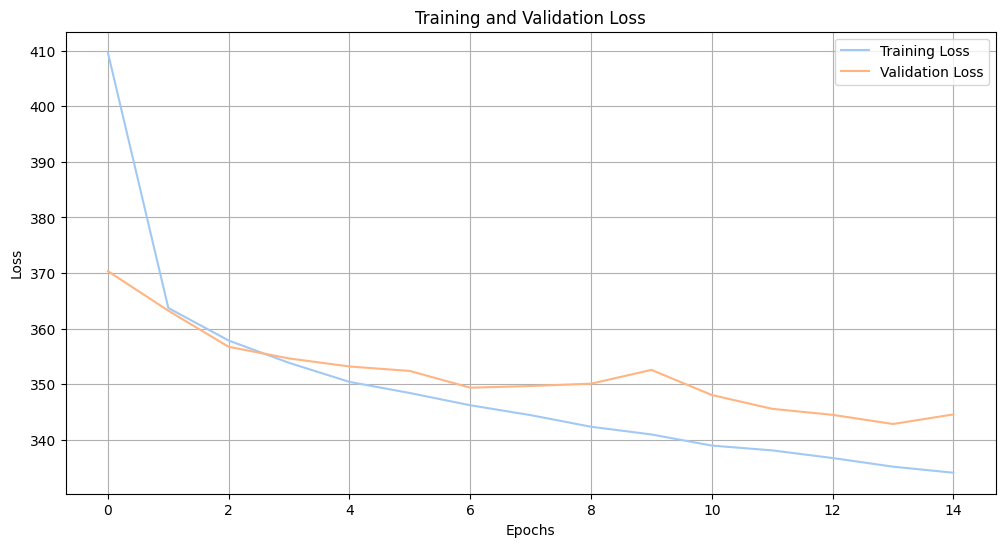

In [508]:
test_neural_network(X4, y)

In [ ]:
perm_importance(X4, y)

Убираем признаки, которые не очень себя показали

In [509]:
X5 = df.copy()
X5 = X5.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score', 'duration_ms', 'track_name', 'album_name', 'instrumental_balance', 'is_optimal_danceability_energy', 'speechiness'])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 345.0445
Test Loss: 340.451904296875
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step
MAE: 13.80
RMSE: 18.45
R2 Score: 0.31


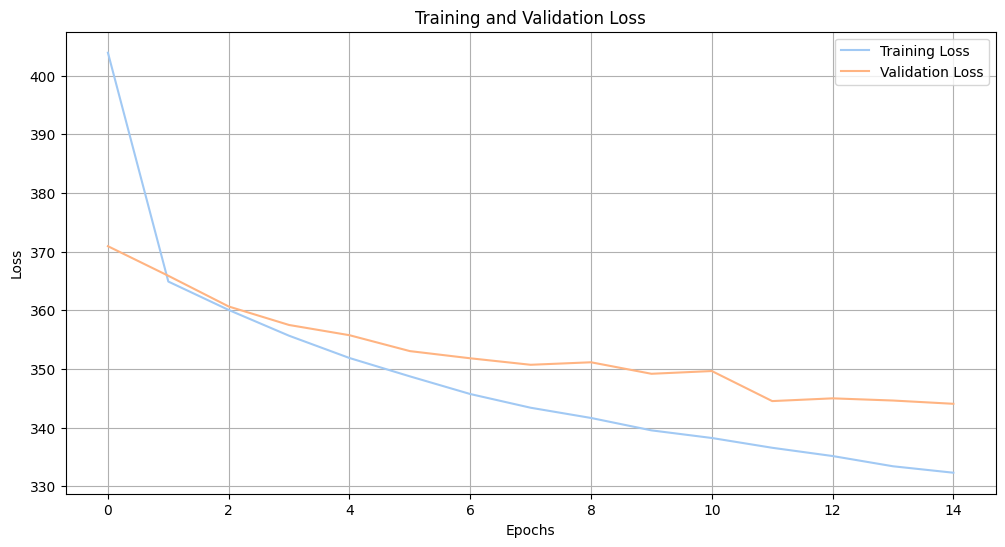

In [510]:
test_neural_network(X5, y)

In [ ]:
perm_importance(X5, y)

## Еще новые признаки

Опишу новые идеи тут
1. median_duration, обычная duration не может так хорошо описывать данные, как какая-то относительная величина. Поделим общую продолжительность трека на медианную по этому параметру
2. Соединим explicit + danceability + energy, к хорошей комбинации танцевальности и энергии добавим и explicit теперь. Возможно, что в танцевальных песнях бывает откровенный контент чаще
3. Баланс танцевальности и энергии. Бинарный признак, что данные в этих колонках лежат в середине диапазона, ведь именно от 0.4 до 0.8 треки были популярнее других
4. Нормализуем громкость, она в целом была не бесполезным признаком, но теперь нормализуем относительно максимальной по колонке
5. Песни с быстрым темпом резко снижают свою популярность по графику. Бинарный признак для того, чтобы определять, очень быстрый или нет темп в песне

In [143]:
median_duration = data['duration_ms'].median()
df['duration_relative_to_median'] = df['duration_ms'] / median_duration

In [144]:
df['explicit_dance_energy'] = df['explicit'] * df['danceability'] * df['energy']

In [145]:
df['dance_energy_balance'] = ((df['danceability'] >= 0.4) & (df['danceability'] <= 0.8) & 
                                (df['energy'] >= 0.4) & (df['energy'] <= 0.8)).astype(int)

In [146]:
df['normalized_loudness'] = df['loudness'] / df['loudness'].max()

In [147]:
df['is_fast_tempo'] = (df['tempo'] > 170).astype(int)

In [511]:
X6 = df.copy()
X6 = X6.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score', 'duration_ms', 'track_name', 'album_name', 'instrumental_balance', 'is_optimal_danceability_energy', 'speechiness'])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 342.9669
Test Loss: 338.794189453125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.78
RMSE: 18.41
R2 Score: 0.32


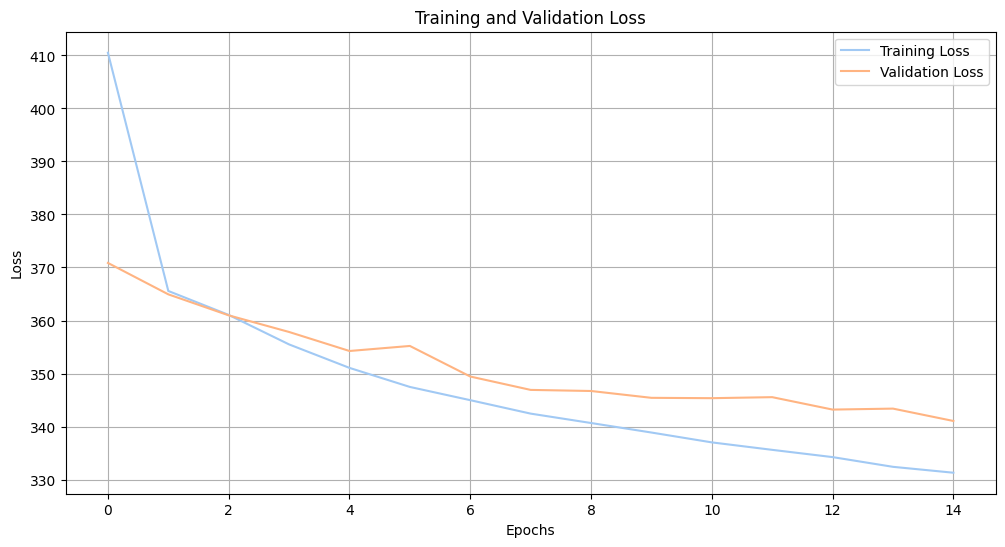

In [512]:
test_neural_network(X6, y)

In [ ]:
perm_importance(X6, y)

## И еще заход с новыми фичами

Тут на основе выводов из аналитики я составил еще параметры, которые отражают пороговые значения переменных, по которым было заметно, что популярность начинает изменяться.

Так, громкие треки - более популярны

Треки с высокой speechiness резко становятся менее популярны

Acousticness должна быть ниже среднего, чтобы трек был популярнее

С высокой инструментальностью треки теряют в популярности

А валентность должна быть средней, чтобы трек был популярнее. Параметр важный, но мне пока не удалось благодаря нему построить хорошую дополнительную фичу

Уберем параллельно те признаки, которые по perm importance не дали хорошего результата

In [148]:
df['is_loud'] = (df['loudness'] > df['loudness'].mean()).astype(int)

In [149]:
df['is_in_speech_optimal_zone'] = (df['speechiness'] < 0.6).astype(int)

In [150]:
df['is_acoustic_optimal'] = (df['acousticness'] <= 0.6).astype(int)

In [151]:
df['is_instrumental_high'] = (df['instrumentalness'] > 0.6).astype(int)

In [152]:
df['is_valence_optimal'] = ((df['valence'] > 0.3) & (df['valence'] < 0.7)).astype(int)

In [513]:
X7 = df.copy()
X7 = X7.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score', 'duration_ms', 'track_name', 'album_name', 'instrumental_balance', 'is_optimal_danceability_energy', 'speechiness'])

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 340.9272
Test Loss: 338.4728088378906
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.78
RMSE: 18.40
R2 Score: 0.32


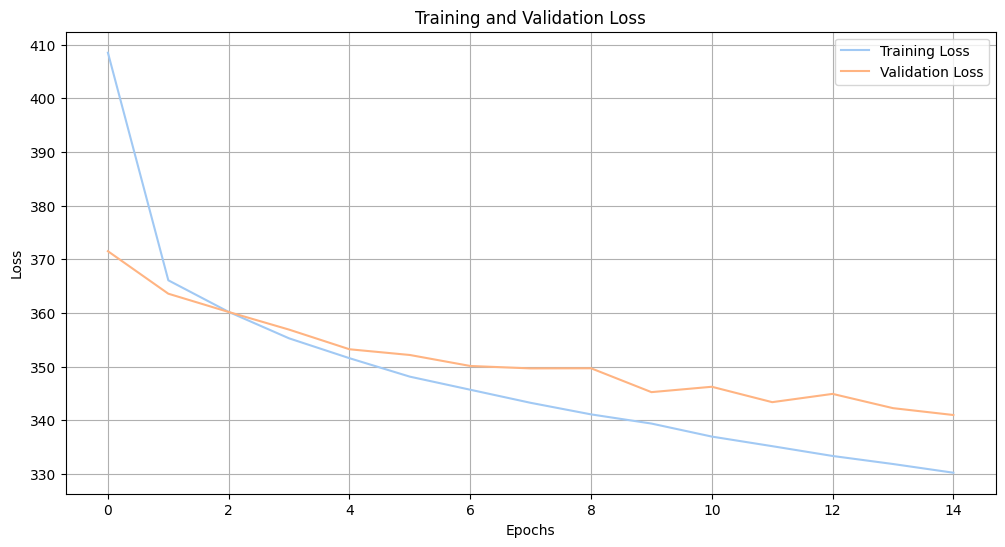

In [514]:
test_neural_network(X7, y)

Пока с каждым разом все хуже и хуже, метрики падают при создании новых фич, даже если я и стараюсь убирать ненужные

In [ ]:
perm_importance(X7, y)

In [153]:
X8 = df.copy()
X8 = X8.drop(columns=['popularity', 'track_id', 'artists', 'danceability_category', 'key', 'mode', 'speechiness_category', 'energy_category' , 'acousticness_category', 'instrumentalness_category', 'liveness_category', 'valence_category', 'track_genre', 'instrumental_balance_ratio_category', 'mood_score_category', 'tempo_energy_category', 'genre_rate_category', 'time_signature', 'artist_popular_tracks_ratio', 'tempo_category', 'tempo_energy', 'speech_explicit_interaction', 'mood_score', 'duration_ms', 'track_name', 'instrumental_balance', 'is_optimal_danceability_energy', 'speechiness', 'is_in_speech_optimal_zone', 'is_fast_tempo', 'duration_relative_to_median', 'explicit_dance_energy', 'intensity', 'is_valence_optimal', 'loudness', 'normalized_loudness', 'dance_energy_balance'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 344.0196
Test Loss: 340.72393798828125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.82
RMSE: 18.46
R2 Score: 0.31


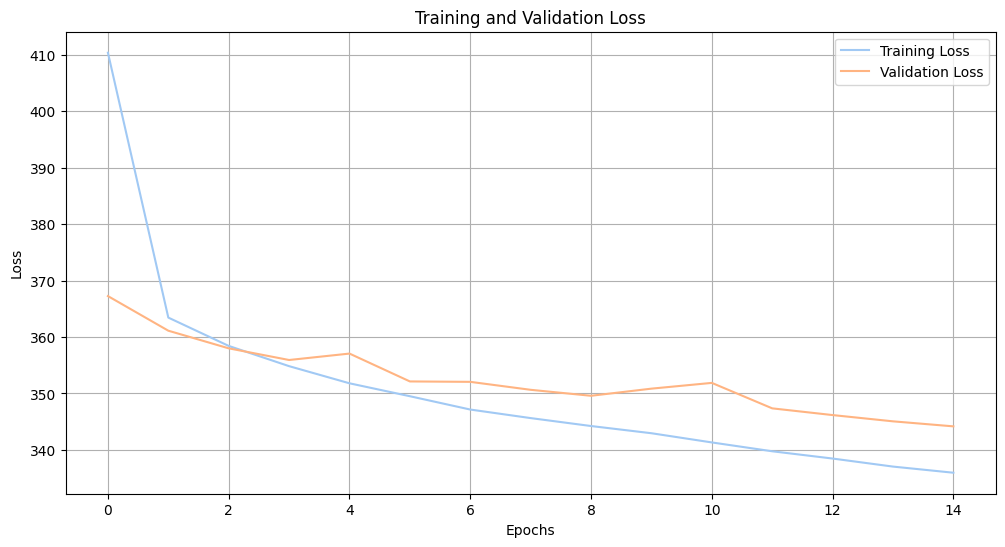

In [154]:
test_neural_network(X8, y)

In [ ]:
perm_importance(X8, y)

## Финальная версия признаков

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 319.6554
Test Loss: 318.69049072265625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.35
RMSE: 17.85
R2 Score: 0.36


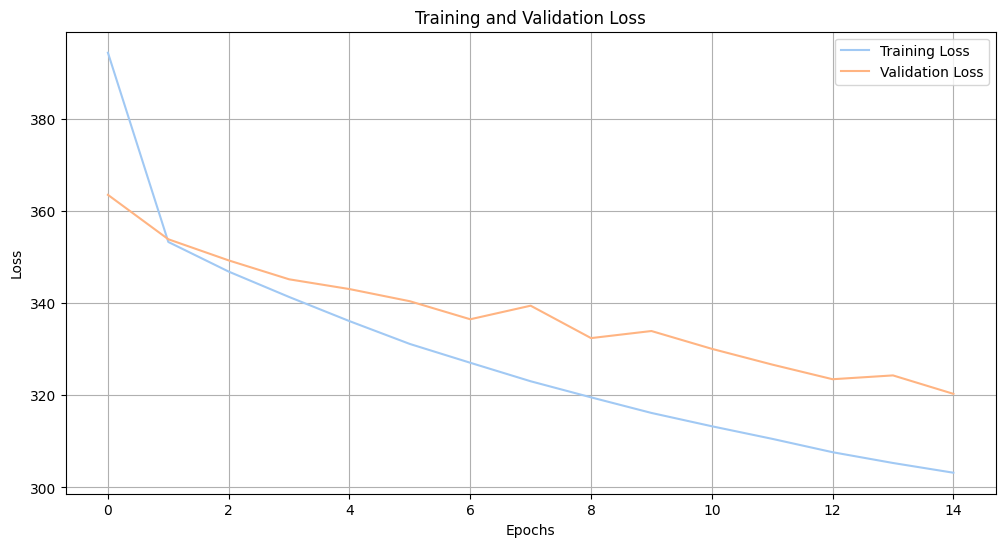

In [155]:
all = df.copy()
all = all.drop(columns='popularity')
test_neural_network(all, y)

In [ ]:
perm_importance(all, y)

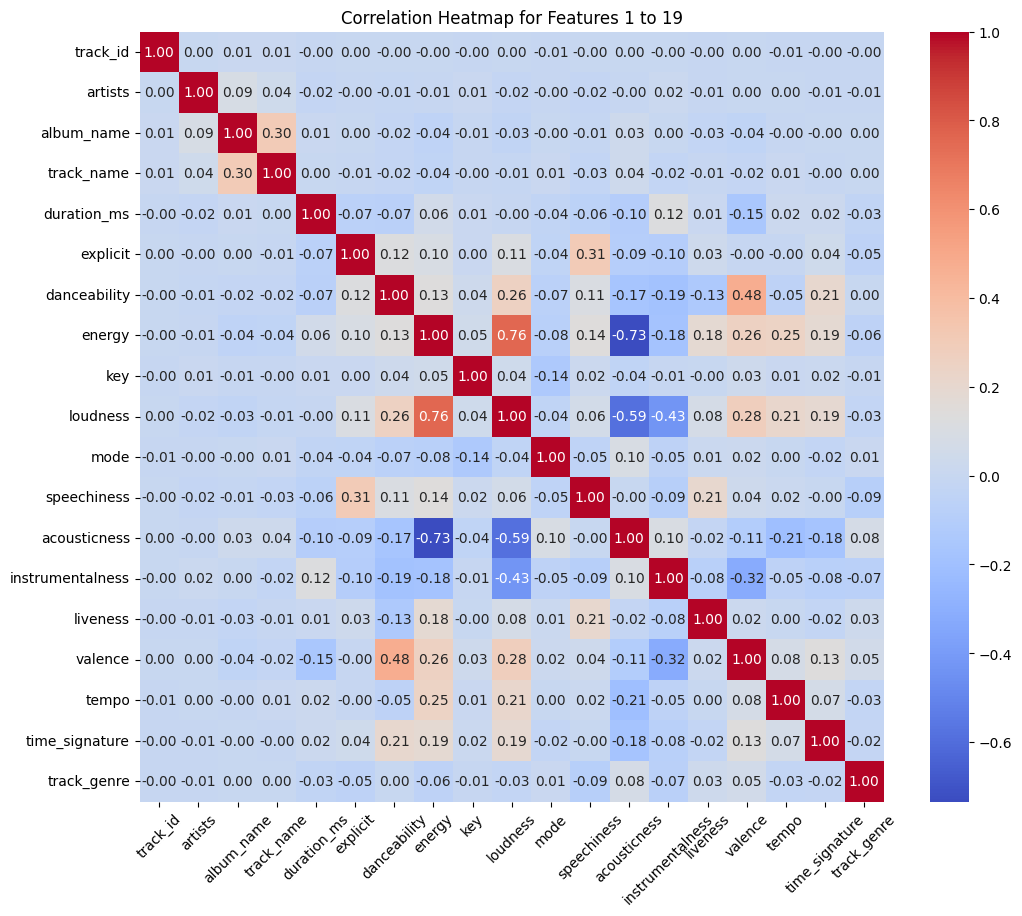

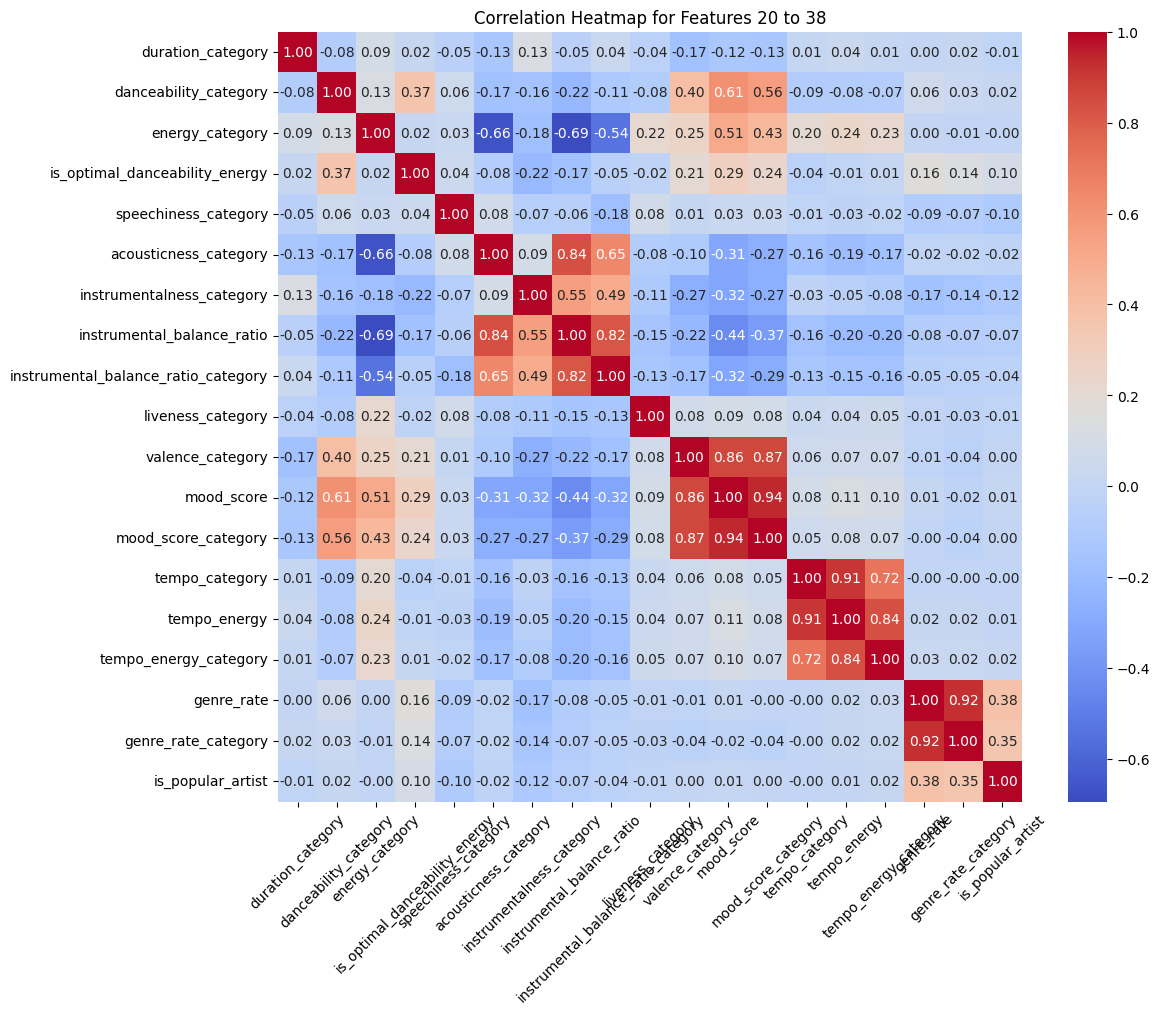

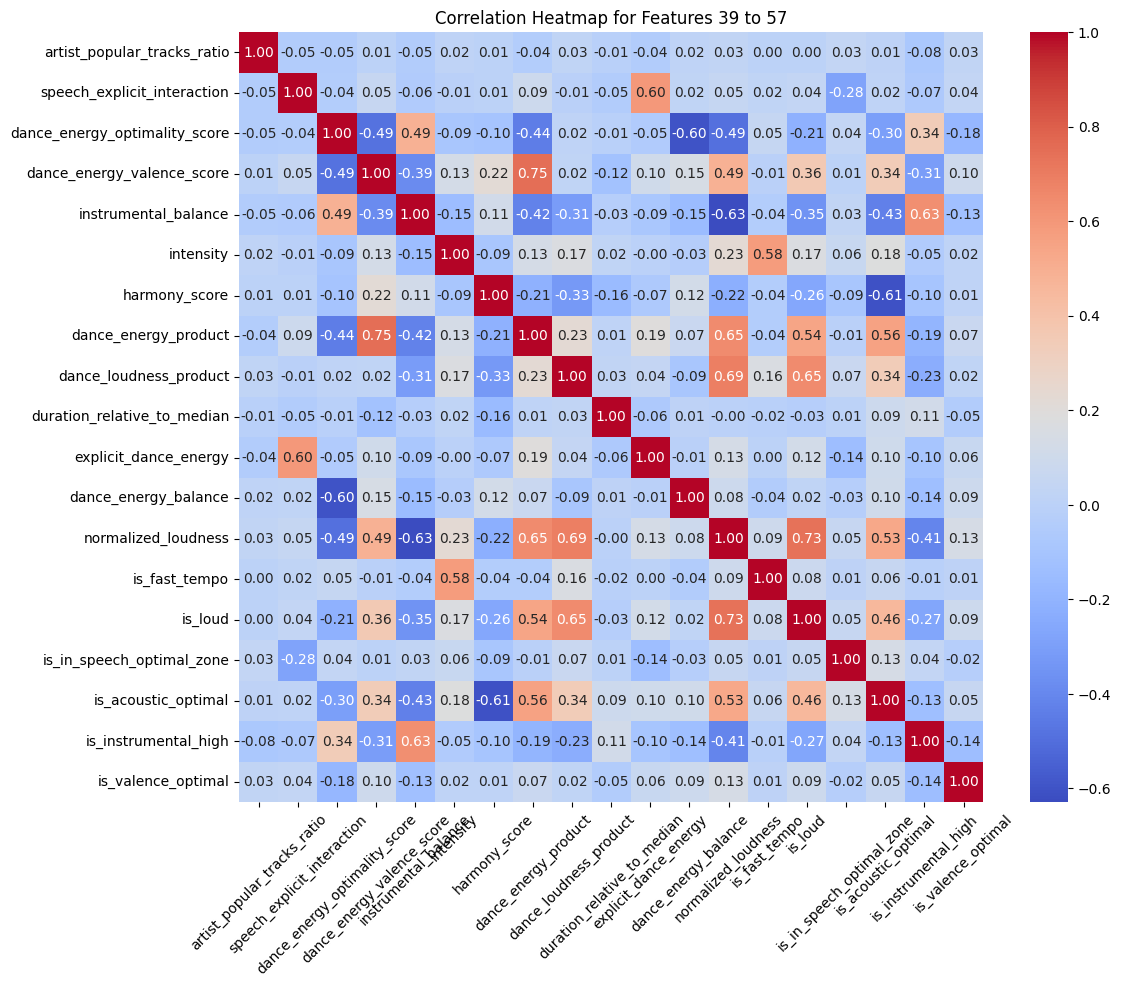

In [474]:
total = len(all.columns)
start_indices = [0, total // 3, 2 * (total // 3)]
end_indices = [total // 3, 2 * (total // 3), total]

for i in range(3):
    start = start_indices[i]
    end = end_indices[i]
    subset_df = all.iloc[:, start:end] 
    correlation_matrix = subset_df.corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for Features {start + 1} to {end}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

Выше я сравнивал все собранные признаки по своей полезности и корреляции между собой. Теперь хочу убрать те, что сильно коррелируют друг с другом, и малозначимые для модели по permutation importance

Создадим список корреляции, чтобы в дальнейшем отбросить сильно коррелирующие признаки

In [280]:
correlation_matrix = all.corr()
correlation_pairs = correlation_matrix.unstack()
filtered_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]
sorted_pairs = filtered_pairs.sort_values(ascending=False)
sorted_pairs

normalized_loudness         loudness                       1.000000
loudness                    normalized_loudness            1.000000
dance_energy_valence_score  mood_score                     1.000000
mood_score                  dance_energy_valence_score     1.000000
duration_ms                 duration_relative_to_median    1.000000
                                                             ...   
is_acoustic_optimal         instrumental_balance_ratio    -0.784124
acousticness                is_acoustic_optimal           -0.872911
is_acoustic_optimal         acousticness                  -0.872911
                            acousticness_category         -0.910798
acousticness_category       is_acoustic_optimal           -0.910798
Length: 3192, dtype: float64

Отбрасываю слабые параметры по permutation importance а также сильно коррелирующие между собой. Некоторые признаки я все же оставлю, даже если изначально не хотел, ведь по permutation importance все примерно одинаковое. Выше уже проведено много экспериментов с данными, поэтому мои большие усилия по настройке и урезанию всего, чего можно не приводят уже к лучшим результатам модели

In [156]:
features_to_drop = ['normalized_loudness', 'duration_ms', 'tempo', 'intensity', 
                    'instrumentalness', 'energy', 'acousticness', 'explicit', 
                    'mood_score', 'valence', 'genre_rate_category', 
                    'danceability_category', 'speech_explicit_interaction', 
                    'instrumental_balance_ratio', 'tempo_category', 
                    'instrumentalness_category', 'dance_energy_valence_score', 
                    'key', 'is_fast_tempo', 'track_id', 'time_signature', 'speechiness_category', 
                    'duration_relative_to_median', 'liveness']
X_final = df.copy()
X_final = X_final.drop(columns=features_to_drop)

In [157]:
X_final.dtypes

artists                                  int64
album_name                               int64
track_name                               int64
popularity                               int64
danceability                           float64
loudness                               float64
mode                                     int64
speechiness                            float64
track_genre                              int64
duration_category                        int64
energy_category                          int64
is_optimal_danceability_energy           int64
acousticness_category                    int64
instrumental_balance_ratio_category      int64
liveness_category                        int64
valence_category                         int64
mood_score_category                      int64
tempo_energy                           float64
tempo_energy_category                    int64
genre_rate                             float64
is_popular_artist                      float64
artist_popula

In [158]:
y = X_final['popularity']
X_final = X_final.drop(columns='popularity')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 320.2975
Test Loss: 318.8103332519531
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.44
RMSE: 17.86
R2 Score: 0.36


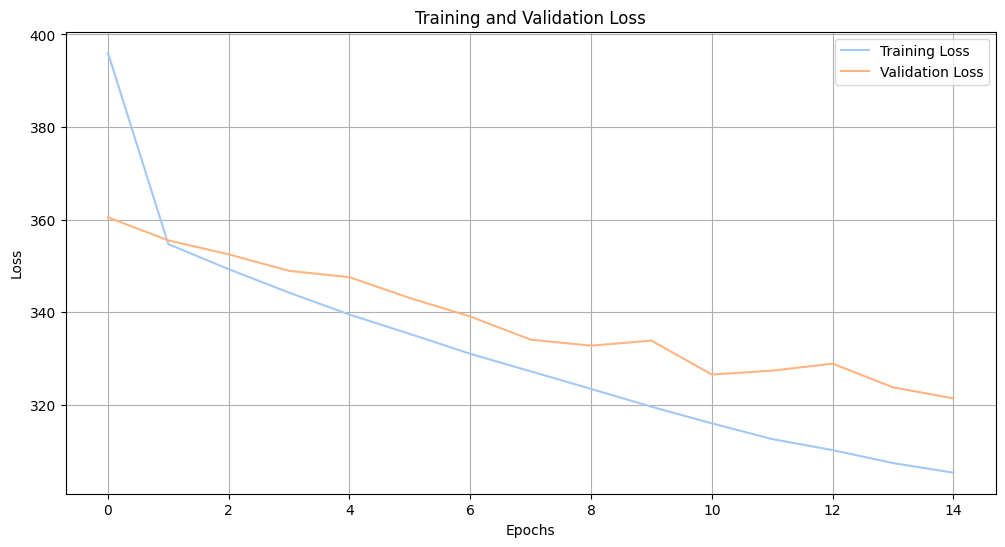

In [159]:
test_neural_network(X_final, y)

На этих данных удалось добиться лучшего результата среди всех протестированных наборов фич, хотя приблизительно у всех значения похожие

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 506.6644 - val_loss: 359.0913
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 358.5682 - val_loss: 355.4840
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 349.9108 - val_loss: 349.6924
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 342.1534 - val_loss: 348.0713
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 340.8439 - val_loss: 341.6221
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 336.5827 - val_loss: 341.3461
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 328.5696 - val_loss: 338.7088
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 326.6917 - val_loss: 334.6188
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 322.8232 - val_loss: 334.9733
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 318.5862 - val_loss: 331.2849
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 961u

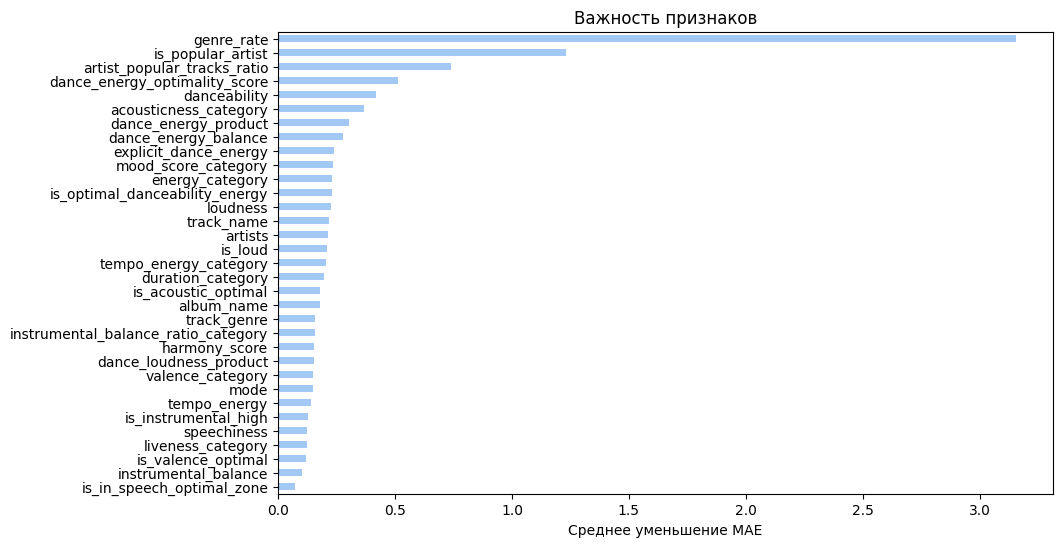

genre_rate                             3.154583
is_popular_artist                      1.230051
artist_popular_tracks_ratio            0.740676
dance_energy_optimality_score          0.514567
danceability                           0.420573
acousticness_category                  0.369541
dance_energy_product                   0.305246
dance_energy_balance                   0.279050
explicit_dance_energy                  0.239493
mood_score_category                    0.234429
energy_category                        0.232523
is_optimal_danceability_energy         0.229319
loudness                               0.227214
track_name                             0.218076
artists                                0.213552
is_loud                                0.207599
tempo_energy_category                  0.204915
duration_category                      0.198483
is_acoustic_optimal                    0.180652
album_name                             0.178701
track_genre                            0

In [494]:
perm_importance(X_final, y)

Еще раз тестируем модель после того, как я поменял функцию и добавил график изменяемости loss при обучении модели, также добавил параметр эпох, чтобы лучше посмотреть, как обучается модель

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 302.1723
Test Loss: 301.8329162597656
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 13.04
RMSE: 17.37
R2 Score: 0.39


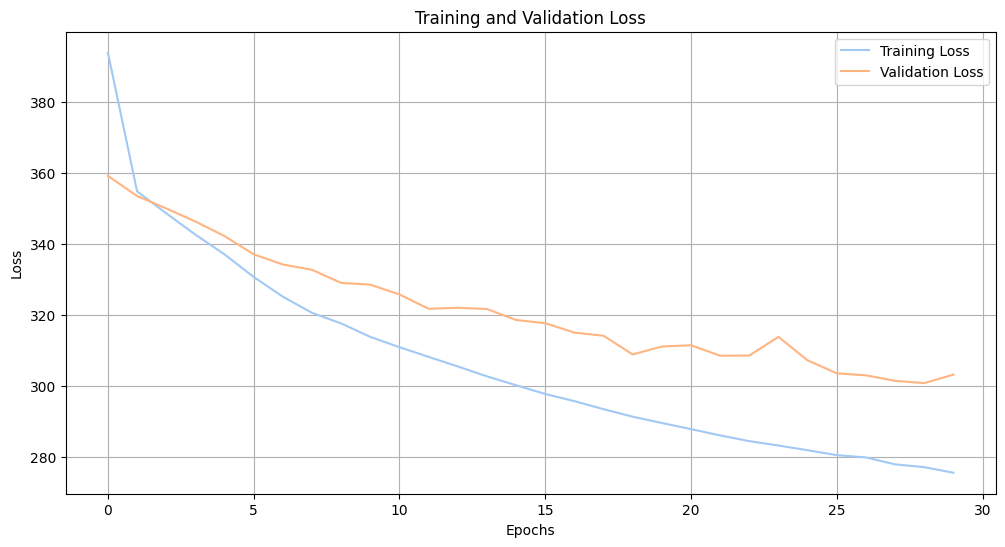

In [160]:
test_neural_network(X_final, y, 30)

Модель неплохо обучается, даже на валидационной выборке данные, хоть и с небольшими скачками, но ошибки снижаются. Также при количестве эпох = 30 модель уже показывает лучшие результаты по метрикам

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 294.6059
Test Loss: 292.4911804199219
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 12.70
RMSE: 17.10
R2 Score: 0.41


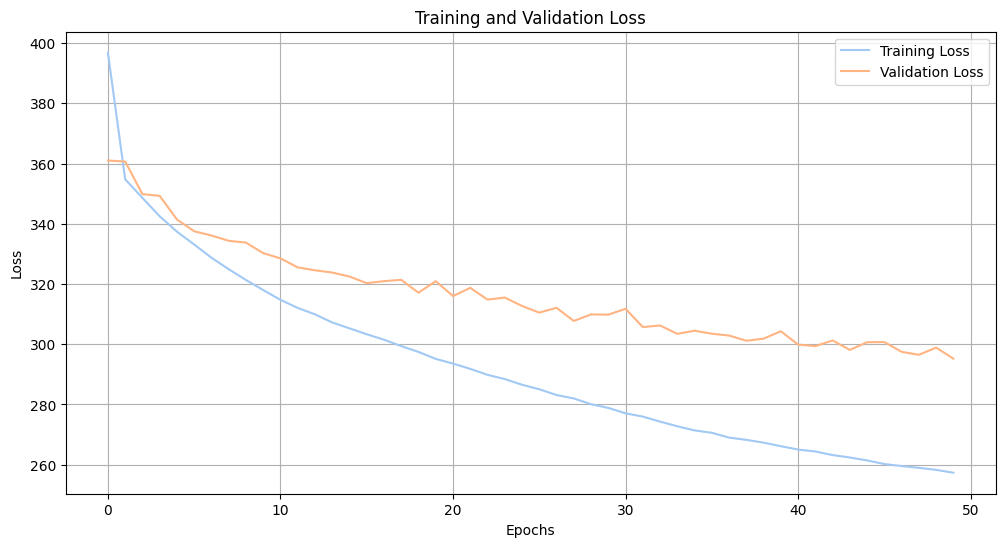

In [161]:
test_neural_network(X_final, y, 50)

При количестве эпох = 50 модель уже заметно, что не улучшает показатели на валидационной выборке

# Эксперименты с моделями и улучшения

## Нейронные сети

### Функция для тестирования новых нейронных сетей

In [162]:
def test_new_network(model, X, y, epochs=15, batch=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch,
        validation_split=0.2,
        verbose=0
    )
    
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss}")
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

### Параметры лучшего подбора фич на разных эпохах

15 эпох:
* MAE: 13.33
* RMSE: 17.71
* R2 Score: 0.37

30 эпох:
* MAE: 12.86
* RMSE: 17.28
* R2 Score: 0.40

50 эпох:

* MAE: 12.64
* RMSE: 17.09
* R2 Score: 0.41

Постепенно буду менять параметры модели, смотря на то, как это отразится на результате. Первым делом, все-таки данные не самые простые, их много, добавим побольше нейронов в модель. 1 входной, 2 скрытых, 1 выходной

In [163]:
model1 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model1.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 281.01873779296875
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 12.21
RMSE: 16.76
R2 Score: 0.43


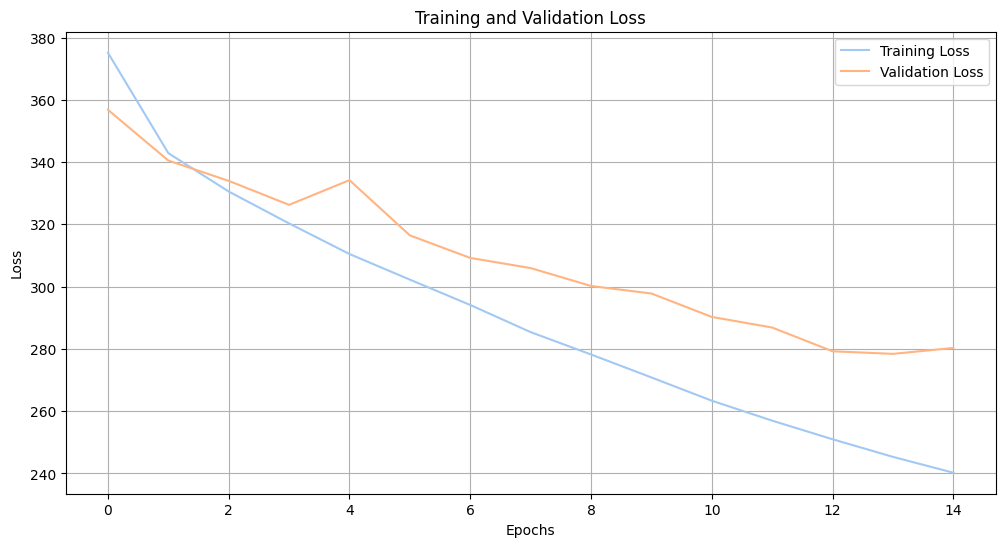

In [164]:
test_new_network(model1, X_final, y)

Модель уже неплохо справляется и улучшила свои метрики

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 272.24639892578125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.88
RMSE: 16.50
R2 Score: 0.45


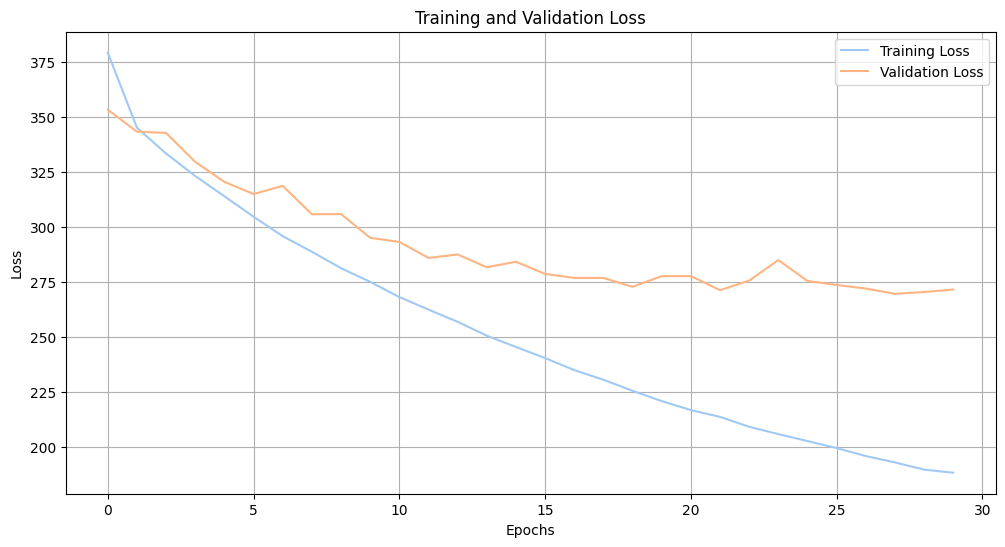

In [165]:
model1_30 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model1_30.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model1_30, X_final, y, 30)

Но на 30 эпохах модель уже стагнирует после 15 эпохи и не так сильно снижает val_loss. А где-то он и растет

На входном слое попробую 256 нейронов

In [166]:
model2 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model2.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 272.0396423339844
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.97
RMSE: 16.49
R2 Score: 0.45


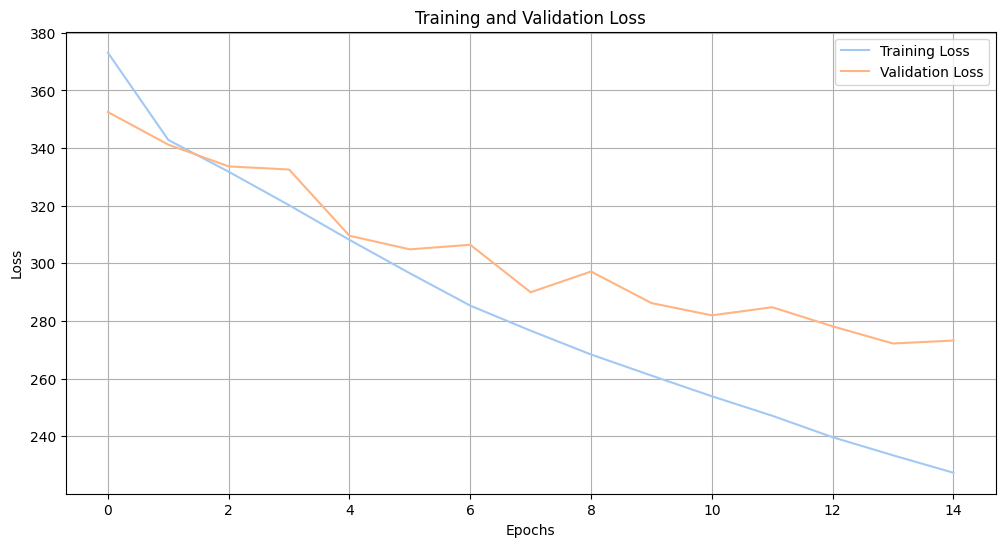

In [167]:
test_new_network(model2, X_final, y, 15)

Увеличил входной слой до 256 нейронов, результаты по метрикам стали получше. Сейчас 30 эпох

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 262.42156982421875
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.53
RMSE: 16.20
R2 Score: 0.47


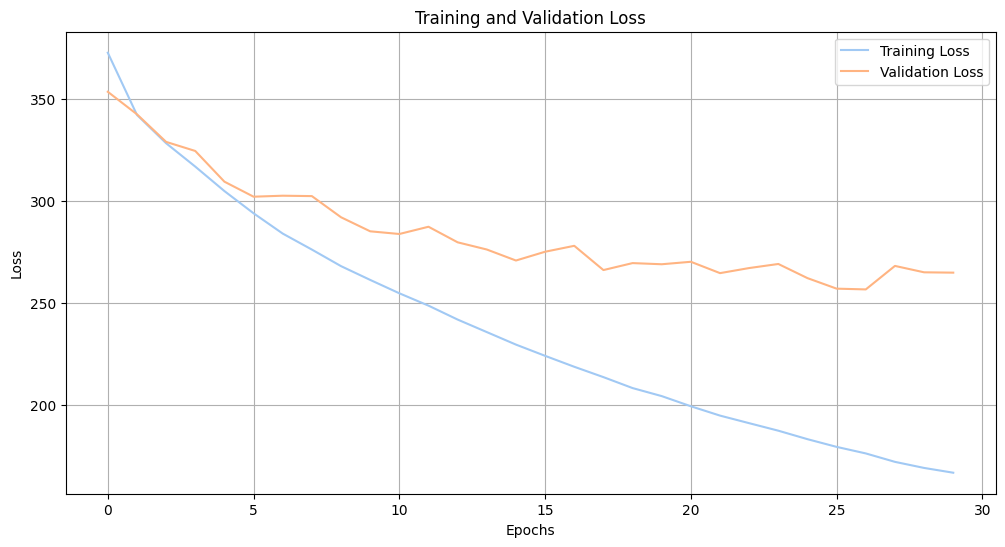

In [168]:
model2_30 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model2_30.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model2_30, X_final, y, 30)

Тут как будто модель уже переобучается, метрики лучше, хоть и не сильно

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 260.1629943847656
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.56
RMSE: 16.13
R2 Score: 0.48


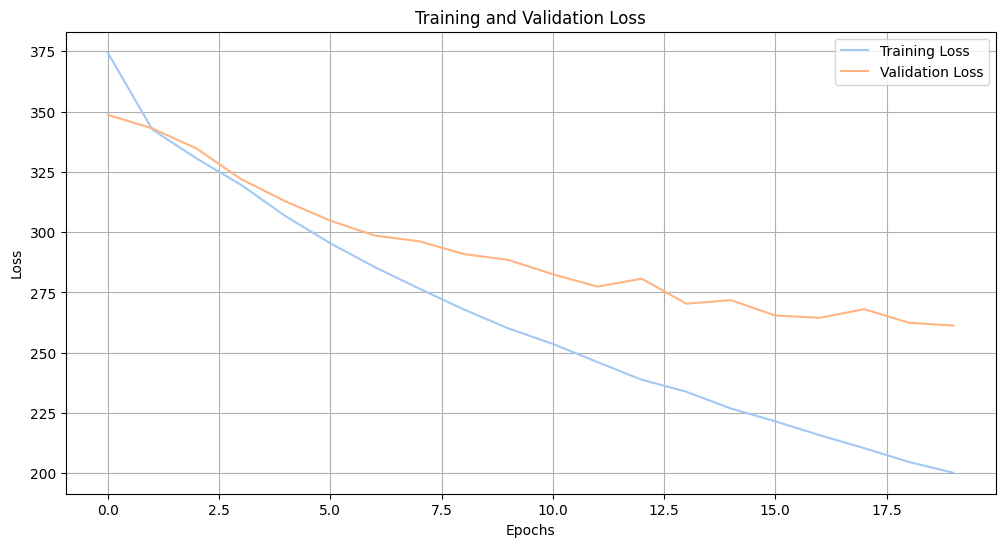

In [169]:
model2_20 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model2_20.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model2_20, X_final, y, 20)

Протестировал теперь и на 20 эпохах. Результаты по метрикам хуже, чем на 30 эпохах и примерно такие же, как и на 15. Причем на 20 видна чуть меньшая разница между loss на обучающей и валидационной выборке, что говорит о меньшей переобучаемости

Вместо входного слоя на 256(сейчас он будет 128) добавим в модель еще скрытый слой для глубины и посмотрим на результаты

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 277.14739990234375
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.87
RMSE: 16.65
R2 Score: 0.44


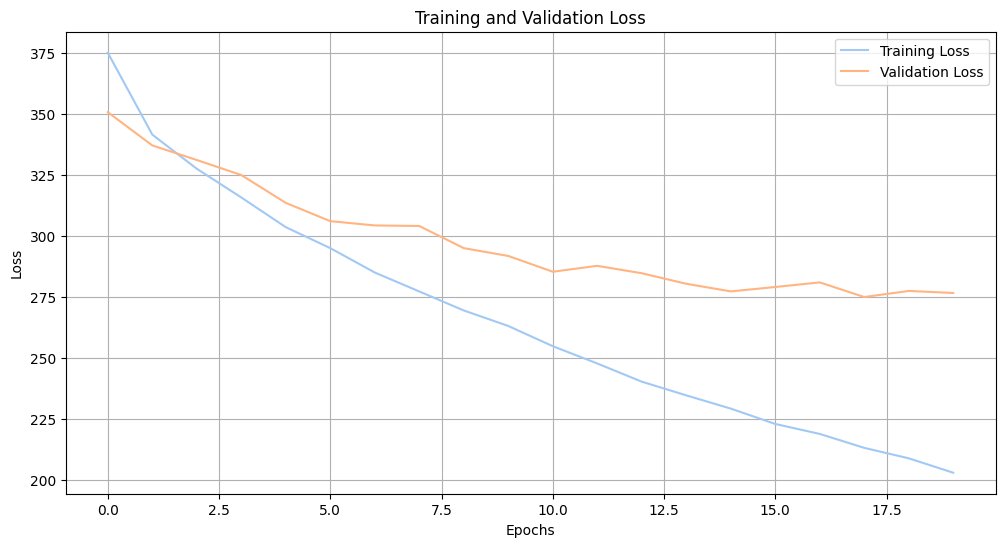

In [170]:
model3_20 = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model3_20.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model3_20, X_final, y, 20)

Модель с такой структурой показала себя хуже, что по графику(разрыв между тестовой и валидационной больше), что по метрикам

Добавим dropout слои в модель, при этом увеличим кол-во эпох, так как переобучения на меньшем числе и не было

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 272.7382507324219
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.96
RMSE: 16.51
R2 Score: 0.45


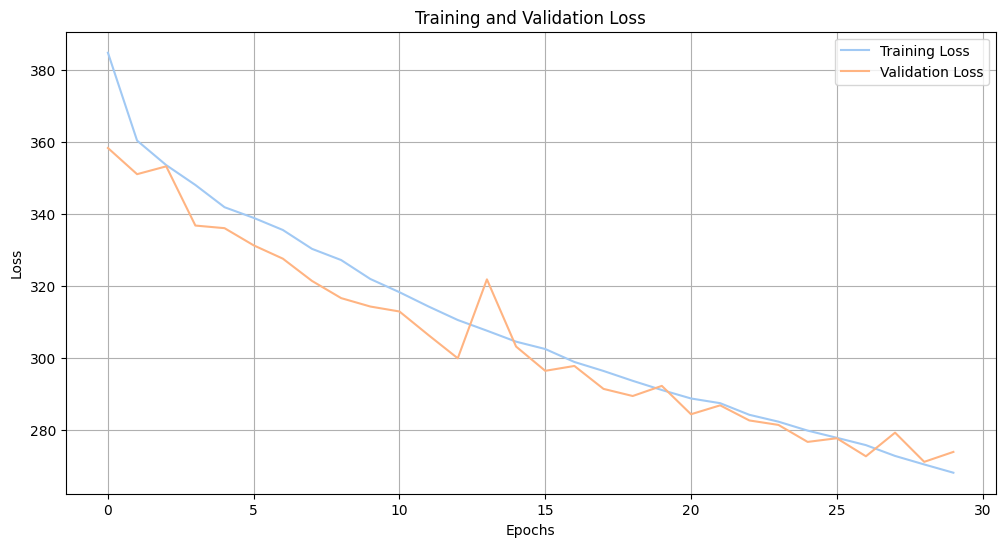

In [171]:
model4_30 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_30.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_30, X_final, y, 30)

Данная модель показывает пока лучшие метрики. На графике видно, что val loss снижается в целом более плавно, но с небольшими скачками при этом.

Попробую еще взять побольше эпох

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 248.51048278808594
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.30
RMSE: 15.76
R2 Score: 0.50


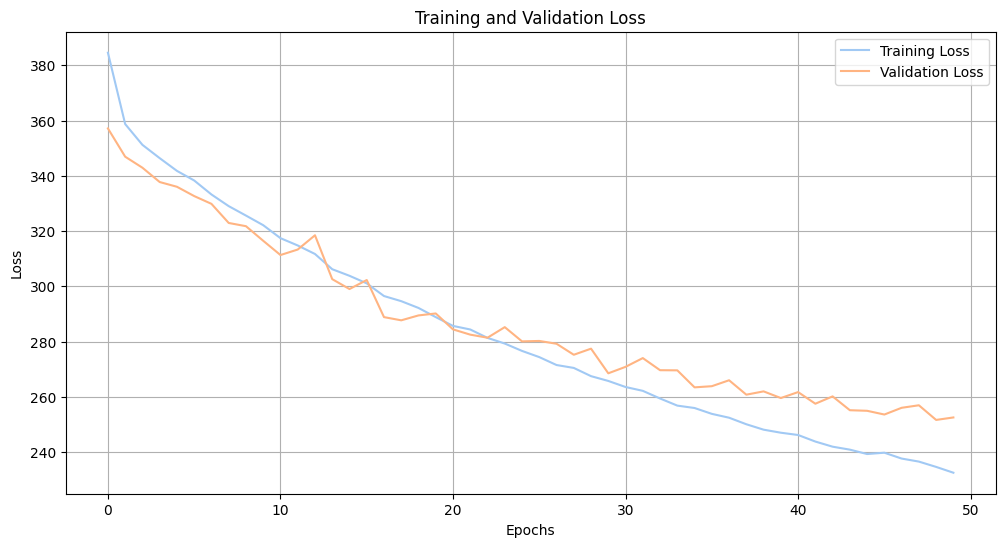

In [172]:
model4_50 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_50.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_50, X_final, y, 50)

На 50 эпохах модель показала больший прирост в метриках(чем было обычно). График в целом адекватный. Но теперь видно, что при приближении к 50 он начинает ухудшать обучаемость

Поэтому для последнего эксперимента с эпохами поставлю 40

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 262.8938903808594
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.79
RMSE: 16.21
R2 Score: 0.47


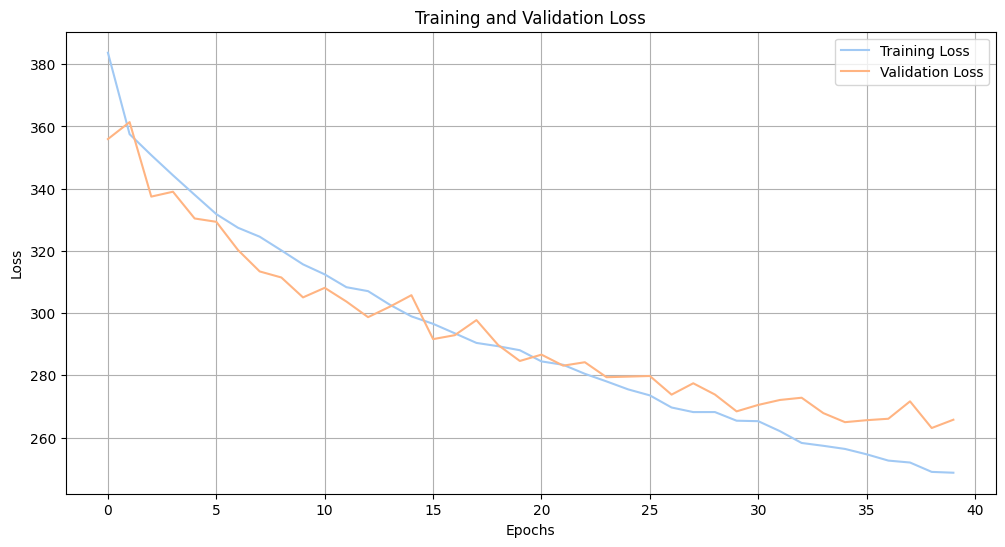

In [173]:
model4_40 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_40.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_40, X_final, y, 40)

Метрики дали чуть худший результат, чем на 50 эпохах, но при этом мене видно стагнацию модели ближе к 50 эпохе, которая была ранее. Это относительно оптимальное время остановки обучения

Хочу попробовать увеличить размер батча, вдруг будут улучшения

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 258.5233459472656
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.57
RMSE: 16.08
R2 Score: 0.48


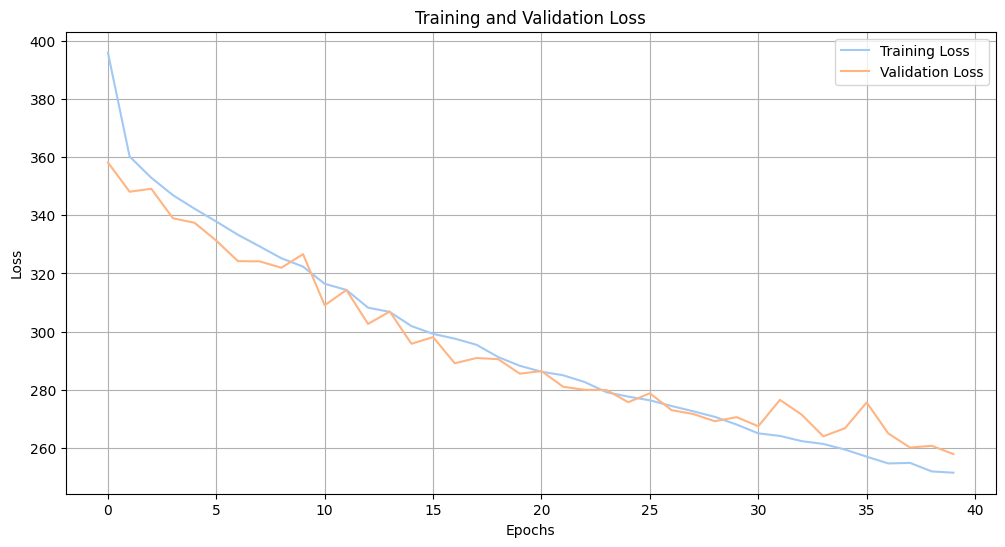

In [174]:
model4_40_64 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_40_64.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_40_64, X_final, y, epochs=40, batch=64)

При увеличении батча до 64 модель стала показывать более хорошие метрики, но при первом запуске было наоборот. Поэтому в последующих батч = 32

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 246.45657348632812
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.16
RMSE: 15.70
R2 Score: 0.50


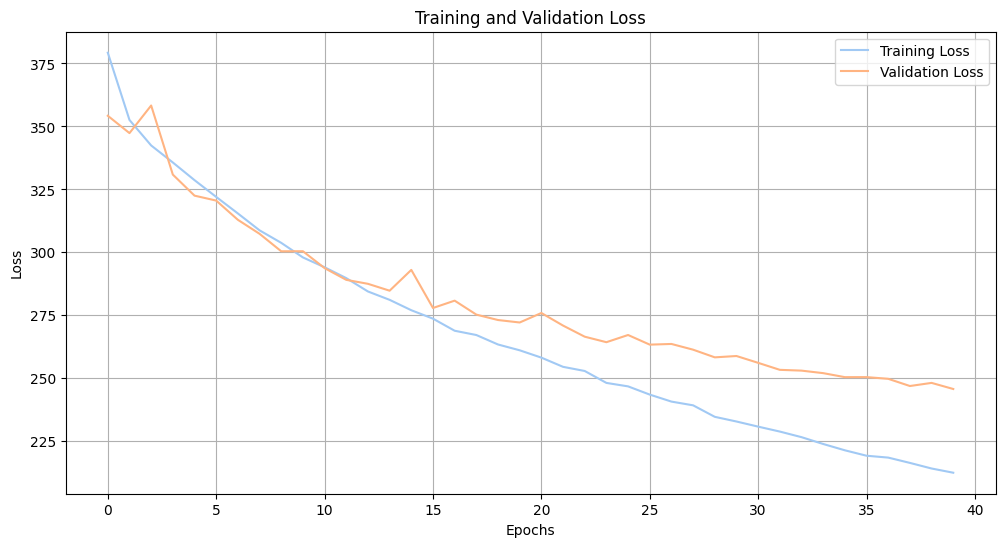

In [175]:
model4_40_low_dropout = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_40_low_dropout.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_40_low_dropout, X_final, y, epochs=40)

Снизил дропаут до 0.1. Метрики лучше, но график сам хуже

Раз такие результаты спорные(лучше метрики, хуже график), то попробую оставить качество метрик, снизив переобучение. Добавим еще слой дропаут, а число нейронов будем динамически менять, сначала отбрасывая больше, а с обучением уже будем отбрасывать меньшее число

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 257.29254150390625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.60
RMSE: 16.04
R2 Score: 0.48


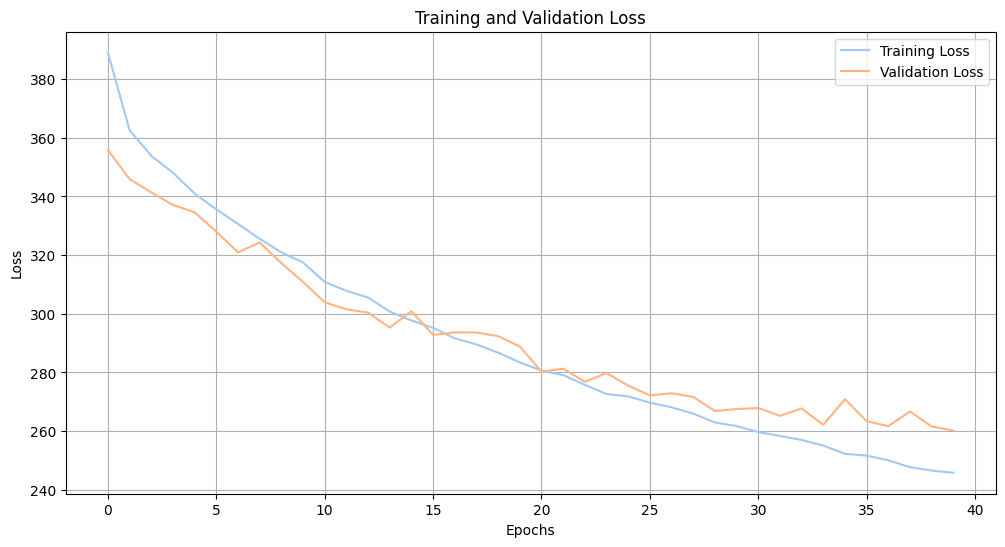

In [176]:
model4_40_various_dropout = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1)
])
    
model4_40_various_dropout.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_40_various_dropout, X_final, y, epochs=40)

Метрики похуже, чем в случае со стандартным дропаутом 0.2, график стал лучше относительно прошлого раза, когда тестировал модель с низким дропаутом(0.1)

Тест при среднем дропауте(0.15). Не нравятся метрики при 0.2, а при 0.1 не нравится график

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 254.0504608154297
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.50
RMSE: 15.94
R2 Score: 0.49


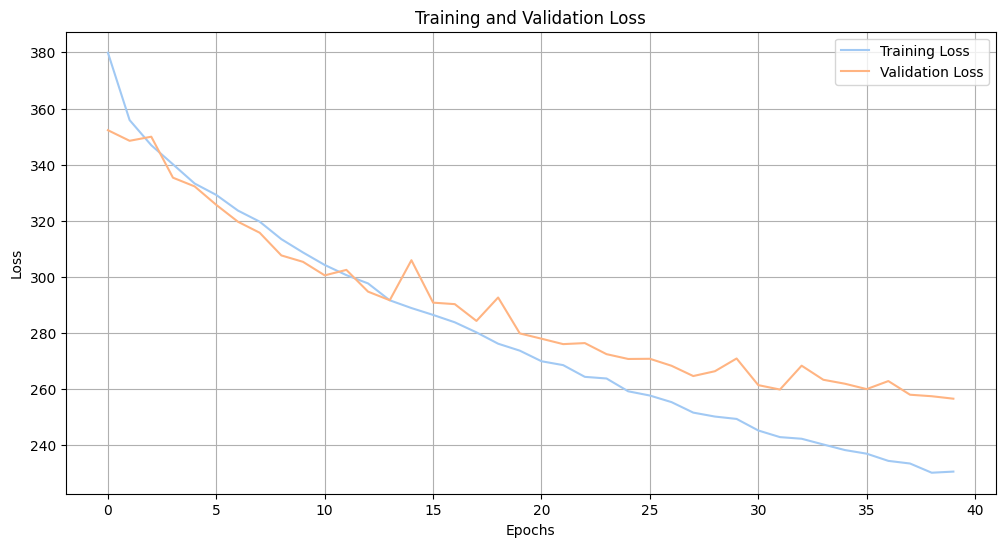

In [177]:
model4_40_mid_dropout = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.15),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_40_mid_dropout.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model4_40_mid_dropout, X_final, y, epochs=40)

Метрики схожи с дропаутом 0.2, но немного видно стагнацию, а может и переобучение, график на 0.2 был лучше, чем на 0.15

После каждого стандартного слоя я добавил нормализацию батча

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 241.88462829589844
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.26
RMSE: 15.55
R2 Score: 0.51


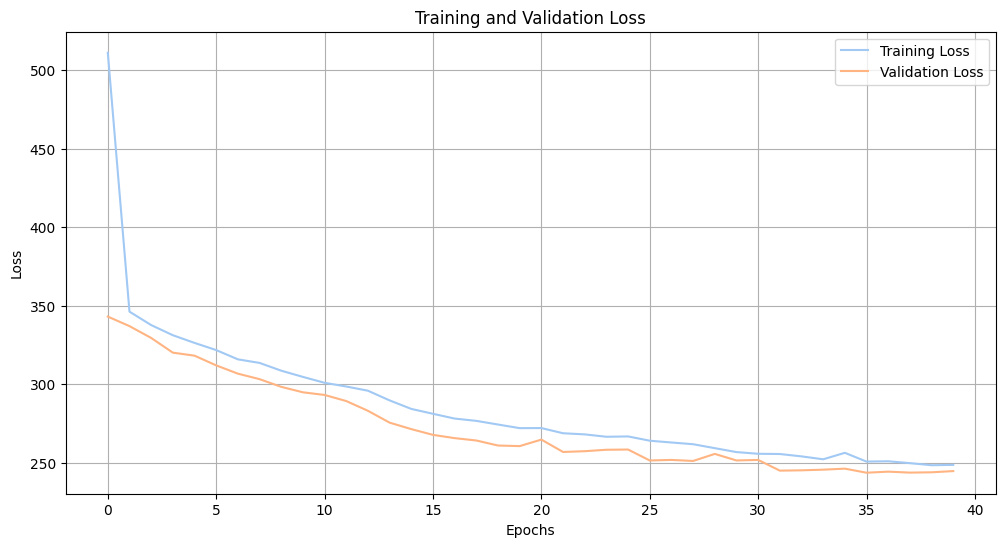

In [178]:
model5_40_bn = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1) 
])

model5_40_bn.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model5_40_bn, X_final, y, epochs=40)

В целом метрики значительно улучшились. Но при этом график ведет себя непривычно, наверное из-за того, что ошибка сначала на тесте крайне высока, а далее уже становится адекватной. Но при этом после 30 эпохи особо модель не улучшает свои показатели.
Пока лучшая эта модель и та, что с дропаутом 0.2

Раз есть нормализация батчей, можно попробовать увеличить их число до 64

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 236.950439453125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.06
RMSE: 15.39
R2 Score: 0.52


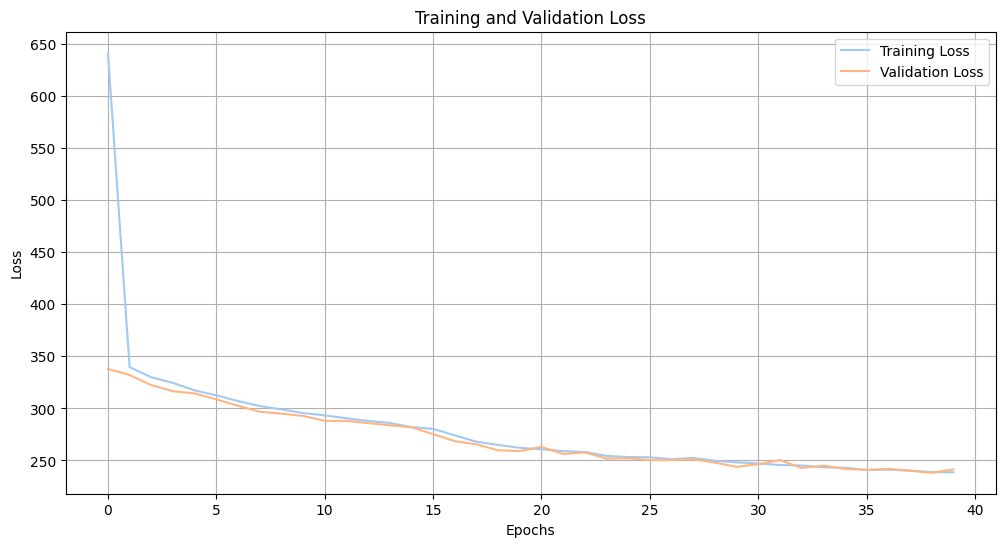

In [179]:
model5_40_bn = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1) 
])

model5_40_bn.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model5_40_bn, X_final, y, epochs=40, batch=64)

Основа графика примерно та же, идет стабильно вниз. Но очень пугает конечно такое высокое значение на старте при train loss. Метрики подобны предыдущему случаю

Еще возьмем другой scaler, попробую min max на модели с дропаут 0.2

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 292.92047119140625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 12.47
RMSE: 17.11
R2 Score: 0.41


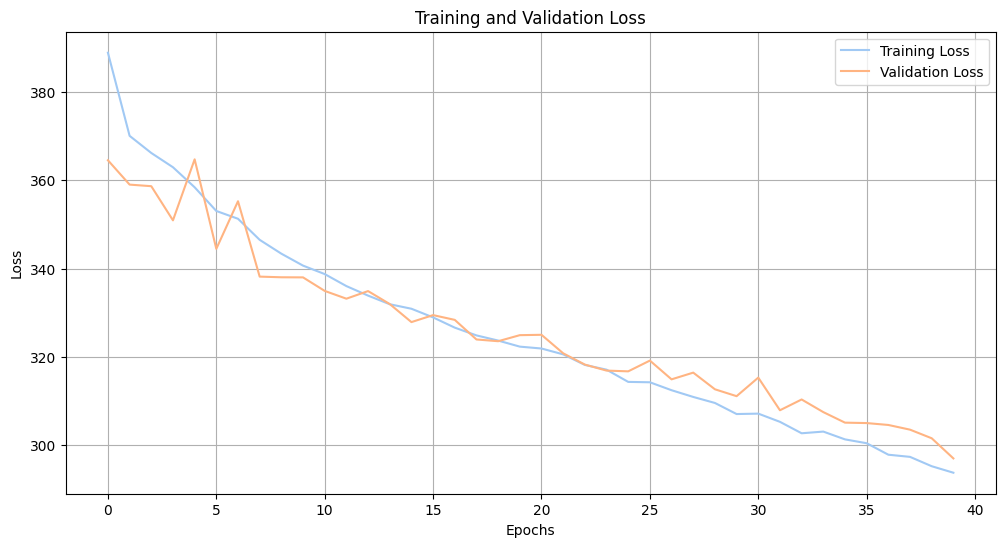

In [180]:
from sklearn.preprocessing import MinMaxScaler
def test_new_network_min_max(model, X, y, epochs=15, batch=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch,
        validation_split=0.2,
        verbose=0
    )
    
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss}")
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

model4_40_scaler = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])
    
model4_40_scaler.compile(optimizer='adam', loss='mean_squared_error')
test_new_network_min_max(model4_40_scaler, X_final, y, 40)

В целом ожидаемо все хуже, метрики, график неплохой, но просто другой, разницы особой между train и val loss нет

Пробую поменять функцию активации

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Test Loss: 269.00018310546875
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.99
RMSE: 16.40
R2 Score: 0.46


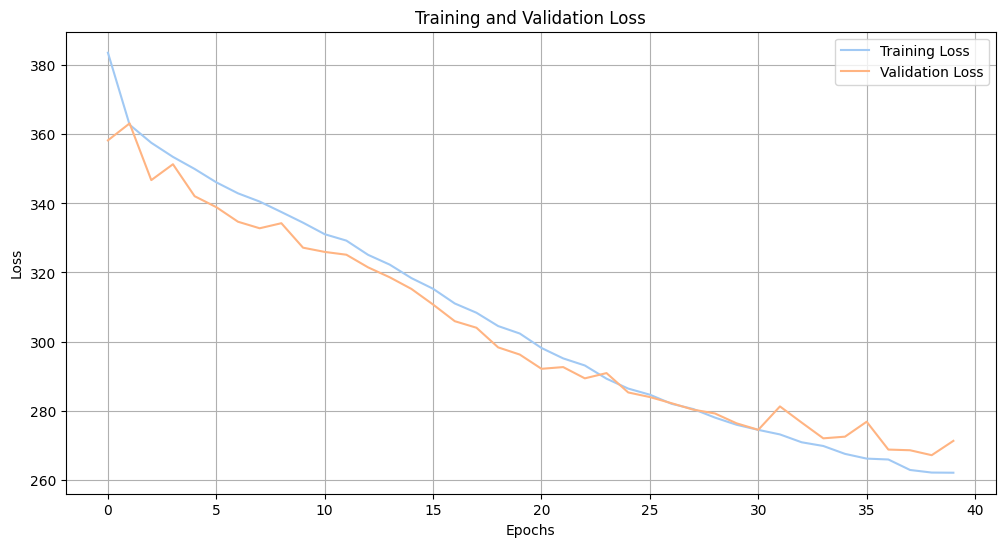

In [181]:
model6_leaky = keras.Sequential([
    keras.layers.Dense(256),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64),
    keras.layers.LeakyReLU(alpha=0.1),
    keras.layers.Dense(1)
])

model6_leaky.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model6_leaky, X_final, y, epochs=40)

Метрики хуже, график примерно такой же, как и с relu, может чуть более плавный

Проверим еще одну функцию активации

Test Loss: 252.4539031982422
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.46
RMSE: 15.89
R2 Score: 0.49


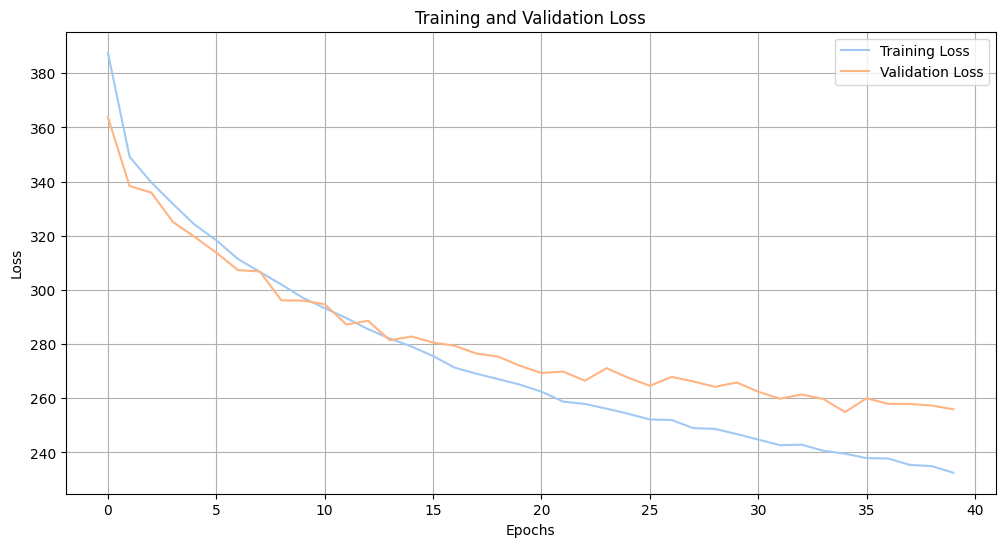

In [182]:
model6_swish = keras.Sequential([
    keras.layers.Dense(256, activation='swish'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='swish'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='swish'),
    keras.layers.Dense(1)
])

model6_swish.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(model6_swish, X_final, y, epochs=40)

Результаты как по графику, так и по метрикам средние и хуже relu

Тест другого оптимизатора вместо adam использую rmsprop

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 272.2522277832031
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.94
RMSE: 16.50
R2 Score: 0.45


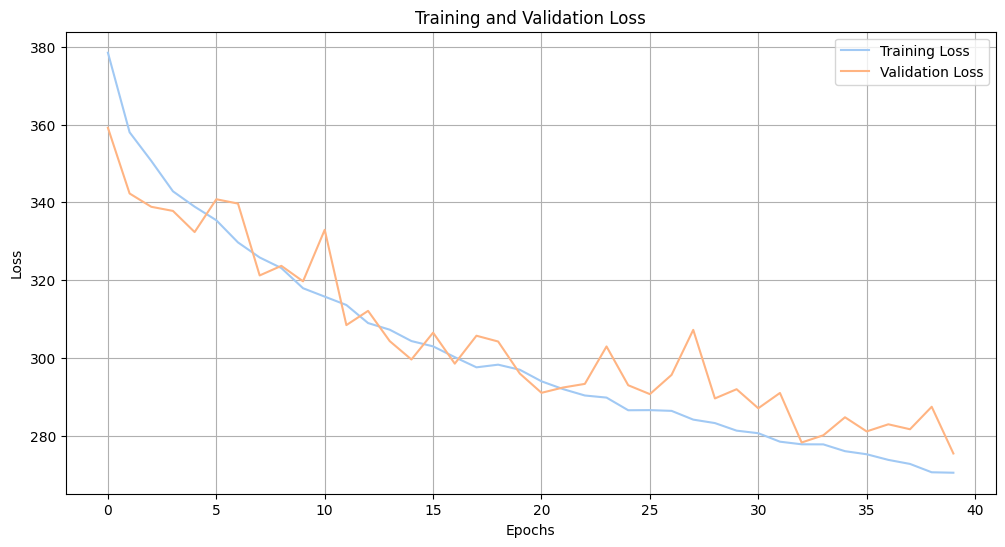

In [183]:
model6_rmsprop = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model6_rmsprop.compile(optimizer=keras.optimizers.RMSprop(), loss='mean_squared_error')

test_new_network(model6_rmsprop, X_final, y, epochs=40)

Не, это ужас вообще

Дополнительно пробую добавить l2 регуляризацию

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 273.87457275390625
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 11.63
RMSE: 16.09
R2 Score: 0.48


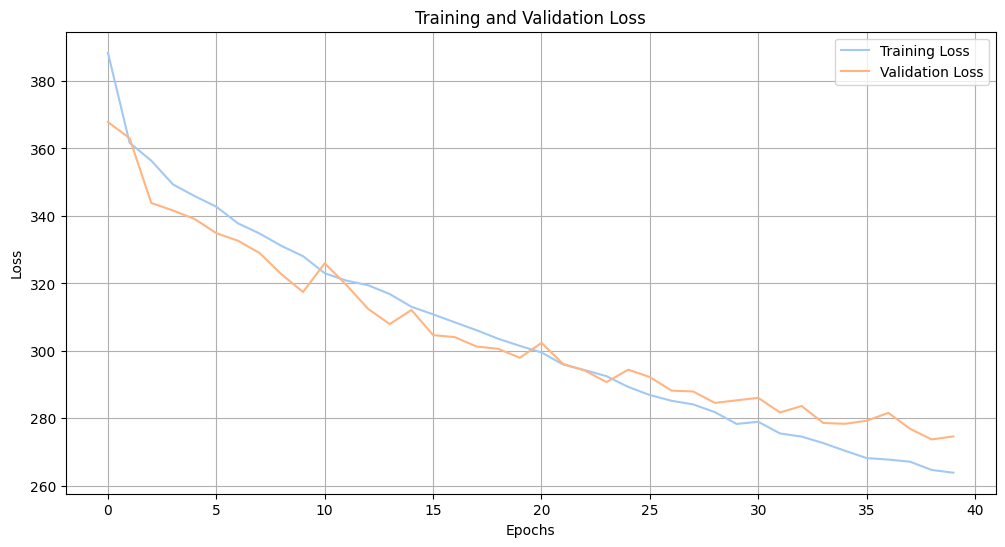

In [184]:
from keras import regularizers
model7_l2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu',
                       kernel_regularizer=regularizers.l2(0.01),
                       input_shape=(X_final.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

model7_l2.compile(optimizer='adam', loss='mean_squared_error')

test_new_network(model7_l2, X_final, y, epochs=40)

Метрики обычные, график обычный. Без особых улучшений тут

## Итоги по нейронным сетям


**Важный момент: данные могут быть по метрикам приблизительные, так как результаты были записаны самых первых прогонов обучения, а у меня kaggle решил сбросить все мои запуски, поэтому на деле метрики могут быть чуть выше или чуть ниже**

Лучший результат показали две сети:

**model4_40** - Модель с двумя дропаут слоями на 40 эпохах, батч 32. Оптимизатор Adam, активация relu, standard scaler


* MAE: 11.38
* RMSE: 15.92
* R2: 0.49


**model5_40_bn** - Вторая модель: все так же, как и в первой, но при этом добавлена batch normalization, которая показала наибольший прирост среди всего протестированного

* MAE: 11.11
* RMSE: 15.40
* R2: 0.52

Были и другие неплохие варианты, например модель с дропаутом 0.1, но там график не очень выходил

Тут проверил все, что можно было, менял структуру, батч, нормализацию делал, менял слои дропаута и число отключаемых нейронов, разные функции активации пробовал и другой оптимизатор тестил

## Линейные

In [334]:
def test_linear(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

### LinearRegression

In [189]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
test_linear(model_linear, X_final, y)

Для линейной регрессии не самые плохие метрики, но такие модели не улавливают необходимых взаимосвязей между параметрами

### Ridge

Использует l2-регуляризацию для снижения переобучения модели

In [327]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
test_linear(model_ridge, X_final, y)

MAE: 14.57
RMSE: 19.03
R2 Score: 0.27


Метрики полностью совпали с первой моделью

### Lasso

Использует l1-регуляризацию. Удаляет незначимые признаки

In [328]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1)
test_linear(model_lasso, X_final, y)

MAE: 14.72
RMSE: 19.21
R2 Score: 0.26


In [329]:
model_lasso = Lasso(alpha=10)
test_linear(model_lasso, X_final, y)

MAE: 18.87
RMSE: 22.28
R2 Score: -0.00


In [330]:
model_lasso = Lasso(alpha=0.1)
test_linear(model_lasso, X_final, y)

MAE: 14.59
RMSE: 19.05
R2 Score: 0.27


In [336]:
model_lasso = Lasso(alpha=0.01)
test_linear(model_lasso, X_final, y)

MAE: 14.57
RMSE: 19.03
R2 Score: 0.27


Lasso показывает метрики хуже, чем предыдущие модели при относительно высоких alpha, но при снижении достигает того же результата, что и linear regression, так как уже регуляризация близка к нулю, и модель превращается по сути в обычную

### ElasticNet

In [354]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
test_linear(model_elastic, X_final, y)

MAE: 14.59
RMSE: 19.05
R2 Score: 0.27


In [362]:
from sklearn.linear_model import ElasticNet
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
test_linear(model_elastic, X_final, y)

MAE: 14.57
RMSE: 19.03
R2 Score: 0.27


Та же ситуация и с такой моделью

## Итоги по линейным моделям

Все модели показывают одинаковые результаты, достигая одних и тех же метрик. Конечно линейные модели слишком простые для такого датасета, и показывают результат хуже, чем нейронные сети

Лучшие метрики:
* MAE: 14.57
* RMSE: 19.03
* R2 Score: 0.27

У лучшей нейронной сети:
* MAE: 11.11
* RMSE: 15.40
* R2 Score: 0.52

## Деревья

### DecisionTreeRegressor с GridSearchCV

In [242]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

In [250]:
tree = DecisionTreeRegressor(random_state=42)

params = {
    'max_depth': range(2, 11, 2),
    'min_samples_split': range(2, 21, 5),
    'min_samples_leaf': range(1, 11, 2)
}

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 17}

In [253]:
tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)

params = {
    'max_depth': range(2, 21, 2),
    'min_samples_split': range(20, 31, 2)
}

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


{'max_depth': 14, 'min_samples_split': 30}

In [254]:
tree = DecisionTreeRegressor(random_state=42, min_samples_leaf=5, max_depth=14)

params = {
    'min_samples_split': range(20, 51, 2)
}

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=tree, param_grid=params, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'min_samples_split': 36}

In [263]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 10.50
RMSE: 15.95
R2 Score: 0.49


На данный момент метрики получились очень даже хорошие. MAE лучше, чем у нейросети(11.11), остальные метрики чуть хуже(RMSE было 15.40), R2 - 0.52, но деревья все-таки склонны к переобучению, а данные тут непростые. Поэтому позже проверю модель на кросс-валидации

In [196]:
from sklearn.model_selection import cross_val_score
mae = abs(cross_val_score(best_tree, X_test, y_test, cv=5, scoring='neg_mean_absolute_error').mean())
rmse = abs(cross_val_score(best_tree, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()) ** 0.5
r2 = cross_val_score(best_tree, X_test, y_test, cv=5, scoring='r2').mean()

In [276]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 12.19
RMSE: 17.90
R2 Score: 0.35


Довольно хороший результат для MAE получили, 12 для дерева очень даже хорошо

Посмотрим на визуализацию принятия решений деревом, чтобы посмотреть, какие фичи рассматривались

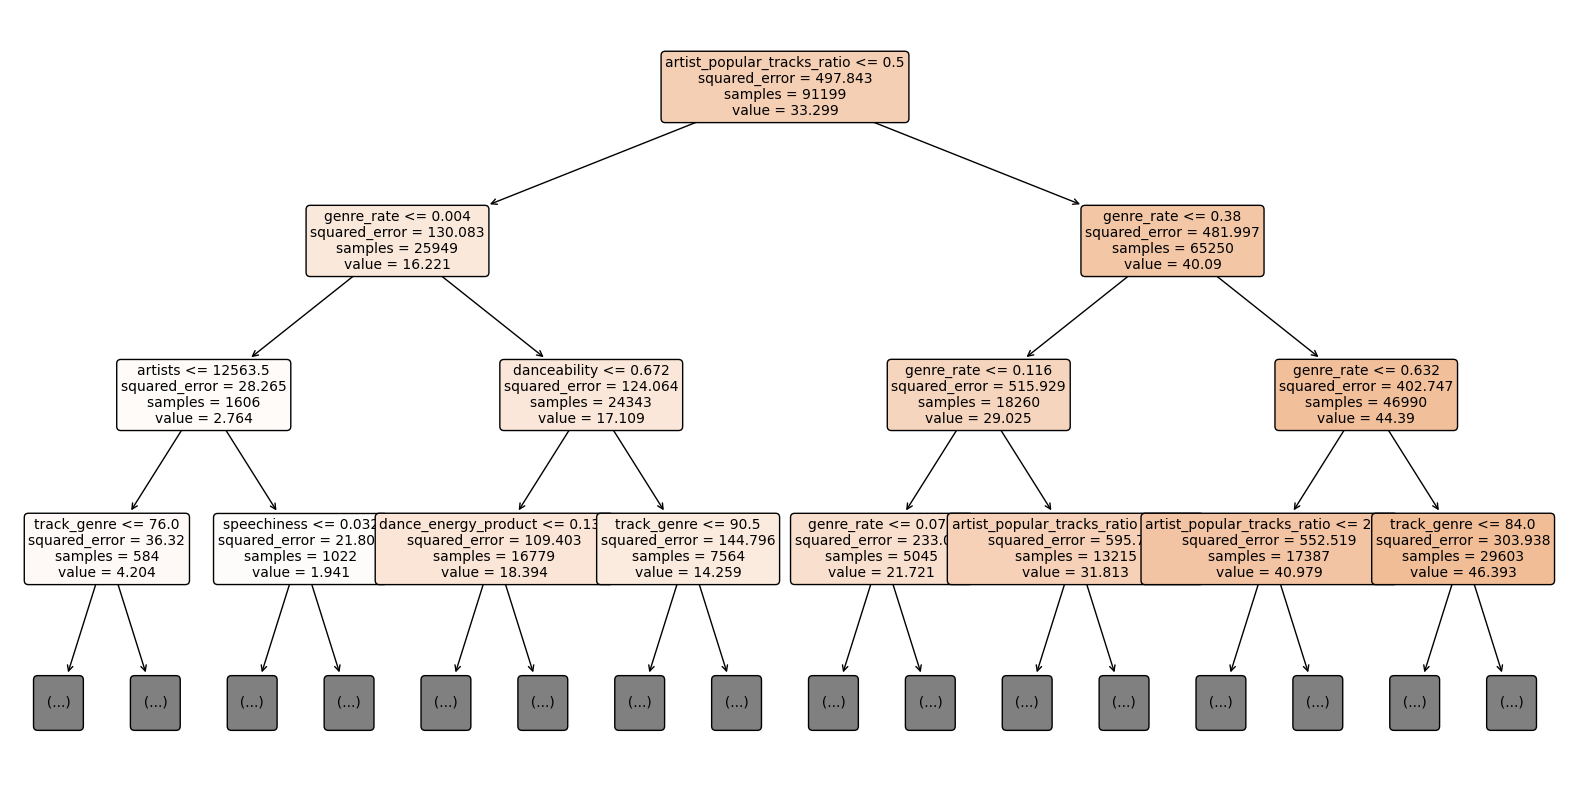

In [259]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_tree, 
    feature_names=X_final.columns, 
    max_depth=3,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

Из основных фич, которые рассматривало дерево: artist_popular_track_ratio, genre_rate, artists, danceability

### RandomForest

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=36, random_state=42)
params = {
    'n_estimators': np.arange(20, 201, 10)
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=3,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
random_search_rf.best_params_

In [289]:
best_rf = random_search_rf.best_estimator_

In [291]:
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 10.22
RMSE: 14.90
R2 Score: 0.55


Дерево по метрикам справилось лучше, чем нейронная сеть

* MAE: 10.22 vs 11.11
* RMSE: 14.90 vs 15.40
* R2: 0.55 vs 0.52

In [293]:
mae = abs(cross_val_score(best_rf, X_test, y_test, cv=3, scoring='neg_mean_absolute_error').mean())
rmse = abs(cross_val_score(best_rf, X_test, y_test, cv=3, scoring='neg_mean_squared_error').mean()) ** 0.5
r2 = cross_val_score(best_rf, X_test, y_test, cv=3, scoring='r2').mean()

In [294]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 11.61
RMSE: 16.34
R2 Score: 0.46


## Итоги по деревьям

На кросс-валидации(3 фолда) модель показывает уже более правдоподобные метрики, которые хуже, чем у нейронной сети. Но для честного сравнения нужно будет провести кросс-валидацию и для нейронной сети в самом конце ноутбука.

Но для данных без кросс-валидации деревья показали себя достойно и выдали лучшие метрики

Метрики:

**Дерево** показало следующие результаты(данные на тестовой выборке и после кросс-валидации): 

* MAE: 10.50; 12.19
* RMSE: 15.95; 17.90
* R2 Score: 0.49; 0.35

Метрики довольно хорошие для дерева, но сильно видно гораздо большую ошибку по RMSE, низкий показатель R2,а MAE относительно неплох

**Лес**:

* MAE: 10.22; 11.61
* RMSE: 14.90; 16.34
* R2 Score: 0.55; 0.46

Метрики лучше, чем у дерева, но RMSE и R2 все так же показывают результаты довольно базовые, а MAE - хорош

Взял две модели: DecisionTree и RandomForest. Подобрал относительно лучшие параметры для DecisionTree через GridSearch. А для RandomForest использовал RandomSearch, оставив параметры дерева такими, которые были на лучшем дереве



## Градиентный бустинг

Рассмотрим модель XGBoost, подобрав параметры через RandomizedSearch

In [299]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(random_state=42)

param_distributions = {
    'max_depth': [3, 5, 15],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsamp

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 5, 15],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [301]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [303]:
best_xgb = random_search.best_estimator_

In [305]:
y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 6.90
RMSE: 10.71
R2 Score: 0.77


Метрики на этот раз очень порадовали, отличные результаты вышли. Нужно проверить и на кросс-валидации

In [312]:
mae = abs(cross_val_score(best_xgb, X_test, y_test, cv=3, scoring='neg_mean_absolute_error').mean())
rmse = abs(cross_val_score(best_xgb, X_test, y_test, cv=3, scoring='neg_mean_squared_error').mean()) ** 0.5
r2 = cross_val_score(best_xgb, X_test, y_test, cv=3, scoring='r2').mean()
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 10.18
RMSE: 14.89
R2 Score: 0.55


После кросс-валидации метрики значительно упали, что может говорить о переобучении модели, но они уже лучше, чем те же данные в RandomForest

Слева XGBoost, справа - RandomForest на кросс-валидации

* MAE: 10.18; 11.61
* RMSE: 14.89; 16.34
* R2: 0.55; 0.46

Попробуем и модель Light Gradient Boosting

In [310]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)

param_distributions = {
    'max_depth': [3, 5, 15],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_samples': [10, 20, 50]
}

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=-10,
    random_state=42
)


random_search.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 60799, number of used features: 33
[LightGBM] [Info] Start training from score 33.243639
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set 

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_samples': 10,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [311]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 200,
 'min_child_samples': 10,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [315]:
best_lgbm = random_search.best_estimator_
y_pred = best_lgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
MAE: 10.17
RMSE: 14.15
R2 Score: 0.60


In [317]:
mae = abs(cross_val_score(best_lgbm, X_test, y_test, cv=3, scoring='neg_mean_absolute_error').mean())
rmse = abs(cross_val_score(best_lgbm, X_test, y_test, cv=3, scoring='neg_mean_squared_error').mean()) ** 0.5
r2 = cross_val_score(best_lgbm, X_test, y_test, cv=3, scoring='r2').mean()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3671
[LightGBM] [Info] Number of data points in the train set: 15200, number of used features: 33
[LightGBM] [Info] Start training from score 32.971842
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set 

In [318]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 10.89
RMSE: 15.13
R2 Score: 0.54


Как видно по метрикам, модель справляется хуже, чем XGBoost. Без кросс-валидации результат сильно хуже, а с ней - немного хуже

## Итоги по градиентному бустингу

Модели градиентного бустинга показали себя крайне достойно, удалось с помощью RandomizedSearch найти лучшие параметры для моделей и сравнить XGBoost и LGBM

Даже с учетом кросс-валидации модель справляется лучше, чем нейросеть без нее

Ну и конечно это лучше, чем результаты деревьев и линейных моделей

Слева XGBoost, справа - нейронная сеть

* MAE: 10.18; 11.11
* RMSE: 14.89; 15.40
* R2: 0.55; 0.52

Еще подумал, что в XGB есть значительный разрыв между данными на тестовой модели и на кросс-валидации. И решил ограничить еще n_estimators с 500 до 300. Но результатов это не дало, метрики буквально те же самые

In [323]:
xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mae = abs(cross_val_score(xgb_model, X_test, y_test, cv=3, scoring='neg_mean_absolute_error').mean())
rmse = abs(cross_val_score(xgb_model, X_test, y_test, cv=3, scoring='neg_mean_squared_error').mean()) ** 0.5
r2 = cross_val_score(xgb_model, X_test, y_test, cv=3, scoring='r2').mean()

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 10.18
RMSE: 14.89
R2 Score: 0.55


# Сравнение результатов лучших моделей из каждого семейства на графике, без кросс-валидации

Функция, которая считает метрики для каждой модели и выводит данные на графики

In [353]:
def compare_models(models, X_test, y_test):
    results = {
        "Model": [],
        "MAE": [],
        "RMSE": [],
        "R2": []
    }

    for name, model in models.items():
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y_test, y_pred)
        
        results["Model"].append(name)
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["R2"].append(r2)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    metrics = ["MAE", "RMSE", "R2"]
    for i, metric in enumerate(metrics):
        ax[i].bar(results["Model"], results[metric], color='#A8C69F')
        ax[i].set_title(metric)
        ax[i].set_xticklabels(results["Model"], rotation=45, ha="right")
        ax[i].set_ylabel(metric)
    plt.tight_layout()
    plt.show()
    
    return results

Изначально пытался дать на тест уже обученные модели, но результаты были странные, как будто модели не учитывали то, что они уже обучились или с масштабированием была проблема. В общем еще раз взял все модели, создал тестовые версии заново с лучшими параметрами

In [191]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_linear_test = LinearRegression()
model_linear_test.fit(X_train, y_train)

rf_test = RandomForestRegressor(
    max_depth=14,
    min_samples_leaf=5,
    min_samples_split=36,
    random_state=42,
    n_estimators=130,
    verbose=0
)

rf_test.fit(X_train, y_train)
xgb_test = XGBRegressor(
    subsample=0.8,
    n_estimators=500,
    max_depth=15,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42,
    verbose=0
)
xgb_test.fit(X_train, y_train)

model5_40_bn_test = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1) 
])

model5_40_bn_test.compile(optimizer='adam', loss='mean_squared_error')
scaler = StandardScaler()

model5_40_bn_test.fit(
    X_train, y_train,
    epochs=40,
    batch_size=64,
    validation_split=0.2,
    verbose=0)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:14:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/tmp/ipykernel_30/3617694977.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(results["Model"], rotation=45, ha="right")


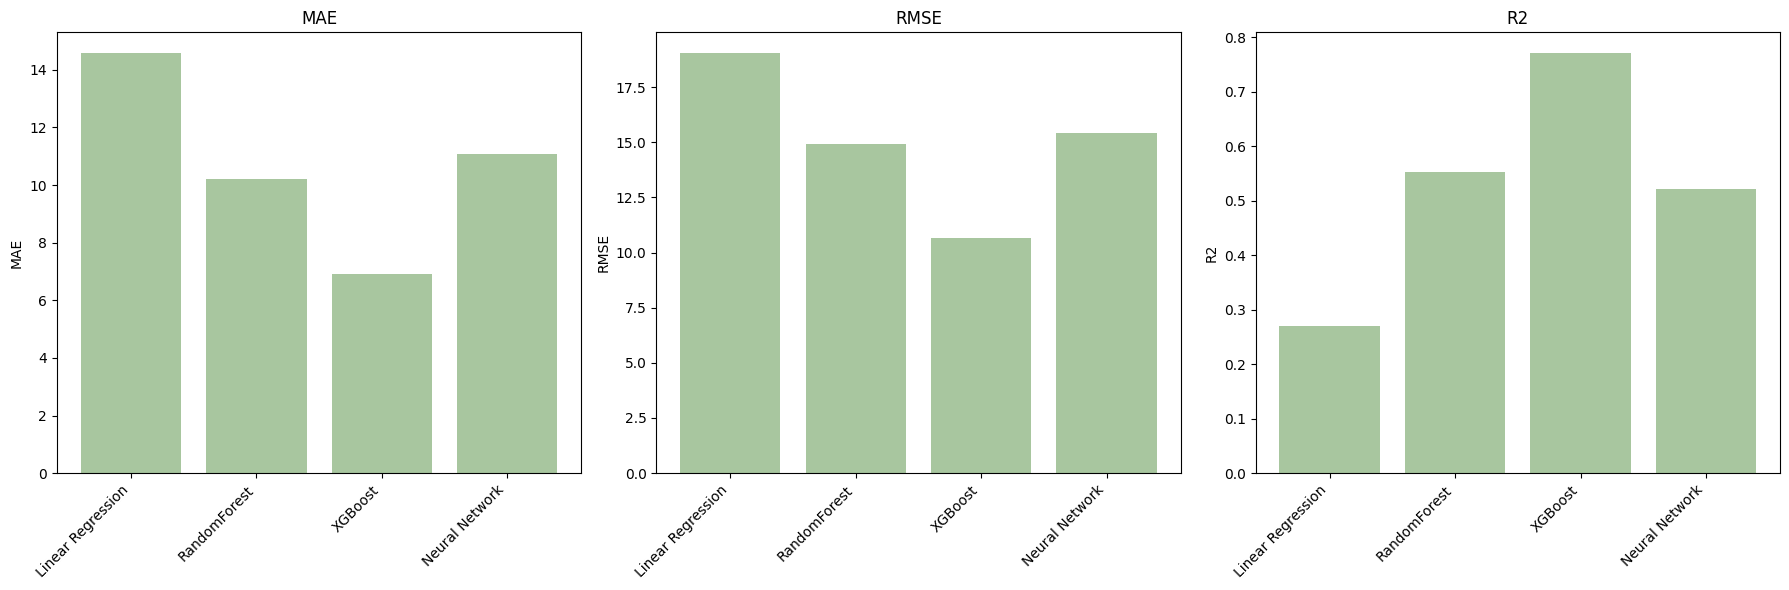

Linear Regression: MAE=14.57, RMSE=19.03, R2=0.27
RandomForest: MAE=10.22, RMSE=14.90, R2=0.55
XGBoost: MAE=6.90, RMSE=10.68, R2=0.77
Neural Network: MAE=11.07, RMSE=15.41, R2=0.52


In [354]:
models = {
    "Linear Regression": model_linear_test,
    "RandomForest": rf_test,
    "XGBoost": xgb_test,
    "Neural Network": model5_40_bn_test
}

results = compare_models(models, X_test, y_test)

for model, mae, rmse, r2 in zip(results["Model"], results["MAE"], results["RMSE"], results["R2"]):
    print(f"{model}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

Сравнение:
1. Линейная регрессия ожидаемо показала худшие результаты везде
2. RandomForest показал себя с хорошей стороны, у него все метрики лучше, чем у нейронной сети, но не исключено переобучение
3. XGBoost выдал значительно более высокие метрики, чем у других моделей. Но при проверке на кросс-валидации результаты уже становятся хуже
4. Нейронная сеть на данном этапе проигрывает и RandomForest, и XGBoost, но тут менее вероятно переобучение, и результаты на кросс-валидации с 5+ фолдов(для скорости ранее проверял на 3) могут быть лучше

Выводы:
1. XGBoost - лучшая модель, которая показала отличные результаты даже на кросс-валидации
2. Все три модели RandomForest, XGBoost, NeuralNetwork я возьму для кросс-валидации уже итоговой, чтобы точно определить лучшую модель
3. Модели XGBoost, RandomForest могли переобучиться, так как тут тяжелее было следить за этим. А в нейронной сети я старался смотреть на график и вовремя останавливать процесс обучения моделей вручную

# Кросс-валидация лучших моделей

Проведем кросс-валидацию сразу для нескольких моделей. Отдельно будем оценивать результаты для леса, xgboost встроенным cross_val_score. А для нейронной сети воспользуемся разделением через KFold

In [197]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Model

def compare_models_cross_val(models, X, y, cv=5, epochs=20):
    results = {
        "Model": [],
        "MAE": [],
        "RMSE": [],
        "R2": []
    }
    
    for name, model in models.items():
        if isinstance(model, Model):  # Для нейронной сети
            maes, rmses, r2s = [], [], []
            for train_idx, test_idx in KFold(n_splits=cv, shuffle=True, random_state=42).split(X):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=0)
                y_pred = model.predict(X_test).ravel()
                
                maes.append(mean_absolute_error(y_test, y_pred))
                rmses.append(mean_squared_error(y_test, y_pred) ** 0.5)
                r2s.append(r2_score(y_test, y_pred))
            
            mae = np.mean(maes)
            rmse = np.mean(rmses)
            r2 = np.mean(r2s)
        else:  # Для остальных моделей с cross_val_score
            scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
            mae = -np.mean(scores)
            
            scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
            rmse = (-np.mean(scores)) ** 0.5
            
            scores = cross_val_score(model, X, y, cv=cv, scoring='r2', n_jobs=-1)
            r2 = np.mean(scores)
        
        results["Model"].append(name)
        results["MAE"].append(mae)
        results["RMSE"].append(rmse)
        results["R2"].append(r2)
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    metrics = ["MAE", "RMSE", "R2"]
    for i, metric in enumerate(metrics):
        ax[i].bar(results["Model"], results[metric], color='#A8C69F')
        ax[i].set_title(metric)
        ax[i].set_xticklabels(results["Model"], rotation=45, ha="right")
        ax[i].set_ylabel(metric)
        ax[i].grid(True)
    plt.tight_layout()
    plt.show()
    
    return results

Кросс-валидация выполняется продолжительное время, поэтому я принял решение снизить количество эпох для нейросети с 40 до 20 и посмотреть на результаты такой модели

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:32:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:34:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:36:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:38:35] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:40:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, Use

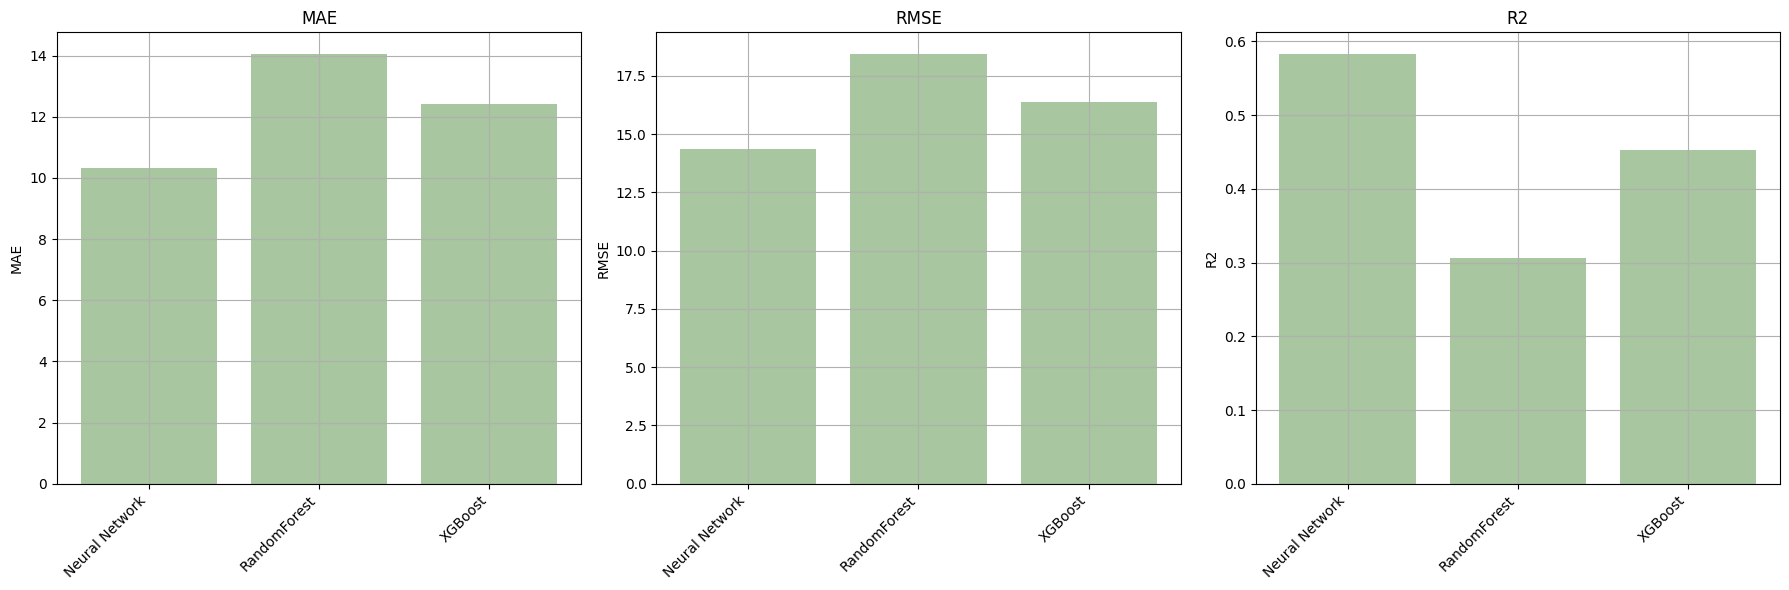

Neural Network: MAE=10.33, RMSE=14.37, R2=0.58
RandomForest: MAE=14.06, RMSE=18.45, R2=0.31
XGBoost: MAE=12.43, RMSE=16.37, R2=0.45


In [377]:
model5_40_bn_test_cross_val = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)
])

model5_40_bn_test_cross_val.compile(optimizer='adam', loss='mean_squared_error')
models = {
    "Neural Network": model5_40_bn_test_cross_val,
    "RandomForest": rf_test,
    "XGBoost": xgb_test
}

results = compare_models_cross_val(models, X_final, y)

for model, mae, rmse, r2 in zip(results["Model"], results["MAE"], results["RMSE"], results["R2"]):
    print(f"{model}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

Решил все же дождаться и посмотреть на результат нейронной сети для 40 эпох, как хотелось изначально

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too sho

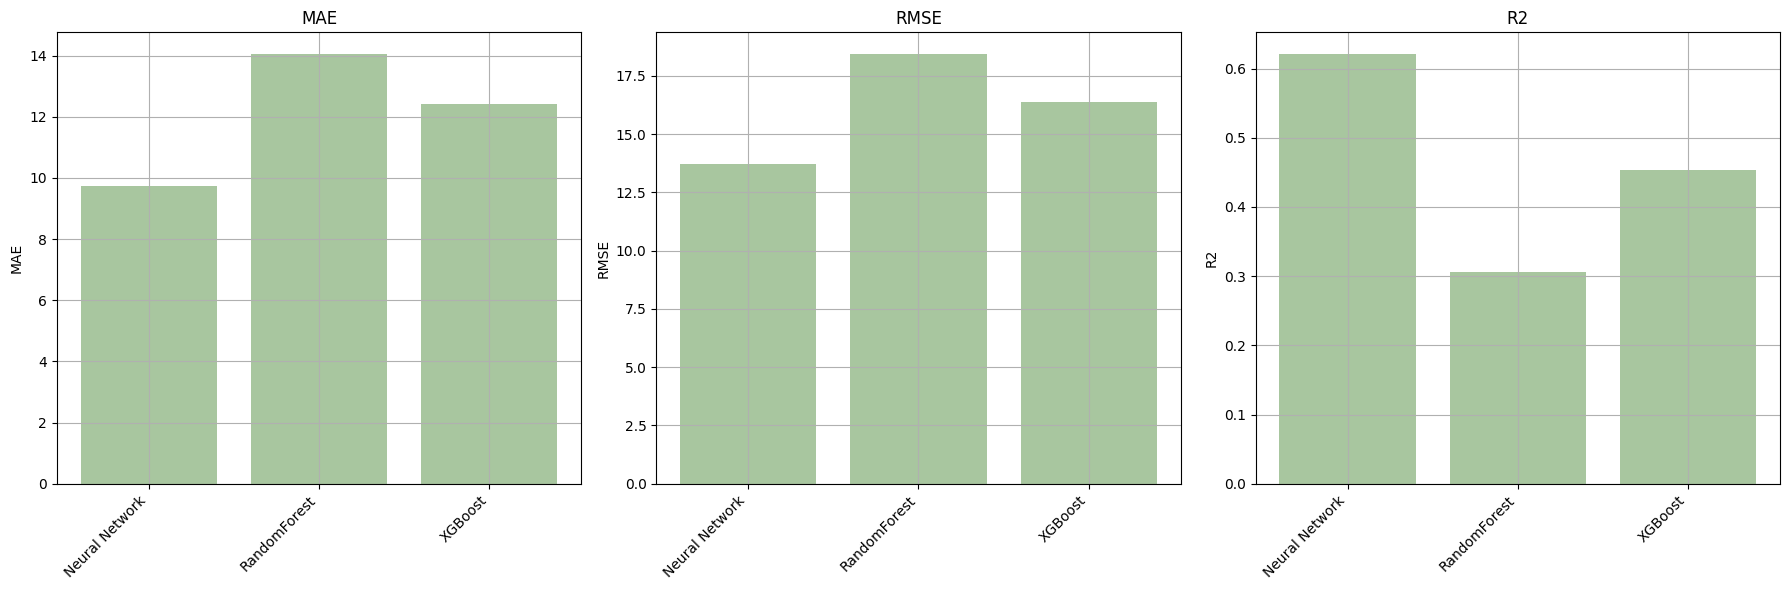

Neural Network: MAE=9.75, RMSE=13.70, R2=0.62
RandomForest: MAE=14.06, RMSE=18.45, R2=0.31
XGBoost: MAE=12.43, RMSE=16.37, R2=0.45


In [198]:
test_40 = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)
])

test_40.compile(optimizer='adam', loss='mean_squared_error')
models = {
    "Neural Network": test_40,
    "RandomForest": rf_test,
    "XGBoost": xgb_test
}

results = compare_models_cross_val(models, X_final, y, epochs=40)

for model, mae, rmse, r2 in zip(results["Model"], results["MAE"], results["RMSE"], results["R2"]):
    print(f"{model}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

# Выводы по моделям
На тестовом наборе данных нейронная сеть проигрывала XGBoost и RandomForest. Тогда лучшей моделью с прекрасными метриками на тестовых данных стал XGBoost. Но, как и предполагалось, при кросс-валидации нейронная сеть вернулась в игру. Она показывала как стабильные результаты на тестовом наборе данных, так и даже улучшила свои показатели на кросс-валидации

* Нейронная сеть показывает стабильные результаты на тестовом наборе данных, и при кросс-валидации. Это говорит о том, что такая модель обладает лучшей обобщающей способностью для этой задачи. На ней удалось достичь MAE ниже 10, неплохие показатели RMSE и R2
* XGBoost лучше всех справляется с тестовым набором данных, но переобучается и снижает метрики на кросс-валидации
* RandomForest также на тестовом наборе показывает хорошие результаты, но проигрывает моделям выше на кросс-валидации
* Линейная регрессия показывает стабильно слабые результаты, поэтому не была включена в тесты на кросс-валидации

# Результаты лучшей модели на кросс-валидации
* MAE=9.75
* RMSE=13.70
* R2=0.62

# Исправляю ошибку. Смотрим на лучшую модель но на немного измененных признаках

Проблема в том, что я допустил довольно грубую ошибку при добавлении признаков в модель. Оставил там хорошие, как мне показалось фичи популярности артиста, коэффицента популярности его треков и среднего числа треков, которые популярны в определенном жанре. Но это большая ошибка, ведь во все данные по сути зашит таргет, а это очень плохо, сразу этого я не осознал, но, когда осознал, было поздно. Корреляция признаков таких составляет 0.3 и 0.4 где-то, что не самая серьезная корреляция, но дает более оптимистичные метрики для оценки модели, чем есть на самом деле.

Выше эксперименты оставлю так, все равно модель подобрана верно, и жалко немного потраченного времени на немного нечестную оценку, но в общем картина была бы примерно такой же, какой и получилась у меня.

Поэтому сейчас еще уберу признаки, обучу модель на этих данных, и там уже глянем, что выйдет

In [201]:
X_last = X_final.copy()
X_last = X_last.drop(columns=['is_popular_artist', 'artist_popular_tracks_ratio', 'genre_rate'])

In [202]:
final_model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_last.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)
])

final_model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 360.70880126953125
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE: 14.85
RMSE: 18.99
R2 Score: 0.27


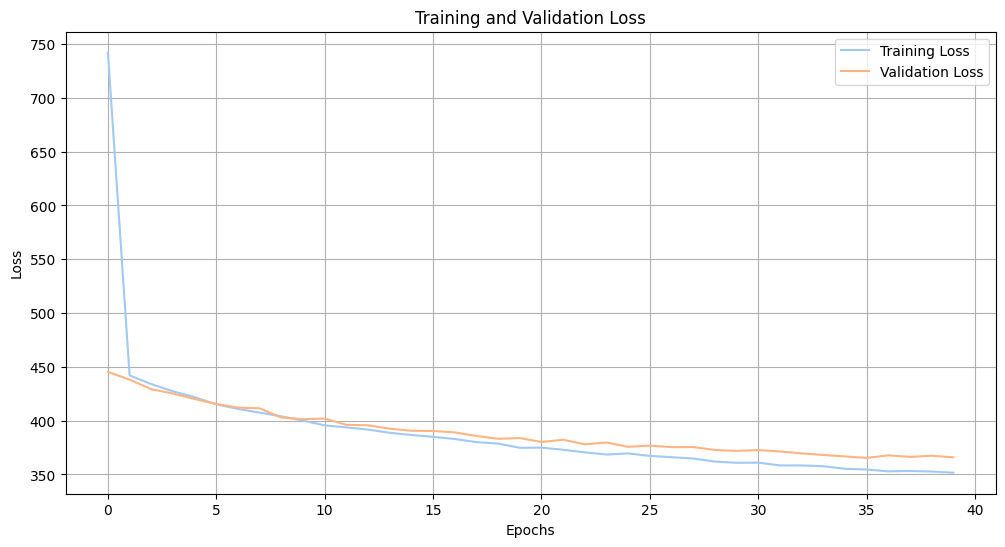

In [203]:
test_new_network(final_model, X_last, y, epochs=40, batch=64)

Ну а вот и более правдоподобные метрики итоговой модели. MAE и RMSE завышены где-то на 5 целых, R2 довольно низкий. Это выше, чем результаты на начальной модели, но не сильно проделанная работа спасае эту модель от довольно средних(если не плохих) показателей. Что еще раз подтверждает сложность создания модели, которая бы точно определяла популярность трека по далеко не самым репрезентативным параметрам

Для интереса ниже еще один тест модели, которая берет 10 лучших признаков по permutation_importance. Но не стал брать все признаки, связанные с danceability, их было много. Результаты ниже, плохие довольно-таки

Test Loss: 431.9138488769531
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.88
RMSE: 20.78
R2 Score: 0.13


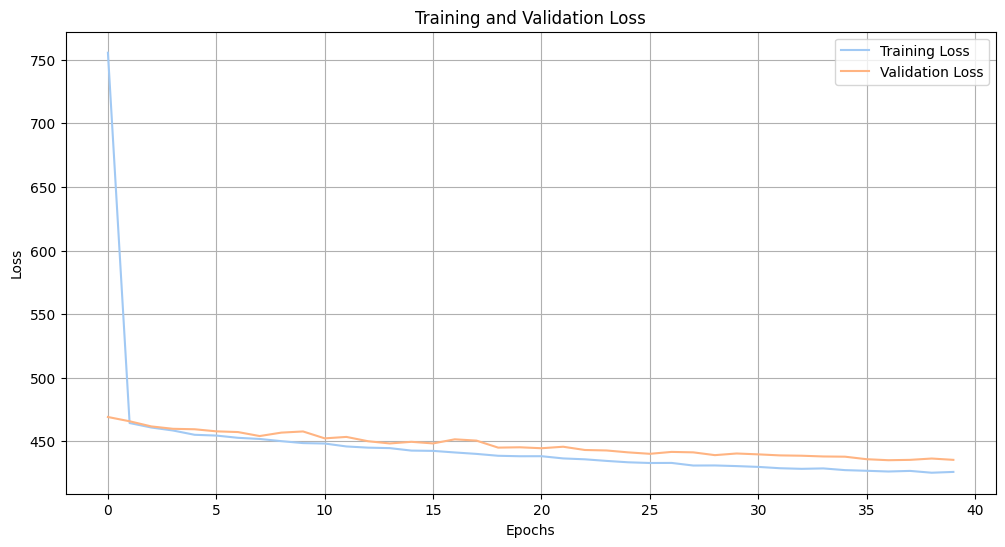

In [496]:
X_mini = df[['dance_energy_optimality_score', 'danceability', 'acousticness_category', 'dance_energy_product', 'mood_score_category', 'is_optimal_danceability_energy', 'loudness', 'artists', 'tempo_energy_category', 'duration_category']].copy()
mini_model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=(X_mini.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(128, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)
])

mini_model.compile(optimizer='adam', loss='mean_squared_error')
test_new_network(mini_model, X_mini, y, epochs=40, batch=64)

# Вывод по работе
1. Я проделал хорошую аналитику по каждой колонке в исходном датасете. Смотрел на распределения, разбивал на категории и строил графики. Были замечены зависимости между колонками и таргетом и между самими признаками, это становилось основой для feature engineering. Лучшими фичами оказались: dance_energy_optimality_score, danceability, acousticness_category, dance energy product, dance_energy_balance. В общем очень много параметров на вершине по permutation importance тех, которые так или наче связаны с танцевальностью, энергией в песне. Это пожалуй самый значимый параметр тут
2. Однако данные недостаточно репрезентативны, ничего не может хорошо описать выходной параметр популярности трека. Это может быть связано с тем, что на популярность самого трека влияют иные параметры, не отраженные в датасете. Тут в основном указаны параметры самой песни, но в конце концов именно на популярность они мало влияют. Скорее важна популярность самого исполнителя, маркетинг, реклама, тренды в соц сетях, попадание в плейлисты и подборки на стриминговых сервисах
3. На основе имеющихся данных я разрабатывал как в процессе анализа, так и после него, новые фичи, стремился к тому, чтобы они лучше представляли таргет, но, увы, особо это сделать не получилось. Были неплохие признаки, но отличия в метриках моделей настолько мелкие, насколько это возможно. Хотя признаков сделал я много
4. Затем я довольно долго подбирал необходимые признаки к модели, параллельно тестируя модель на каждом наборе. Но и тут результаты не радовали, чем дальше, тем результаты все меньше отличались, а иногда и ухудшались. В итоге выбрал относительно нормальный подбор параметров, который был не так плох по permutation importance и не показывал высокой корреляции с другими фичами. На нем удалось получить самые лучшие метрики
5. Затем был долгий этап сравнения и тестирования моделей. Хотел серьезно разобраться. Протестировал много вариантов нейронных сетей, из них выбрал лучшую с дропаутами на 0.2, batch_normalization, измененным размером батча и стандартными оптимизаторами, функцией активации. В этой модели удалось избежать переобучения, что видно в дальнейшем на кросс-валидации и относительно понятно по графикам обучения
6. Совершил большую ошибку при подборе параметров для обучения, из-за чего все метрики завышены, но общая картина остается прежней. В конце ошибку поправил и протестировал модель без параметров, построенных на таргете
7. Изучил по несколько моделей из каждого семейства деревьев(DecisionTree, RandomForest), попробовал линейные модели(LinearRegression и модификации с регуляризацией - Lasso, ElasticNet, Ridge, а также градиентный бустинг - XGBoost, LGBM. В моделях подбирал лучшие параметры с помощью GridSearchCV/RandomizedSearchCV
8. Во время тестирования сравнивал показатели текущих моделей с уже протестированными. Также сразу проверял на промежуточной кросс-валидации на 3 фолдах
9. После отобрал лучшие модели в каждом семействе и обучил их вновь, построил графики для MAE, RMSE, R2. Тут победил XGBoost,показав большой отрыв от других моделей, но это могло говорить о переобучении
10. Для кросс-валидации так же наглядно отразил результаты моделей, но уже не брал линейные. Лучшей и самой стабильной оказалась все же нейронная сеть, результатом конкретно тут я доволен